# Import Data

In [ ]:
# import
import pandas as pd
from google.colab import drive

In [ ]:
# google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/BAThesis/"

In [ ]:
# data
df = pd.read_csv(path + "call_bsm_dataset_24_04_24.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430346 entries, 0 to 430345
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              430346 non-null  object 
 1   strike_price      430346 non-null  float64
 2   best_bid          430346 non-null  float64
 3   best_offer        430346 non-null  float64
 4   impl_volatility   430346 non-null  float64
 5   delta             430346 non-null  float64
 6   gamma             430346 non-null  float64
 7   vega              430346 non-null  float64
 8   theta             430346 non-null  float64
 9   issuer            430346 non-null  object 
 10  price             430346 non-null  float64
 11  maturity          430346 non-null  float64
 12  vix               430346 non-null  float64
 13  t30ret            430346 non-null  float64
 14  spindx            430346 non-null  float64
 15  sprtrn            430346 non-null  float64
 16  moneyness         43

In [ ]:
import numpy as np

#add log price of BSM prediction
df['log_BSM_Vola_ATM'] = np.log(df['BSM_Vola_ATM'])

In [ ]:
# drop
df = df.drop(columns=['Vola_ALL', 'BSM_Vola_ALL','issuer','Vola_ALL'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430346 entries, 0 to 430345
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              430346 non-null  object 
 1   strike_price      430346 non-null  float64
 2   best_bid          430346 non-null  float64
 3   best_offer        430346 non-null  float64
 4   impl_volatility   430346 non-null  float64
 5   delta             430346 non-null  float64
 6   gamma             430346 non-null  float64
 7   vega              430346 non-null  float64
 8   theta             430346 non-null  float64
 9   price             430346 non-null  float64
 10  maturity          430346 non-null  float64
 11  vix               430346 non-null  float64
 12  t30ret            430346 non-null  float64
 13  spindx            430346 non-null  float64
 14  sprtrn            430346 non-null  float64
 15  moneyness         430346 non-null  float64
 16  Vola_ATM          43

In [ ]:
# filter by date
df_model = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2022-12-31')]
df_model_test_feb_mar =  df[(df['date'] >= '2020-02-01') & (df['date'] <= '2020-03-31')]
df_model_test_apr_mai =  df[(df['date'] >= '2020-04-01') & (df['date'] <= '2020-05-31')]
df_model_test_jun_jul =  df[(df['date'] >= '2020-06-01') & (df['date'] <= '2020-07-31')]
df_model_test_aug_sep = df[(df['date'] >= '2020-08-01') & (df['date'] <= '2020-09-30')]
df_model_test_oct_nov = df[(df['date'] >= '2020-10-01') & (df['date'] <= '2020-11-30')]
df_model_test_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

In [ ]:
# february-march
df_model_test_feb_mar_otm = df_model_test_feb_mar[(df_model_test_feb_mar['moneyness'] >= 0.94) & (df_model_test_feb_mar['moneyness'] < 0.97)]
df_model_test_feb_mar_dotm = df_model_test_feb_mar[(df_model_test_feb_mar['moneyness'] < 0.94)]
df_model_test_feb_mar_atm = df_model_test_feb_mar[df_model_test_feb_mar['moneyness'] >= 0.97]

# april-may
df_model_test_apr_mai_otm = df_model_test_apr_mai[(df_model_test_apr_mai['moneyness'] >= 0.94) & (df_model_test_apr_mai['moneyness'] < 0.97)]
df_model_test_apr_mai_dotm = df_model_test_apr_mai[(df_model_test_apr_mai['moneyness'] < 0.94)]
df_model_test_apr_mai_atm = df_model_test_apr_mai[df_model_test_apr_mai['moneyness'] >= 0.97]

# june-july
df_model_test_jun_jul_otm = df_model_test_jun_jul[(df_model_test_jun_jul['moneyness'] >= 0.94) & (df_model_test_jun_jul['moneyness'] < 0.97)]
df_model_test_jun_jul_dotm = df_model_test_jun_jul[(df_model_test_jun_jul['moneyness'] < 0.94)]
df_model_test_jun_jul_atm = df_model_test_jun_jul[df_model_test_jun_jul['moneyness'] >= 0.97]

# august-september
df_model_test_aug_sep_otm = df_model_test_aug_sep[(df_model_test_aug_sep['moneyness'] >= 0.94) & (df_model_test_aug_sep['moneyness'] < 0.97)]
df_model_test_aug_sep_dotm = df_model_test_aug_sep[(df_model_test_aug_sep['moneyness'] < 0.94)]
df_model_test_aug_sep_atm = df_model_test_aug_sep[df_model_test_aug_sep['moneyness'] >= 0.97]

# october-november
df_model_test_oct_nov_otm = df_model_test_oct_nov[(df_model_test_oct_nov['moneyness'] >= 0.94) & (df_model_test_oct_nov['moneyness'] < 0.97)]
df_model_test_oct_nov_dotm = df_model_test_oct_nov[(df_model_test_oct_nov['moneyness'] < 0.94)]
df_model_test_oct_nov_atm = df_model_test_oct_nov[df_model_test_oct_nov['moneyness'] >= 0.97]

# whole 2020
df_model_test_2020_otm = df_model_test_2020[(df_model_test_2020['moneyness'] >= 0.94) & (df_model_test_2020['moneyness'] < 0.97)]
df_model_test_2020_dotm = df_model_test_2020[(df_model_test_2020['moneyness'] < 0.94)]
df_model_test_2020_atm = df_model_test_2020[df_model_test_2020['moneyness'] >= 0.97]

#Definitons

## Train, Test Loop

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import pandas as pd
import numpy as np
import copy


def training_function(model_constructor, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes):
    """
    train and validate with specified hyperparameters

    Parameters:
    - model_constructor: neural network
    - train_dataset: dataset for training
    - val_dataset: dataset for validation
    - device: cuda or cpu
    - learning_rates: chosen learning rates to test
    - num_epochs: number of epochs to train
    - batch_sizes: chosen batch sizes to test

    Returns:
    - df with training and validation losses and RMSE for each hyperparameter combination
    """
    results = []
    best_val_rmse = float('inf')
    best_model = None

    for lr in learning_rates:
        for batch_size in batch_sizes:
            # dataloader
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            # reset model and put to device
            model = model_constructor()
            model.to(device)

            # define optimizer and criterion
            optimizer = optim.Adam(model.parameters(), lr=lr)
            criterion = nn.MSELoss()

            for epoch in tqdm(range(num_epochs), desc=f"LR={lr}, Batch={batch_size}"):
                # training
                model.train()
                train_loss = 0
                for inputs, targets in train_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs.squeeze(1), targets.squeeze(1))
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()

                avg_train_loss = train_loss / len(train_loader)

                # validation
                model.eval()
                val_loss = 0
                predictions, true_values = [], []
                with torch.no_grad():
                    for inputs, targets in val_loader:
                        inputs, targets = inputs.to(device), targets.to(device)
                        outputs = model(inputs)
                        loss = criterion(outputs.squeeze(1), targets.squeeze(1))
                        val_loss += loss.item()
                        predictions.extend(outputs.squeeze(1).cpu().numpy())
                        true_values.extend(targets.cpu().numpy())

                avg_val_loss = val_loss / len(val_loader)
                rmse = np.sqrt(mean_squared_error(true_values, predictions))

                # save best rmse
                if rmse < best_val_rmse:
                    best_val_rmse = rmse
                    best_model = copy.deepcopy(model)

                # append to list
                results.append({
                    ('Hyperparameters', 'Learning Rate'): lr,
                    ('Hyperparameters', 'Batch Size'): batch_size,
                    ('Metrics', 'Epoch'): epoch + 1,
                    ('Metrics', 'Training Loss'): avg_train_loss,
                    ('Metrics', 'Validation Loss'): avg_val_loss,
                    ('Metrics', 'RMSE'): rmse
                })

    return pd.DataFrame(results), model, best_model

In [ ]:
def evaluate_model_on_test_set(model, test_dataset, batch, device):
    """
    evaluate model on test data

    Parameters:
    - model: trained model
    - test_dataset: dataset for testing
    - device: cuda or cpu

    Returns:
    - tuple of (actual_prices, predicted_prices)
    """
    # evaluation mode
    model.eval()
    # dataloader and put to device
    test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False)
    model.to(device)


    actual_prices = []
    predicted_prices = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            actual_prices.extend(targets.cpu().numpy())
            predicted_prices.extend(outputs.squeeze(1).cpu().numpy())

    # reshape
    actual_prices_reshaped = np.array(actual_prices).reshape(-1, 1)
    predicted_prices_reshaped = np.array(predicted_prices).reshape(-1, 1)

    # transform predictions and actuals to original scale
    true_price_predictions = scaler_target.inverse_transform(predicted_prices_reshaped).flatten()
    true_actual_prices = scaler_target.inverse_transform(actual_prices_reshaped).flatten()

    # transform back from log
    true_price_predictions = np.exp(true_price_predictions)
    true_actual_prices = np.exp(true_actual_prices)

    return true_actual_prices, true_price_predictions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model_and_display_results(model, datasets, batch_size, device):
    """
    evaluate model on multiple datasets and display result

    Parameters:
    - model: trained model
    - datasets: dictionary containing datasets for evaluation
    - batch_size: chosen batch size for model
    - device: cuda, cpu

    Returns:
    - tuple containing df with results of actual and predicted prices + dictionary with metrics results for each period
    """

    all_results = []
    metrics_results = {}

    # evaluate  model dataset
    for period, dataset in datasets.items():
        actual_prices, predicted_prices = evaluate_model_on_test_set(model=model, test_dataset=dataset, batch=batch_size, device=device)

        # calculate  metrics and append to dict
        mse = mean_squared_error(actual_prices, predicted_prices)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual_prices, predicted_prices)
        r2 = r2_score(actual_prices, predicted_prices)
        metrics_results[period] = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

        # actual, predicted prices for each dataset
        for actual, predicted in zip(actual_prices, predicted_prices):
            all_results.append({'period': period, 'actual_prices': actual, 'predicted_prices': predicted})

    # create df with results of actual and predicted prices
    results_df = pd.DataFrame(all_results)

    # display metrics results
    for period, metrics in metrics_results.items():
        print(f"results for {period}:\n mse = {metrics['mse']:.2f}, rmse = {metrics['rmse']:.2f}, mae = {metrics['mae']:.2f}, r2 = {metrics['r2']:.2f}\n")

    return results_df, metrics_results


##Plots

In [ ]:
plot_text_size = 14

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_train_val_loss(df, zoom=None):
    """
    Plots training and validation loss for each combination of learning rate and batch size found in the DataFrame.
    Optionally zooms into a specific y-axis range for all plots.

    Parameters:
    - df: DataFrame containing the training data, expected to have multi-level columns.
    - zoom: Optional tuple specifying the (min, max) y-axis limits for zooming into specific loss values.
    """
    # get learning rate and batch size
    learning_rates = df[('Hyperparameters', 'Learning Rate')].unique()
    batch_sizes = df[('Hyperparameters', 'Batch Size')].unique()

    # subplots number
    num_plots = len(learning_rates) * len(batch_sizes)
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, 4 * num_plots), squeeze=False)
    plt.style.use('seaborn-v0_8-whitegrid')

    # flatten axis
    axs = axs.flatten()

    # plot counter
    plot_idx = 0

    for lr in learning_rates:
        for bs in batch_sizes:
            # filter for current learning rate and batch size
            filtered_df = df[(df[('Hyperparameters', 'Learning Rate')] == lr) &
                             (df[('Hyperparameters', 'Batch Size')] == bs)]

            # get epoch training and validation loss
            epochs = filtered_df[('Metrics', 'Epoch')]
            training_loss = filtered_df[('Metrics', 'Training Loss')]
            validation_loss = filtered_df[('Metrics', 'Validation Loss')]

            # plot loss
            axs[plot_idx].plot(epochs, training_loss, label="Training Loss", marker='o', linestyle='-', color='black')
            axs[plot_idx].plot(epochs, validation_loss, label="Validation Loss", marker='x', linestyle='--', color='black')

            # set title and label
            axs[plot_idx].set_title(f"Learning Rate: {lr}, Batch Size: {bs}", fontsize=plot_text_size)
            axs[plot_idx].set_xlabel("Epoch", fontsize=plot_text_size)
            axs[plot_idx].set_ylabel("Loss", fontsize=plot_text_size)

            # zooom
            if zoom is not None:
                axs[plot_idx].set_ylim(zoom[0], zoom[1])

            axs[plot_idx].legend(frameon=True, fontsize=plot_text_size)
            axs[plot_idx].grid(True, which='both', linestyle='dotted', linewidth='0.5')

            # plot counter +1
            plot_idx += 1

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_actual_vs_predicted(df, x_range=None, y_range=None):
    """
    Plots actual vs. predicted prices from a DataFrame with optional zooming.

    Parameters:
    - df: DataFrame containing 'Actual Prices' and 'Predicted Prices'.
    - x_range: Tuple (min, max), the range of values to display on the x-axis.
    - y_range: Tuple (min, max), the range of values to display on the y-axis.
    """
    # scatter
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Actual Prices'], df['Predicted Prices'], alpha=0.5, color='grey', label='Predicted Prices')

    # set title label grid
    plt.title('Actual vs. Predicted Prices', fontsize=plot_text_size)
    plt.xlabel('Actual Prices', fontsize=plot_text_size)
    plt.ylabel('Predicted Prices', fontsize=plot_text_size)
    plt.grid(linestyle='dotted')

    if x_range is not None:
        plt.xlim(x_range)
    if y_range is not None:
        plt.ylim(y_range)

    min_line = max(x_range[0], y_range[0]) if x_range and y_range else 0
    max_line = min(x_range[1], y_range[1]) if x_range and y_range else max(df['Actual Prices'].max(), df['Predicted Prices'].max())
    plt.plot([min_line, max_line], [min_line, max_line], '--', color='black', label='Perfect Prediction')

    plt.legend(frameon=True, fontsize=plot_text_size)
    plt.show()

# Model 1

## Prepare Data

In [ ]:
# features and targets
feature_columns_model1 = ['moneyness','log_strike_price','impl_volatility','maturity','t30ret','sprtrn','log_spindx']
target_column = 'log_price'

In [ ]:
# create df with chosen features/targets
bsm_features = df_model[feature_columns_model1]
bsm_targets = df_model[target_column]

In [ ]:
from sklearn.model_selection import train_test_split

# train val test split
X_train, X_test, y_train, y_test= train_test_split(bsm_features, bsm_targets, test_size=0.3, random_state= 42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state= 42, shuffle=True)

# print length
print('Train: {}, Test: {}, Val: {}'.format(len(X_train), len(X_test), len(X_val)))

Train: 208012, Test: 44574, Val: 44574


In [ ]:
# check number of otm dotm atm
X_train_otm = X_train[(X_train['moneyness'] >= 0.94) & (X_train['moneyness'] < 0.97)]
X_train_dotm = X_train[(X_train['moneyness'] < 0.94)]
X_train_atm = X_train[X_train['moneyness'] >= 0.97]

print('Number of options in train set ATM: {}, OTM: {}, DOTM: {}'.format(len(X_train_atm), len(X_train_otm), len(X_train_dotm)))

Number of options in train set ATM: 117421, OTM: 62911, DOTM: 27680


In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler
scaler_input = RobustScaler()

# fit scaler to training data
scaler_input.fit(X_train)

# transform training data
X_train_scaled = scaler_input.transform(X_train)

# transform validation data with fitted scaler
X_val_scaled = scaler_input.transform(X_val)

# transform test data with fitted scaler
X_test_scaled = scaler_input.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler
scaler_target = RobustScaler()

# fit scaler to target training data
scaler_target.fit(y_train.values.reshape(-1, 1))

# transform target training data
y_train_scaled = scaler_target.transform(y_train.values.reshape(-1, 1))

# transform target validation data with fitted scaler
y_val_scaled = scaler_target.transform(y_val.values.reshape(-1, 1))

# transform target test data with fitted scaler
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))

In [ ]:
# features for robustness test
feature_columns_model1_robust = ['moneyness','log_strike_price','impl_volatility','maturity','t30ret','sprtrn','log_spindx']

---------------------------------------------------------
Change the implied volatility to the ATM volatility for robustness test

In [ ]:
# drop original impl_vola
df_model_test_feb_mar.drop(columns=['impl_volatility'], inplace=True)
df_model_test_apr_mai.drop(columns=['impl_volatility'], inplace=True)
df_model_test_jun_jul.drop(columns=['impl_volatility'], inplace=True)
df_model_test_aug_sep.drop(columns=['impl_volatility'], inplace=True)
df_model_test_oct_nov.drop(columns=['impl_volatility'], inplace=True)
df_model_test_2020.drop(columns=['impl_volatility'], inplace=True)

In [ ]:
# change name of atm_vola to impl_vola to use it as an input feature in robustness test
df_model_test_feb_mar['impl_volatility'] = df_model_test_feb_mar['Vola_ATM']
df_model_test_apr_mai['impl_volatility'] = df_model_test_apr_mai['Vola_ATM']
df_model_test_jun_jul['impl_volatility'] = df_model_test_jun_jul['Vola_ATM']
df_model_test_aug_sep['impl_volatility'] = df_model_test_aug_sep['Vola_ATM']
df_model_test_oct_nov['impl_volatility'] = df_model_test_oct_nov['Vola_ATM']
df_model_test_2020['impl_volatility'] = df_model_test_2020['Vola_ATM']

In [ ]:
df_model_test_feb_mar

date  strike_price  best_bid  best_offer     delta     gamma  \
5197   2020-02-03        3250.0     42.40       42.90  0.501179  0.003667   
5198   2020-02-03        3255.0     39.40       39.90  0.482445  0.003716   
5199   2020-02-03        3260.0     36.50       37.00  0.463247  0.003756   
5200   2020-02-03        3265.0     33.60       34.10  0.443450  0.003798   
5201   2020-02-03        3270.0     30.90       31.40  0.423362  0.003821   
...           ...           ...       ...         ...       ...       ...   
38325  2020-03-31        3145.0      1.10        1.40  0.015684  0.000171   
38326  2020-03-31        3150.0      1.05        1.35  0.015104  0.000165   
38327  2020-03-31        3160.0      1.00        1.30  0.014439  0.000158   
38328  2020-03-31        3170.0      0.90        1.40  0.014272  0.000154   
38329  2020-03-31        3175.0      0.90        1.20  0.013215  0.000145   

            vega      theta  price  maturity  ...    sprtrn  moneyness  \
5197   279.48050 -461.21440  42.65  0.049315  ...  0.007255   0.999668   
5198   279.22470 -454.45000  39.65  0.049315  ...  0.007255   0.998132   
5199   278.32140 -446.70520  36.75  0.049315  ...  0.007255   0.996601   
5200   276.70790 -436.81570  33.85  0.049315  ...  0.007255   0.995075   
5201   274.35880 -426.89500  31.15  0.049315  ...  0.007255   0.993554   
...          ...        ...    ...       ...  ...       ...        ...   
38325   29.15691  -55.39972   1.25  0.082192  ... -0.016013   0.821809   
38326   28.22775  -53.69997   1.20  0.082192  ... -0.016013   0.820505   
38327   27.15594  -52.06038   1.15  0.082192  ... -0.016013   0.817908   
38328   26.88526  -52.22845   1.15  0.082192  ... -0.016013   0.815328   
38329   25.15818  -48.60132   1.05  0.082192  ... -0.016013   0.814044   

       Vola_ATM  BSM_Vola_ATM        BSM  log_price  log_strike_price  \
5197   0.166031     47.347485  44.182072   3.753027          8.086410   
5198   0.166031     44.940826  41.152212   3.680091          8.087948   
5199   0.166031     42.617063  38.219918   3.604138          8.089482   
5200   0.166031     40.375768  35.281623   3.521939          8.091015   
5201   0.166031     38.216369  32.543027   3.438814          8.092545   
...         ...           ...        ...        ...               ...   
38325  0.484567     14.121806   1.227708   0.223144          8.053569   
38326  0.484567     13.779352   1.178555   0.182322          8.055158   
38327  0.484567     13.116743   1.129495   0.139762          8.058327   
38328  0.484567     12.482951   1.129737   0.139762          8.061487   
38329  0.484567     12.176525   1.031241   0.048790          8.063063   

       log_spindx  log_BSM_Vola_ATM  impl_volatility  
5197     8.086078          3.857514         0.166031  
5198     8.086078          3.805347         0.166031  
5199     8.086078          3.752255         0.166031  
5200     8.086078          3.698230         0.166031  
5201     8.086078          3.643264         0.166031  
...           ...               ...              ...  
38325    7.857322          2.647720         0.484567  
38326    7.857322          2.623171         0.484567  
38327    7.857322          2.573890         0.484567  
38328    7.857322          2.524364         0.484567  
38329    7.857322          2.499510         0.484567  

[33133 rows x 23 columns]

In [ ]:
# features
feature_columns_model1_robust = ['moneyness','log_strike_price','impl_volatility','maturity','t30ret','sprtrn','log_spindx']

---------------------------------------------------------

In [ ]:
# transform robustness test dataframes using the same scaler fitted on the training data
df_model_test_feb_mar_scaled = scaler_input.transform(df_model_test_feb_mar[feature_columns_model1_robust])
df_model_test_apr_mai_scaled = scaler_input.transform(df_model_test_apr_mai[feature_columns_model1_robust])
df_model_test_jun_jul_scaled = scaler_input.transform(df_model_test_jun_jul[feature_columns_model1_robust])
df_model_test_aug_sep_scaled = scaler_input.transform(df_model_test_aug_sep[feature_columns_model1_robust])
df_model_test_oct_nov_scaled = scaler_input.transform(df_model_test_oct_nov[feature_columns_model1_robust])
df_model_test_2020_scaled = scaler_input.transform(df_model_test_2020[feature_columns_model1_robust])

# transform target of robustness test data
df_model_test_feb_mar_target_scaled = scaler_target.transform(df_model_test_feb_mar[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_target_scaled = scaler_target.transform(df_model_test_apr_mai[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_target_scaled = scaler_target.transform(df_model_test_jun_jul[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_target_scaled = scaler_target.transform(df_model_test_aug_sep[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_target_scaled = scaler_target.transform(df_model_test_oct_nov[target_column].values.reshape(-1, 1))
df_model_test_2020_target_scaled = scaler_target.transform(df_model_test_2020[target_column].values.reshape(-1, 1))

In [ ]:
# transform robustness test df with same scaler as with training data
df_model_test_feb_mar_scaled = scaler_input.transform(df_model_test_feb_mar[feature_columns_model1_robust])
df_model_test_apr_mai_scaled = scaler_input.transform(df_model_test_apr_mai[feature_columns_model1_robust])
df_model_test_jun_jul_scaled = scaler_input.transform(df_model_test_jun_jul[feature_columns_model1_robust])
df_model_test_aug_sep_scaled = scaler_input.transform(df_model_test_aug_sep[feature_columns_model1_robust])
df_model_test_oct_nov_scaled = scaler_input.transform(df_model_test_oct_nov[feature_columns_model1_robust])
df_model_test_2020_scaled = scaler_input.transform(df_model_test_2020[feature_columns_model1_robust])

# transform robustness test target data
df_model_test_feb_mar_target_scaled = scaler_target.transform(df_model_test_feb_mar[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_target_scaled = scaler_target.transform(df_model_test_apr_mai[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_target_scaled = scaler_target.transform(df_model_test_jun_jul[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_target_scaled = scaler_target.transform(df_model_test_aug_sep[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_target_scaled = scaler_target.transform(df_model_test_oct_nov[target_column].values.reshape(-1, 1))
df_model_test_2020_target_scaled = scaler_target.transform(df_model_test_2020[target_column].values.reshape(-1, 1))

# transform features for each moneyness category
df_model_test_feb_mar_otm_scaled = scaler_input.transform(df_model_test_feb_mar_otm[feature_columns_model1_robust])
df_model_test_feb_mar_dotm_scaled = scaler_input.transform(df_model_test_feb_mar_dotm[feature_columns_model1_robust])
df_model_test_feb_mar_atm_scaled = scaler_input.transform(df_model_test_feb_mar_atm[feature_columns_model1_robust])

df_model_test_apr_mai_otm_scaled = scaler_input.transform(df_model_test_apr_mai_otm[feature_columns_model1_robust])
df_model_test_apr_mai_dotm_scaled = scaler_input.transform(df_model_test_apr_mai_dotm[feature_columns_model1_robust])
df_model_test_apr_mai_atm_scaled = scaler_input.transform(df_model_test_apr_mai_atm[feature_columns_model1_robust])

df_model_test_jun_jul_otm_scaled = scaler_input.transform(df_model_test_jun_jul_otm[feature_columns_model1_robust])
df_model_test_jun_jul_dotm_scaled = scaler_input.transform(df_model_test_jun_jul_dotm[feature_columns_model1_robust])
df_model_test_jun_jul_atm_scaled = scaler_input.transform(df_model_test_jun_jul_atm[feature_columns_model1_robust])

df_model_test_aug_sep_otm_scaled = scaler_input.transform(df_model_test_aug_sep_otm[feature_columns_model1_robust])
df_model_test_aug_sep_dotm_scaled = scaler_input.transform(df_model_test_aug_sep_dotm[feature_columns_model1_robust])
df_model_test_aug_sep_atm_scaled = scaler_input.transform(df_model_test_aug_sep_atm[feature_columns_model1_robust])

df_model_test_oct_nov_otm_scaled = scaler_input.transform(df_model_test_oct_nov_otm[feature_columns_model1_robust])
df_model_test_oct_nov_dotm_scaled = scaler_input.transform(df_model_test_oct_nov_dotm[feature_columns_model1_robust])
df_model_test_oct_nov_atm_scaled = scaler_input.transform(df_model_test_oct_nov_atm[feature_columns_model1_robust])

df_model_test_2020_otm_scaled = scaler_input.transform(df_model_test_2020_otm[feature_columns_model1_robust])
df_model_test_2020_dotm_scaled = scaler_input.transform(df_model_test_2020_dotm[feature_columns_model1_robust])
df_model_test_2020_atm_scaled = scaler_input.transform(df_model_test_2020_atm[feature_columns_model1_robust])

# transform targets for each moneyness category
df_model_test_feb_mar_otm_target_scaled = scaler_target.transform(df_model_test_feb_mar_otm[target_column].values.reshape(-1, 1))
df_model_test_feb_mar_dotm_target_scaled = scaler_target.transform(df_model_test_feb_mar_dotm[target_column].values.reshape(-1, 1))
df_model_test_feb_mar_atm_target_scaled = scaler_target.transform(df_model_test_feb_mar_atm[target_column].values.reshape(-1, 1))

df_model_test_apr_mai_otm_target_scaled = scaler_target.transform(df_model_test_apr_mai_otm[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_dotm_target_scaled = scaler_target.transform(df_model_test_apr_mai_dotm[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_atm_target_scaled = scaler_target.transform(df_model_test_apr_mai_atm[target_column].values.reshape(-1, 1))

df_model_test_jun_jul_otm_target_scaled = scaler_target.transform(df_model_test_jun_jul_otm[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_dotm_target_scaled = scaler_target.transform(df_model_test_jun_jul_dotm[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_atm_target_scaled = scaler_target.transform(df_model_test_jun_jul_atm[target_column].values.reshape(-1, 1))

df_model_test_aug_sep_otm_target_scaled = scaler_target.transform(df_model_test_aug_sep_otm[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_dotm_target_scaled = scaler_target.transform(df_model_test_aug_sep_dotm[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_atm_target_scaled = scaler_target.transform(df_model_test_aug_sep_atm[target_column].values.reshape(-1, 1))

df_model_test_oct_nov_otm_target_scaled = scaler_target.transform(df_model_test_oct_nov_otm[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_dotm_target_scaled = scaler_target.transform(df_model_test_oct_nov_dotm[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_atm_target_scaled = scaler_target.transform(df_model_test_oct_nov_atm[target_column].values.reshape(-1, 1))

df_model_test_2020_otm_target_scaled = scaler_target.transform(df_model_test_2020_otm[target_column].values.reshape(-1, 1))
df_model_test_2020_dotm_target_scaled = scaler_target.transform(df_model_test_2020_dotm[target_column].values.reshape(-1, 1))
df_model_test_2020_atm_target_scaled = scaler_target.transform(df_model_test_2020_atm[target_column].values.reshape(-1, 1))

## Architecture: 12 Layers

In [ ]:
import torch.nn as nn

class PerformanceMLP_1(nn.Module):
    def __init__(self):
        super(PerformanceMLP_1, self).__init__()

        # fully connected layers
        self.fc1 = nn.Linear(7, 10)
        self.fc2 = nn.Linear(10, 15)
        self.fc3 = nn.Linear(15, 20)
        self.fc4 = nn.Linear(20, 25)
        self.fc5 = nn.Linear(25, 30)
        self.fc6 = nn.Linear(30, 25)
        self.fc7 = nn.Linear(25, 20)
        self.fc8 = nn.Linear(20, 15)
        self.fc9 = nn.Linear(15, 10)
        self.fc10 = nn.Linear(10, 7)
        self.fc11 = nn.Linear(7, 4)
        self.fc12 = nn.Linear(4, 2)

        self.fc13 = nn.Linear(2, 1)

        # activation function
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        # flatten input
        x = x.view(x.size(0), -1)

        # fully connected layers with ReLU
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.relu(self.fc10(x))
        x = self.relu(self.fc11(x))

        x = self.relu(self.fc12(x))

        x = self.fc13(x)

        return x

In [ ]:
# print architecture
print("MLP architecture:\n\n{}\n".format(PerformanceMLP_1()))

MLP architecture:

PerformanceMLP_1(
  (fc1): Linear(in_features=7, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=30, bias=True)
  (fc6): Linear(in_features=30, out_features=25, bias=True)
  (fc7): Linear(in_features=25, out_features=20, bias=True)
  (fc8): Linear(in_features=20, out_features=15, bias=True)
  (fc9): Linear(in_features=15, out_features=10, bias=True)
  (fc10): Linear(in_features=10, out_features=7, bias=True)
  (fc11): Linear(in_features=7, out_features=4, bias=True)
  (fc12): Linear(in_features=4, out_features=2, bias=True)
  (fc13): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
)



## Tensor Datasets

In [ ]:
X_train

moneyness  log_strike_price  impl_volatility  maturity    t30ret  \
164119   0.948963          8.377931         0.126179  0.049315  0.000027   
238236   0.989938          8.483636         0.111934  0.008219  0.000044   
174625   0.934320          8.390496         0.128183  0.082192  0.000014   
145264   0.961075          8.312626         0.121852  0.049315  0.000046   
316729   0.997762          8.324821         0.215537  0.060274  0.000307   
...           ...               ...              ...       ...       ...   
253065   0.982709          8.432724         0.207458  0.010959  0.000044   
392364   0.963411          8.244071         0.253737  0.021918  0.001929   
265118   0.939904          8.447843         0.166634  0.038356  0.000044   
280053   0.987167          8.441391         0.137254  0.046575  0.000028   
255144   0.994987          8.411833         0.230183  0.016438  0.000044   

          sprtrn  log_spindx  
164119 -0.000196    8.325546  
238236 -0.001010    8.473523  
174625 -0.002943    8.322559  
145264  0.001662    8.272923  
316729 -0.010794    8.322581  
...          ...         ...  
253065  0.018886    8.415282  
392364 -0.007951    8.206796  
265118  0.022373    8.385865  
280053  0.007145    8.428476  
255144 -0.024391    8.406807  

[208012 rows x 7 columns]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def create_tensor_datasets(features_scaled, targets_scaled):
    """
    creates tensor datasets

    parameters:
    - features_scaled: scaled features
    - targets_scaled: scaled targets

    returns:
    - tensor dataset with features and targets tensors.
    """
    features_tensor = torch.tensor(features_scaled, dtype=torch.float)
    targets_tensor = torch.tensor(targets_scaled, dtype=torch.float)
    return TensorDataset(features_tensor, targets_tensor)

In [ ]:
# training, validation, and testing data into tensor datasets
train_dataset = create_tensor_datasets(X_train_scaled, y_train_scaled)
val_dataset = create_tensor_datasets(X_val_scaled, y_val_scaled)
test_dataset = create_tensor_datasets(X_test_scaled, y_test_scaled)

In [ ]:
# robustness test data into tensor datasets
feb_mar_dataset = create_tensor_datasets(df_model_test_feb_mar_scaled, df_model_test_feb_mar_target_scaled)
apr_mai_dataset = create_tensor_datasets(df_model_test_apr_mai_scaled, df_model_test_apr_mai_target_scaled)
jun_jul_dataset = create_tensor_datasets(df_model_test_jun_jul_scaled, df_model_test_jun_jul_target_scaled)
aug_sep_dataset = create_tensor_datasets(df_model_test_aug_sep_scaled, df_model_test_aug_sep_target_scaled)
oct_nov_dataset = create_tensor_datasets(df_model_test_oct_nov_scaled, df_model_test_oct_nov_target_scaled)
test_2020_dataset = create_tensor_datasets(df_model_test_2020_scaled, df_model_test_2020_target_scaled)

In [ ]:
 # robustness test data into tensor datasets
feb_mar_otm_dataset = create_tensor_datasets(df_model_test_feb_mar_otm_scaled, df_model_test_feb_mar_otm_target_scaled)
feb_mar_dotm_dataset = create_tensor_datasets(df_model_test_feb_mar_dotm_scaled, df_model_test_feb_mar_dotm_target_scaled)
feb_mar_atm_dataset = create_tensor_datasets(df_model_test_feb_mar_atm_scaled, df_model_test_feb_mar_atm_target_scaled)

# robustness test data into tensor datasets
apr_mai_otm_dataset = create_tensor_datasets(df_model_test_apr_mai_otm_scaled, df_model_test_apr_mai_otm_target_scaled)
apr_mai_dotm_dataset = create_tensor_datasets(df_model_test_apr_mai_dotm_scaled, df_model_test_apr_mai_dotm_target_scaled)
apr_mai_atm_dataset = create_tensor_datasets(df_model_test_apr_mai_atm_scaled, df_model_test_apr_mai_atm_target_scaled)

# robustness test data into tensor datasets
jun_jul_otm_dataset = create_tensor_datasets(df_model_test_jun_jul_otm_scaled, df_model_test_jun_jul_otm_target_scaled)
jun_jul_dotm_dataset = create_tensor_datasets(df_model_test_jun_jul_dotm_scaled, df_model_test_jun_jul_dotm_target_scaled)
jun_jul_atm_dataset = create_tensor_datasets(df_model_test_jun_jul_atm_scaled, df_model_test_jun_jul_atm_target_scaled)

# robustness test data into tensor datasets
aug_sep_otm_dataset = create_tensor_datasets(df_model_test_aug_sep_otm_scaled, df_model_test_aug_sep_otm_target_scaled)
aug_sep_dotm_dataset = create_tensor_datasets(df_model_test_aug_sep_dotm_scaled, df_model_test_aug_sep_dotm_target_scaled)
aug_sep_atm_dataset = create_tensor_datasets(df_model_test_aug_sep_atm_scaled, df_model_test_aug_sep_atm_target_scaled)

# robustness test data into tensor datasets
oct_nov_otm_dataset = create_tensor_datasets(df_model_test_oct_nov_otm_scaled, df_model_test_oct_nov_otm_target_scaled)
oct_nov_dotm_dataset = create_tensor_datasets(df_model_test_oct_nov_dotm_scaled, df_model_test_oct_nov_dotm_target_scaled)
oct_nov_atm_dataset = create_tensor_datasets(df_model_test_oct_nov_atm_scaled, df_model_test_oct_nov_atm_target_scaled)

# robustness test data into tensor datasets
test_2020_otm_dataset = create_tensor_datasets(df_model_test_2020_otm_scaled, df_model_test_2020_otm_target_scaled)
test_2020_dotm_dataset = create_tensor_datasets(df_model_test_2020_dotm_scaled, df_model_test_2020_dotm_target_scaled)
test_2020_atm_dataset = create_tensor_datasets(df_model_test_2020_atm_scaled, df_model_test_2020_atm_target_scaled)

## Train

In [ ]:
seed_value = 42

# CPU seed numpy, pytorch
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# GPU seed
torch.cuda.manual_seed(seed_value)

In [ ]:
# check gpu, cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# hyperparameters
learning_rates = [0.001, 0.005, 0.01, 0.05]
num_epochs = 20
batch_sizes = [32, 64, 128, 256]

# train model
df_MLP_performance_model1, last_trained_performance_model1, best_performance_model1 = training_function(PerformanceMLP_1, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes)

cpu


LR=0.05, Batch=256: 100%|██████████| 20/20 [01:27<00:00,  4.36s/it]


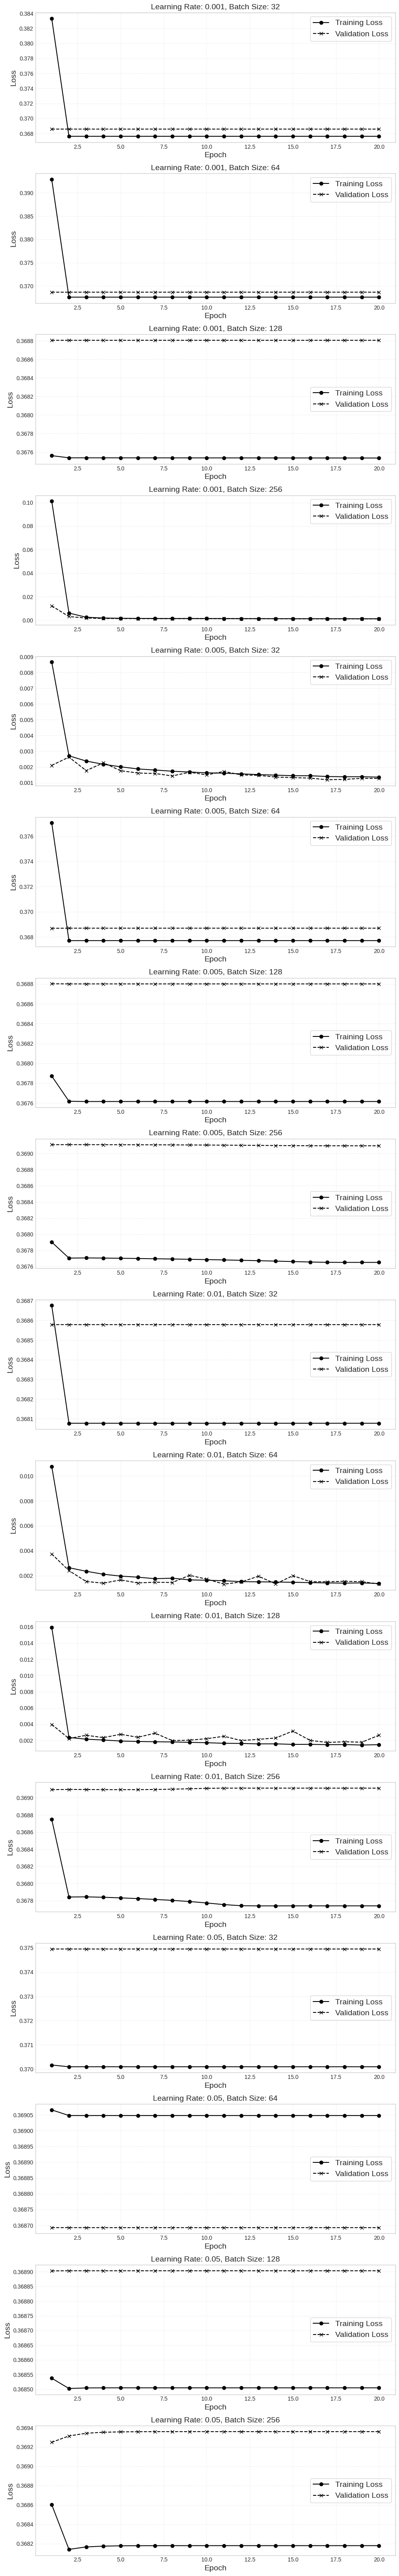

In [ ]:
plot_train_val_loss(df_MLP_performance_model1, zoom=None)

In [ ]:
sorted_df = df_MLP_performance_model1.sort_values(by=('Metrics', 'RMSE'))
sorted_df.head(30)

(Hyperparameters, Learning Rate)  (Hyperparameters, Batch Size)  \
79                              0.001                            256   
77                              0.001                            256   
78                              0.001                            256   
76                              0.001                            256   
75                              0.001                            256   
74                              0.001                            256   
73                              0.001                            256   
96                              0.005                             32   
97                              0.005                             32   
72                              0.001                            256   
71                              0.001                            256   
99                              0.005                             32   
98                              0.005                             32   
95                              0.005                             32   
66                              0.001                            256   
67                              0.001                            256   
65                              0.001                            256   
94                              0.005                             32   
190                             0.010                             64   
199                             0.010                             64   
69                              0.001                            256   
70                              0.001                            256   
193                             0.010                             64   
64                              0.001                            256   
93                              0.005                             32   
68                              0.001                            256   
183                             0.010                             64   
87                              0.005                             32   
185                             0.010                             64   
63                              0.001                            256   

     (Metrics, Epoch)  (Metrics, Training Loss)  (Metrics, Validation Loss)  \
79                 20                  0.001204                    0.001077   
77                 18                  0.001224                    0.001082   
78                 19                  0.001213                    0.001086   
76                 17                  0.001237                    0.001088   
75                 16                  0.001250                    0.001100   
74                 15                  0.001263                    0.001118   
73                 14                  0.001276                    0.001163   
96                 17                  0.001394                    0.001187   
97                 18                  0.001378                    0.001211   
72                 13                  0.001289                    0.001219   
71                 12                  0.001305                    0.001227   
99                 20                  0.001354                    0.001272   
98                 19                  0.001380                    0.001279   
95                 16                  0.001444                    0.001293   
66                  7                  0.001438                    0.001293   
67                  8                  0.001400                    0.001296   
65                  6                  0.001495                    0.001315   
94                 15                  0.001444                    0.001325   
190                11                  0.001607                    0.001335   
199                20                  0.001385                    0.001341   
69                 10                  0.001345                    0.001353   
70                 11             

### Learning Rate: 0.01, Batch Size: 64

In [ ]:
seed_value = 42

# CPU seed numpy, pytorch
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# GPU seed
torch.cuda.manual_seed(seed_value)

In [ ]:
# check gpu, cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# hyperparameters
learning_rates = [0.01]
num_epochs = 40
batch_sizes = [64]

# train model
df_MLP_performance_model1, last_trained_performance_model1, best_performance_model1 = training_function(PerformanceMLP_1, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes)

cpu


LR=0.01, Batch=64: 100%|██████████| 40/40 [07:52<00:00, 11.81s/it]


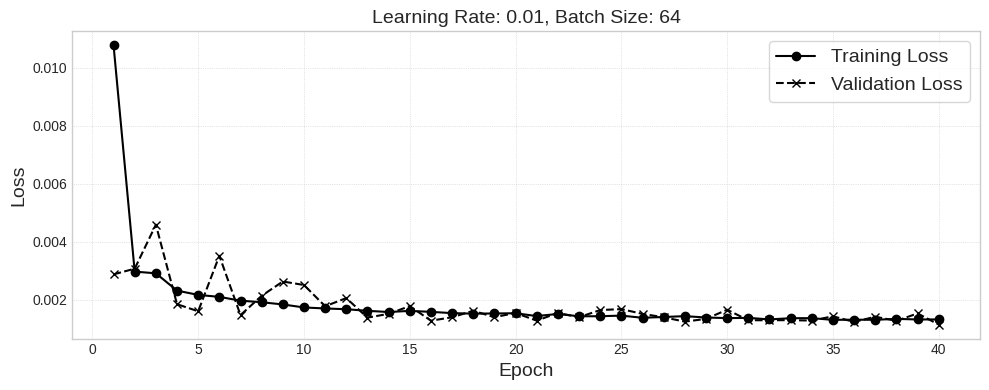

In [ ]:
plot_train_val_loss(df_MLP_performance_model1, zoom=None)

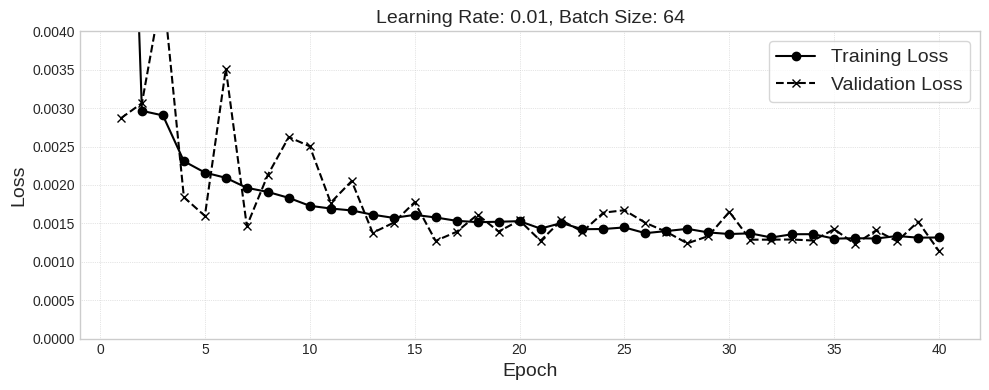

In [ ]:
plot_train_val_loss(df_MLP_performance_model1, zoom=(0,0.004))

In [ ]:
sorted_df = df_MLP_performance_model1.sort_values(by=('Metrics', 'RMSE'))
sorted_df.head()

(Hyperparameters, Learning Rate)  (Hyperparameters, Batch Size)  \
39                              0.01                             64   
35                              0.01                             64   
27                              0.01                             64   
37                              0.01                             64   
15                              0.01                             64   

    (Metrics, Epoch)  (Metrics, Training Loss)  (Metrics, Validation Loss)  \
39                40                  0.001316                    0.001137   
35                36                  0.001307                    0.001230   
27                28                  0.001428                    0.001239   
37                38                  0.001335                    0.001266   
15                16                  0.001577                    0.001273   

    (Metrics, RMSE)  
39         0.033725  
35         0.035076  
27         0.035211  
37         0.035594  
15         0.035683

## Final

In [ ]:
seed_value = 42

# CPU seed numpy, pytorch
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# GPU seed
torch.cuda.manual_seed(seed_value)

In [ ]:
# check gpu, cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# hyperparameters
learning_rates = [0.01]
num_epochs = 800
batch_sizes = [64]

# train model
df_MLP_performance_model1_final, last_trained_performance_model1_final, best_performance_model1_final = training_function(PerformanceMLP_1, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes)

cpu


LR=0.01, Batch=64: 100%|██████████| 800/800 [2:44:40<00:00, 12.35s/it]


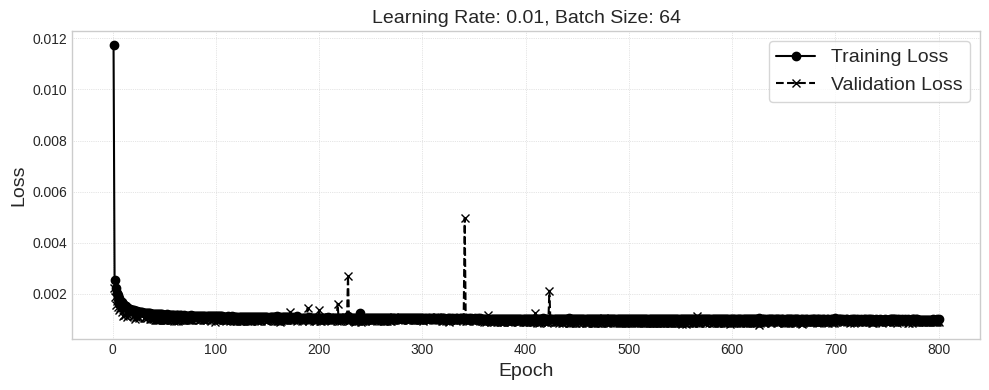

In [ ]:
plot_train_val_loss(df_MLP_performance_model1_final, zoom=None)

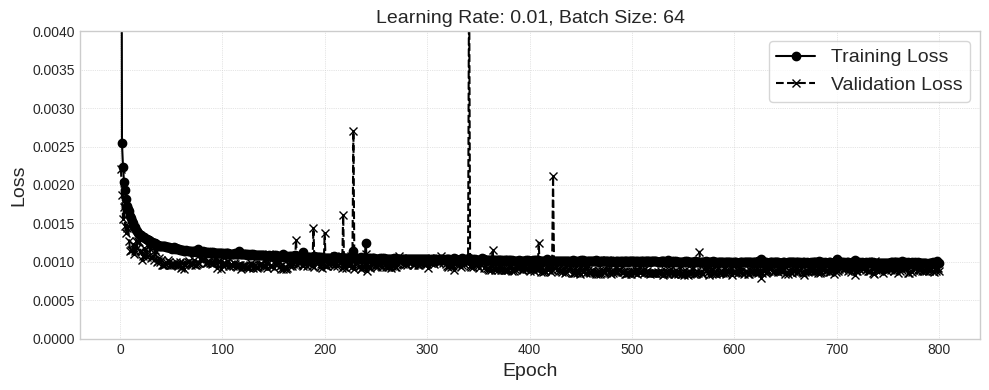

In [ ]:
plot_train_val_loss(df_MLP_performance_model1_final, zoom=(0,0.004))

In [ ]:
sorted_df = df_MLP_performance_model1_final.sort_values(by=('Metrics', 'RMSE'))
sorted_df.head()

(Hyperparameters, Learning Rate)  (Hyperparameters, Batch Size)  \
625                              0.01                             64   
554                              0.01                             64   
597                              0.01                             64   
550                              0.01                             64   
667                              0.01                             64   

     (Metrics, Epoch)  (Metrics, Training Loss)  (Metrics, Validation Loss)  \
625               626                  0.001030                    0.000788   
554               555                  0.001000                    0.000823   
597               598                  0.000993                    0.000829   
550               551                  0.001002                    0.000829   
667               668                  0.000995                    0.000831   

     (Metrics, RMSE)  
625         0.028075  
554         0.028702  
597         0.028798  
550         0.028800  
667         0.028837

## Test

### Last Trained Model

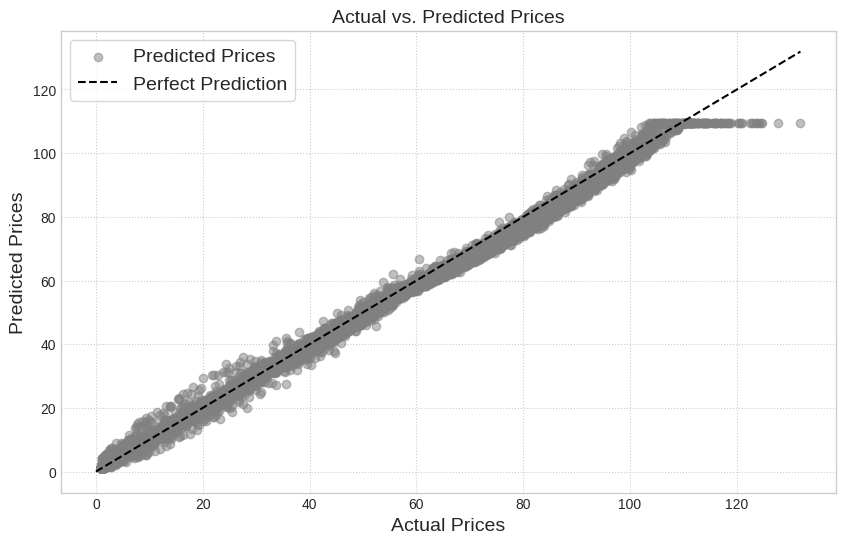

In [ ]:
# evaluate model
actual_prices, predicted_prices = evaluate_model_on_test_set(last_trained_performance_model1_final, test_dataset, batch_sizes[0], device)

# create df for plotting
df_MLP_performance_model1_test_predictions= pd.DataFrame({'Actual Prices': actual_prices, 'Predicted Prices': predicted_prices})

# plot
plot_actual_vs_predicted(df_MLP_performance_model1_test_predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print("Model 1 Last Trained Model")
print("----------------------------------------------")
print("----------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("----------------------------------------------")

Model 1 Last Trained Model
----------------------------------------------
----------------------------------------------
Mean Squared Error (MSE): 1.58
Root Mean Squared Error (RMSE): 1.26
Mean Absolute Error (MAE): 0.75
R-squared (R2): 1.00
----------------------------------------------


### Best Model

In [ ]:
batch_sizes= [128]

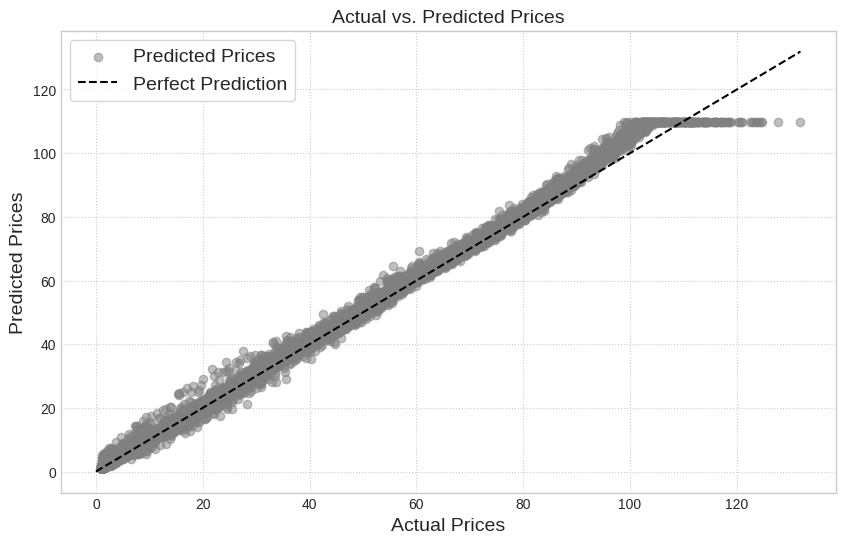

In [ ]:
# evaluate model
actual_prices, predicted_prices = evaluate_model_on_test_set(best_performance_model1_final, test_dataset, batch_sizes[0], device)

# create df for plotting
df_MLP_performance_model1_test_predictions= pd.DataFrame({'Actual Prices': actual_prices, 'Predicted Prices': predicted_prices})

# plot
plot_actual_vs_predicted(df_MLP_performance_model1_test_predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print("Model 1 Best Model")
print("----------------------------------------------")
print("----------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("----------------------------------------------")

Model 1 Best Model
----------------------------------------------
----------------------------------------------
Mean Squared Error (MSE): 1.08
Root Mean Squared Error (RMSE): 1.04
Mean Absolute Error (MAE): 0.51
R-squared (R2): 1.00
----------------------------------------------


## Save Final Model

In [ ]:
# path for google drive
path2 = path+"trained_models/MLP_final_models/"

In [ ]:
import torch

# save whole model
torch.save(best_performance_model1_final, path2+"Performance_MLP_model_1/Performance_MLP_model_1_best_whole.pth")
# save without class
torch.save(best_performance_model1_final.state_dict(), path2+"Performance_MLP_model_1/Performance_MLP_model_1_best_without.pth")


# save whole model
torch.save(last_trained_performance_model1_final, path2+"Performance_MLP_model_1/Performance_MLP_model_1_last_trained_whole.pth")
# save without class
torch.save(last_trained_performance_model1_final.state_dict(), path2+"Performance_MLP_model_1/Performance_MLP_model_1_last_trained_without.pth")

## Get Models

In [ ]:
# path for google drive
path2 = path+"trained_models/MLP_final_models/"

In [ ]:
# load models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

best_performance_model1_final = PerformanceMLP_1().to(device)
best_performance_model1_final.load_state_dict(torch.load(path2+"Performance_MLP_model_1/Performance_MLP_model_1_best_without.pth", map_location=device))

last_trained_performance_model1_final = PerformanceMLP_1().to(device)
last_trained_performance_model1_final.load_state_dict(torch.load(path2+"Performance_MLP_model_1/Performance_MLP_model_1_last_trained_without.pth", map_location=device))

<All keys matched successfully>

# Model 2

## Prepare Data

In [ ]:
# features and targets
feature_columns_model2 = ['moneyness','log_strike_price','impl_volatility','maturity','t30ret','sprtrn','log_BSM_Vola_ATM','log_spindx']
target_column = 'log_price'

In [ ]:
# create df with chosen features/targets
bsm_features = df_model[feature_columns_model2]
bsm_targets = df_model[target_column]

In [ ]:
from sklearn.model_selection import train_test_split

# train val test split
X_train, X_test, y_train, y_test= train_test_split(bsm_features, bsm_targets, test_size=0.3, random_state= 42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state= 42, shuffle=True)

# print length
print('Train: {}, Test: {}, Val: {}'.format(len(X_train), len(X_test), len(X_val)))

Train: 208012, Test: 44574, Val: 44574


In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler
scaler_input = RobustScaler()

# fit scaler to training data
scaler_input.fit(X_train)

# transform training data
X_train_scaled = scaler_input.transform(X_train)

# transform validation data with fitted scaler
X_val_scaled = scaler_input.transform(X_val)

# transform test data with fitted scaler
X_test_scaled = scaler_input.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler
scaler_target = RobustScaler()

# fit scaler to target training data
scaler_target.fit(y_train.values.reshape(-1, 1))

# transform target training data
y_train_scaled = scaler_target.transform(y_train.values.reshape(-1, 1))

# transform target validation data with fitted scaler
y_val_scaled = scaler_target.transform(y_val.values.reshape(-1, 1))

# transform target test data with fitted scaler
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))

In [ ]:
# features for robustness test
feature_columns_model2_robust = ['moneyness','log_strike_price','impl_volatility','maturity','t30ret','sprtrn','log_BSM_Vola_ATM','log_spindx']

In [ ]:
# transform robustness test dataframes using the same scaler fitted on the training data
df_model_test_feb_mar_scaled = scaler_input.transform(df_model_test_feb_mar[feature_columns_model2_robust])
df_model_test_apr_mai_scaled = scaler_input.transform(df_model_test_apr_mai[feature_columns_model2_robust])
df_model_test_jun_jul_scaled = scaler_input.transform(df_model_test_jun_jul[feature_columns_model2_robust])
df_model_test_aug_sep_scaled = scaler_input.transform(df_model_test_aug_sep[feature_columns_model2_robust])
df_model_test_oct_nov_scaled = scaler_input.transform(df_model_test_oct_nov[feature_columns_model2_robust])
df_model_test_2020_scaled = scaler_input.transform(df_model_test_2020[feature_columns_model2_robust])

# transform target robustness test
df_model_test_feb_mar_target_scaled = scaler_target.transform(df_model_test_feb_mar[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_target_scaled = scaler_target.transform(df_model_test_apr_mai[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_target_scaled = scaler_target.transform(df_model_test_jun_jul[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_target_scaled = scaler_target.transform(df_model_test_aug_sep[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_target_scaled = scaler_target.transform(df_model_test_oct_nov[target_column].values.reshape(-1, 1))
df_model_test_2020_target_scaled = scaler_target.transform(df_model_test_2020[target_column].values.reshape(-1, 1))

In [ ]:
# transform robustness test df
df_model_test_feb_mar_scaled = scaler_input.transform(df_model_test_feb_mar[feature_columns_model2_robust])
df_model_test_apr_mai_scaled = scaler_input.transform(df_model_test_apr_mai[feature_columns_model2_robust])
df_model_test_jun_jul_scaled = scaler_input.transform(df_model_test_jun_jul[feature_columns_model2_robust])
df_model_test_aug_sep_scaled = scaler_input.transform(df_model_test_aug_sep[feature_columns_model2_robust])
df_model_test_oct_nov_scaled = scaler_input.transform(df_model_test_oct_nov[feature_columns_model2_robust])
df_model_test_2020_scaled = scaler_input.transform(df_model_test_2020[feature_columns_model2_robust])

# transform target robustness test df
df_model_test_feb_mar_target_scaled = scaler_target.transform(df_model_test_feb_mar[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_target_scaled = scaler_target.transform(df_model_test_apr_mai[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_target_scaled = scaler_target.transform(df_model_test_jun_jul[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_target_scaled = scaler_target.transform(df_model_test_aug_sep[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_target_scaled = scaler_target.transform(df_model_test_oct_nov[target_column].values.reshape(-1, 1))
df_model_test_2020_target_scaled = scaler_target.transform(df_model_test_2020[target_column].values.reshape(-1, 1))

# transform robustness test df
df_model_test_feb_mar_otm_scaled = scaler_input.transform(df_model_test_feb_mar_otm[feature_columns_model2_robust])
df_model_test_feb_mar_dotm_scaled = scaler_input.transform(df_model_test_feb_mar_dotm[feature_columns_model2_robust])
df_model_test_feb_mar_atm_scaled = scaler_input.transform(df_model_test_feb_mar_atm[feature_columns_model2_robust])

df_model_test_apr_mai_otm_scaled = scaler_input.transform(df_model_test_apr_mai_otm[feature_columns_model2_robust])
df_model_test_apr_mai_dotm_scaled = scaler_input.transform(df_model_test_apr_mai_dotm[feature_columns_model2_robust])
df_model_test_apr_mai_atm_scaled = scaler_input.transform(df_model_test_apr_mai_atm[feature_columns_model2_robust])

df_model_test_jun_jul_otm_scaled = scaler_input.transform(df_model_test_jun_jul_otm[feature_columns_model2_robust])
df_model_test_jun_jul_dotm_scaled = scaler_input.transform(df_model_test_jun_jul_dotm[feature_columns_model2_robust])
df_model_test_jun_jul_atm_scaled = scaler_input.transform(df_model_test_jun_jul_atm[feature_columns_model2_robust])

df_model_test_aug_sep_otm_scaled = scaler_input.transform(df_model_test_aug_sep_otm[feature_columns_model2_robust])
df_model_test_aug_sep_dotm_scaled = scaler_input.transform(df_model_test_aug_sep_dotm[feature_columns_model2_robust])
df_model_test_aug_sep_atm_scaled = scaler_input.transform(df_model_test_aug_sep_atm[feature_columns_model2_robust])

df_model_test_oct_nov_otm_scaled = scaler_input.transform(df_model_test_oct_nov_otm[feature_columns_model2_robust])
df_model_test_oct_nov_dotm_scaled = scaler_input.transform(df_model_test_oct_nov_dotm[feature_columns_model2_robust])
df_model_test_oct_nov_atm_scaled = scaler_input.transform(df_model_test_oct_nov_atm[feature_columns_model2_robust])

df_model_test_2020_otm_scaled = scaler_input.transform(df_model_test_2020_otm[feature_columns_model2_robust])
df_model_test_2020_dotm_scaled = scaler_input.transform(df_model_test_2020_dotm[feature_columns_model2_robust])
df_model_test_2020_atm_scaled = scaler_input.transform(df_model_test_2020_atm[feature_columns_model2_robust])

# transform robustness test target df
df_model_test_feb_mar_otm_target_scaled = scaler_target.transform(df_model_test_feb_mar_otm[target_column].values.reshape(-1, 1))
df_model_test_feb_mar_dotm_target_scaled = scaler_target.transform(df_model_test_feb_mar_dotm[target_column].values.reshape(-1, 1))
df_model_test_feb_mar_atm_target_scaled = scaler_target.transform(df_model_test_feb_mar_atm[target_column].values.reshape(-1, 1))

df_model_test_apr_mai_otm_target_scaled = scaler_target.transform(df_model_test_apr_mai_otm[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_dotm_target_scaled = scaler_target.transform(df_model_test_apr_mai_dotm[target_column].values.reshape(-1, 1))
df_model_test_apr_mai_atm_target_scaled = scaler_target.transform(df_model_test_apr_mai_atm[target_column].values.reshape(-1, 1))

df_model_test_jun_jul_otm_target_scaled = scaler_target.transform(df_model_test_jun_jul_otm[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_dotm_target_scaled = scaler_target.transform(df_model_test_jun_jul_dotm[target_column].values.reshape(-1, 1))
df_model_test_jun_jul_atm_target_scaled = scaler_target.transform(df_model_test_jun_jul_atm[target_column].values.reshape(-1, 1))

df_model_test_aug_sep_otm_target_scaled = scaler_target.transform(df_model_test_aug_sep_otm[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_dotm_target_scaled = scaler_target.transform(df_model_test_aug_sep_dotm[target_column].values.reshape(-1, 1))
df_model_test_aug_sep_atm_target_scaled = scaler_target.transform(df_model_test_aug_sep_atm[target_column].values.reshape(-1, 1))

df_model_test_oct_nov_otm_target_scaled = scaler_target.transform(df_model_test_oct_nov_otm[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_dotm_target_scaled = scaler_target.transform(df_model_test_oct_nov_dotm[target_column].values.reshape(-1, 1))
df_model_test_oct_nov_atm_target_scaled = scaler_target.transform(df_model_test_oct_nov_atm[target_column].values.reshape(-1, 1))

df_model_test_2020_otm_target_scaled = scaler_target.transform(df_model_test_2020_otm[target_column].values.reshape(-1, 1))
df_model_test_2020_dotm_target_scaled = scaler_target.transform(df_model_test_2020_dotm[target_column].values.reshape(-1, 1))
df_model_test_2020_atm_target_scaled = scaler_target.transform(df_model_test_2020_atm[target_column].values.reshape(-1, 1))

## Architecture: 12 Layers

In [ ]:
import torch.nn as nn

class PerformanceMLP_2(nn.Module):
    def __init__(self):
        super(PerformanceMLP_2, self).__init__()

        # fully connected layers
        self.fc1 = nn.Linear(8, 10)
        self.fc2 = nn.Linear(10, 15)
        self.fc3 = nn.Linear(15, 20)
        self.fc4 = nn.Linear(20, 25)
        self.fc5 = nn.Linear(25, 30)
        self.fc6 = nn.Linear(30, 25)
        self.fc7 = nn.Linear(25, 20)
        self.fc8 = nn.Linear(20, 15)
        self.fc9 = nn.Linear(15, 10)
        self.fc10 = nn.Linear(10, 7)
        self.fc11 = nn.Linear(7, 4)
        self.fc12 = nn.Linear(4, 2)

        self.fc13 = nn.Linear(2, 1)

        # activation function
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        # flatten input
        x = x.view(x.size(0), -1)

        # fully connected layers with ReLU
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.relu(self.fc10(x))
        x = self.relu(self.fc11(x))
        x = self.relu(self.fc12(x))

        x = self.fc13(x)

        return x

In [ ]:
# print architecture
print("MLP architecture:\n\n{}\n".format(PerformanceMLP_2()))

MLP architecture:

PerformanceMLP_2(
  (fc1): Linear(in_features=8, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=30, bias=True)
  (fc6): Linear(in_features=30, out_features=25, bias=True)
  (fc7): Linear(in_features=25, out_features=20, bias=True)
  (fc8): Linear(in_features=20, out_features=15, bias=True)
  (fc9): Linear(in_features=15, out_features=10, bias=True)
  (fc10): Linear(in_features=10, out_features=7, bias=True)
  (fc11): Linear(in_features=7, out_features=4, bias=True)
  (fc12): Linear(in_features=4, out_features=2, bias=True)
  (fc13): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
)



## Tensor Datasets

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def create_tensor_datasets(features_scaled, targets_scaled):
    """
    creates tensor datasets

    parameters:
    - features_scaled: scaled features
    - targets_scaled: scaled targets

    returns:
    - tensor dataset with features and targets tensors.
    """

    features_tensor = torch.tensor(features_scaled, dtype=torch.float)
    targets_tensor = torch.tensor(targets_scaled, dtype=torch.float)
    return TensorDataset(features_tensor, targets_tensor)

In [ ]:
# training, validation, and testing data into tensor datasets
train_dataset = create_tensor_datasets(X_train_scaled, y_train_scaled)
val_dataset = create_tensor_datasets(X_val_scaled, y_val_scaled)
test_dataset = create_tensor_datasets(X_test_scaled, y_test_scaled)

In [ ]:
# robustness test data into tensor datasets
feb_mar_dataset = create_tensor_datasets(df_model_test_feb_mar_scaled, df_model_test_feb_mar_target_scaled)
apr_mai_dataset = create_tensor_datasets(df_model_test_apr_mai_scaled, df_model_test_apr_mai_target_scaled)
jun_jul_dataset = create_tensor_datasets(df_model_test_jun_jul_scaled, df_model_test_jun_jul_target_scaled)
aug_sep_dataset = create_tensor_datasets(df_model_test_aug_sep_scaled, df_model_test_aug_sep_target_scaled)
oct_nov_dataset = create_tensor_datasets(df_model_test_oct_nov_scaled, df_model_test_oct_nov_target_scaled)
test_2020_dataset = create_tensor_datasets(df_model_test_2020_scaled, df_model_test_2020_target_scaled)

In [ ]:
 # robustness test data into tensor datasets
feb_mar_otm_dataset = create_tensor_datasets(df_model_test_feb_mar_otm_scaled, df_model_test_feb_mar_otm_target_scaled)
feb_mar_dotm_dataset = create_tensor_datasets(df_model_test_feb_mar_dotm_scaled, df_model_test_feb_mar_dotm_target_scaled)
feb_mar_atm_dataset = create_tensor_datasets(df_model_test_feb_mar_atm_scaled, df_model_test_feb_mar_atm_target_scaled)

 # robustness test data into tensor datasets
apr_mai_otm_dataset = create_tensor_datasets(df_model_test_apr_mai_otm_scaled, df_model_test_apr_mai_otm_target_scaled)
apr_mai_dotm_dataset = create_tensor_datasets(df_model_test_apr_mai_dotm_scaled, df_model_test_apr_mai_dotm_target_scaled)
apr_mai_atm_dataset = create_tensor_datasets(df_model_test_apr_mai_atm_scaled, df_model_test_apr_mai_atm_target_scaled)

 # robustness test data into tensor datasets
jun_jul_otm_dataset = create_tensor_datasets(df_model_test_jun_jul_otm_scaled, df_model_test_jun_jul_otm_target_scaled)
jun_jul_dotm_dataset = create_tensor_datasets(df_model_test_jun_jul_dotm_scaled, df_model_test_jun_jul_dotm_target_scaled)
jun_jul_atm_dataset = create_tensor_datasets(df_model_test_jun_jul_atm_scaled, df_model_test_jun_jul_atm_target_scaled)

 # robustness test data into tensor datasets
aug_sep_otm_dataset = create_tensor_datasets(df_model_test_aug_sep_otm_scaled, df_model_test_aug_sep_otm_target_scaled)
aug_sep_dotm_dataset = create_tensor_datasets(df_model_test_aug_sep_dotm_scaled, df_model_test_aug_sep_dotm_target_scaled)
aug_sep_atm_dataset = create_tensor_datasets(df_model_test_aug_sep_atm_scaled, df_model_test_aug_sep_atm_target_scaled)

 # robustness test data into tensor datasets
oct_nov_otm_dataset = create_tensor_datasets(df_model_test_oct_nov_otm_scaled, df_model_test_oct_nov_otm_target_scaled)
oct_nov_dotm_dataset = create_tensor_datasets(df_model_test_oct_nov_dotm_scaled, df_model_test_oct_nov_dotm_target_scaled)
oct_nov_atm_dataset = create_tensor_datasets(df_model_test_oct_nov_atm_scaled, df_model_test_oct_nov_atm_target_scaled)

 # robustness test data into tensor datasets
test_2020_otm_dataset = create_tensor_datasets(df_model_test_2020_otm_scaled, df_model_test_2020_otm_target_scaled)
test_2020_dotm_dataset = create_tensor_datasets(df_model_test_2020_dotm_scaled, df_model_test_2020_dotm_target_scaled)
test_2020_atm_dataset = create_tensor_datasets(df_model_test_2020_atm_scaled, df_model_test_2020_atm_target_scaled)

## Train

In [ ]:
seed_value = 42

# CPU seed numpy, pytorch
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# GPU seed
torch.cuda.manual_seed(seed_value)

In [ ]:
# check gpu, cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# hyperparameters
learning_rates = [0.001, 0.005, 0.01, 0.05]
num_epochs = 20
batch_sizes = [32, 64, 128, 256]

# train model
df_MLP_performance_model2, last_trained_performance_model2, best_performance_model2 = training_function(PerformanceMLP_2, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes)

cpu


LR=0.05, Batch=256: 100%|██████████| 20/20 [01:24<00:00,  4.21s/it]


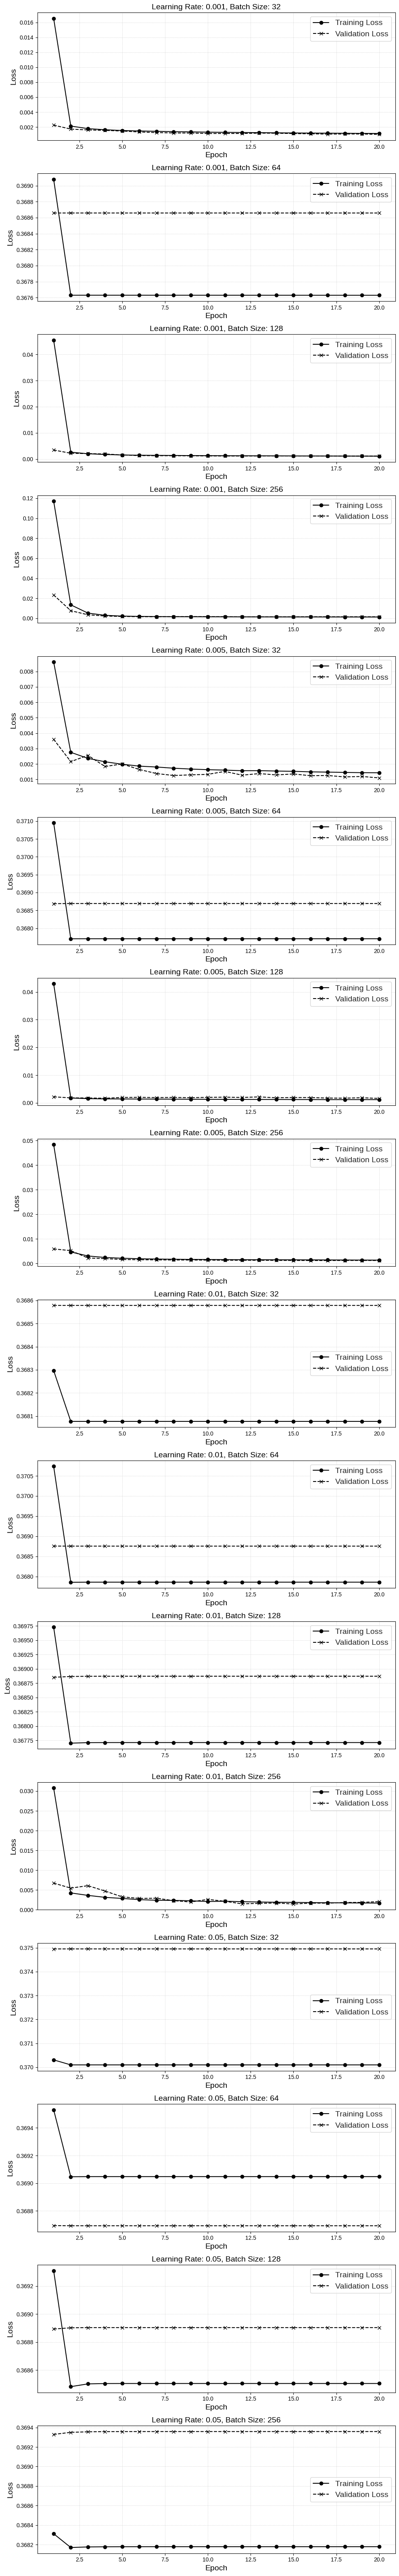

In [ ]:
plot_train_val_loss(df_MLP_performance_model2, zoom=None)

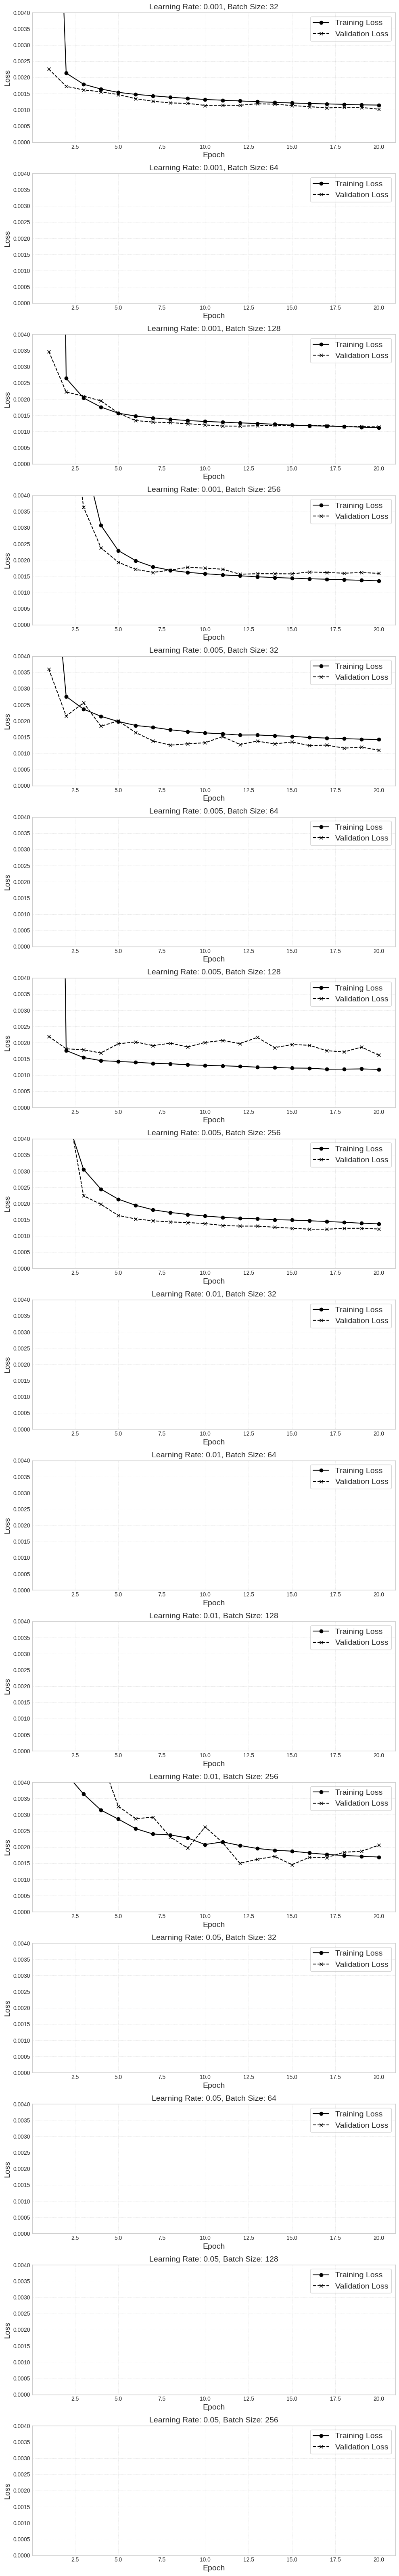

In [ ]:
plot_train_val_loss(df_MLP_performance_model2, zoom=(0,0.004))

In [ ]:
sorted_df = df_MLP_performance_model2.sort_values(by=('Metrics', 'RMSE'))
sorted_df.head(30)

(Hyperparameters, Learning Rate)  (Hyperparameters, Batch Size)  \
19                              0.001                             32   
16                              0.001                             32   
18                              0.001                             32   
17                              0.001                             32   
99                              0.005                             32   
15                              0.001                             32   
14                              0.001                             32   
9                               0.001                             32   
11                              0.001                             32   
10                              0.001                             32   
59                              0.001                            128   
57                              0.001                            128   
58                              0.001                            128   
97                              0.005                             32   
51                              0.001                            128   
50                              0.001                            128   
13                              0.001                             32   
52                              0.001                            128   
54                              0.001                            128   
56                              0.001                            128   
55                              0.001                            128   
12                              0.001                             32   
98                              0.005                             32   
53                              0.001                            128   
8                               0.001                             32   
49                              0.001                            128   
156                             0.005                            256   
7                               0.001                             32   
155                             0.005                            256   
159                             0.005                            256   

     (Metrics, Epoch)  (Metrics, Training Loss)  (Metrics, Validation Loss)  \
19                 20                  0.001145                    0.001017   
16                 17                  0.001182                    0.001059   
18                 19                  0.001152                    0.001072   
17                 18                  0.001167                    0.001074   
99                 20                  0.001426                    0.001096   
15                 16                  0.001195                    0.001096   
14                 15                  0.001209                    0.001131   
9                  10                  0.001319                    0.001134   
11                 12                  0.001273                    0.001139   
10                 11                  0.001295                    0.001142   
59                 20                  0.001119                    0.001144   
57                 18                  0.001151                    0.001151   
58                 19                  0.001135                    0.001153   
97                 18                  0.001452                    0.001159   
51                 12                  0.001267                    0.001167   
50                 11                  0.001290                    0.001170   
13                 14                  0.001229                    0.001173   
52                 13                  0.001247                    0.001178   
54                 15                  0.001199                    0.001178   
56                 17                  0.001166                    0.001184   
55                 16                  0.001181                    0.001184   
12                 13             

### Learning Rate: 0.001, Batch Size: 128

In [ ]:
seed_value = 42

# CPU seed numpy, pytorch
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# GPU seed
torch.cuda.manual_seed(seed_value)

In [ ]:
# check gpu, cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# hyperparameters
learning_rates = [0.001]
num_epochs = 30
batch_sizes = [128]

# train model
df_MLP_performance_model2, last_trained_performance_model2, best_performance_model2 = training_function(PerformanceMLP_2, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes)

cpu


LR=0.001, Batch=128: 100%|██████████| 30/30 [03:12<00:00,  6.42s/it]


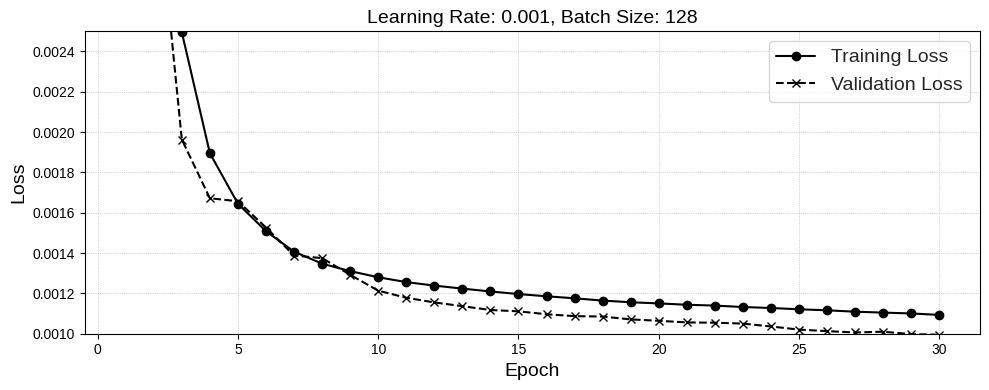

In [ ]:
plot_train_val_loss(df_MLP_performance_model2, zoom=(0.001,0.0025))

In [ ]:
sorted_df = df_MLP_performance_model2.sort_values(by=('Metrics', 'RMSE'))
sorted_df.head()

(Hyperparameters, Learning Rate)  (Hyperparameters, Batch Size)  \
29                             0.001                            128   
28                             0.001                            128   
26                             0.001                            128   
27                             0.001                            128   
25                             0.001                            128   

    (Metrics, Epoch)  (Metrics, Training Loss)  (Metrics, Validation Loss)  \
29                30                  0.001093                    0.000995   
28                29                  0.001100                    0.000998   
26                27                  0.001109                    0.001006   
27                28                  0.001105                    0.001010   
25                26                  0.001116                    0.001013   

    (Metrics, RMSE)  
29         0.031561  
28         0.031609  
26         0.031742  
27         0.031800  
25         0.031845

## Final

In [ ]:
seed_value = 42

# CPU seed numpy, pytorch
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# GPU seed
torch.cuda.manual_seed(seed_value)

In [ ]:
# check gpu, cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# hyperparameters
learning_rates = [0.001]
num_epochs = 800
batch_sizes = [128]

# train model
df_MLP_performance_model2_final, last_trained_performance_model2_final, best_performance_model2_final = training_function(PerformanceMLP_2, train_dataset, val_dataset, device, learning_rates, num_epochs, batch_sizes)

cpu


LR=0.001, Batch=128: 100%|██████████| 800/800 [1:25:24<00:00,  6.41s/it]


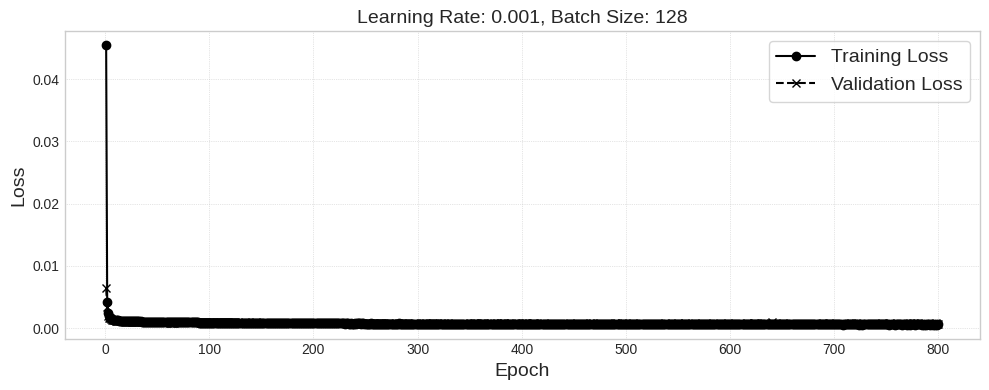

In [ ]:
plot_train_val_loss(df_MLP_performance_model2_final, zoom=None)

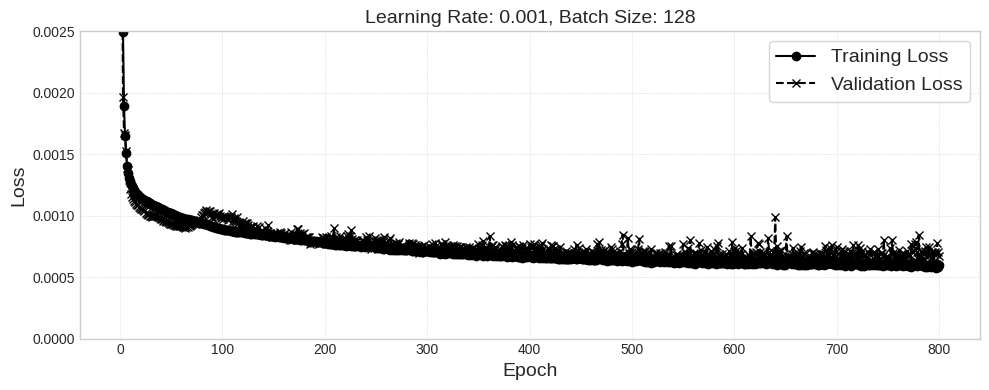

In [ ]:
plot_train_val_loss(df_MLP_performance_model2_final, zoom=(0,0.0025))

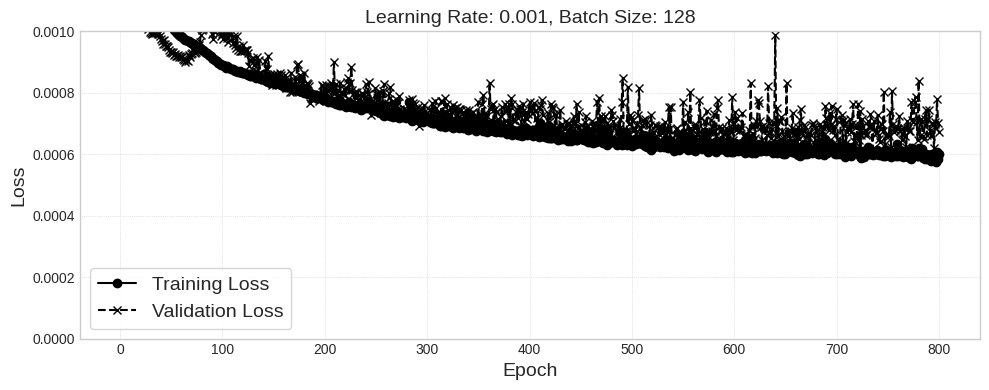

In [ ]:
plot_train_val_loss(df_MLP_performance_model2_final, zoom=(0,0.001))

In [ ]:
sorted_df = df_MLP_performance_model2_final.sort_values(by=('Metrics', 'RMSE'))
sorted_df.head()

(Hyperparameters, Learning Rate)  (Hyperparameters, Batch Size)  \
734                             0.001                            128   
669                             0.001                            128   
794                             0.001                            128   
653                             0.001                            128   
630                             0.001                            128   

     (Metrics, Epoch)  (Metrics, Training Loss)  (Metrics, Validation Loss)  \
734               735                  0.000599                    0.000618   
669               670                  0.000614                    0.000620   
794               795                  0.000588                    0.000620   
653               654                  0.000630                    0.000623   
630               631                  0.000610                    0.000624   

     (Metrics, RMSE)  
734         0.024888  
669         0.024908  
794         0.024914  
653         0.024977  
630         0.024999

## Test

### Last Trained Model

In [ ]:
batch_sizes = [128]

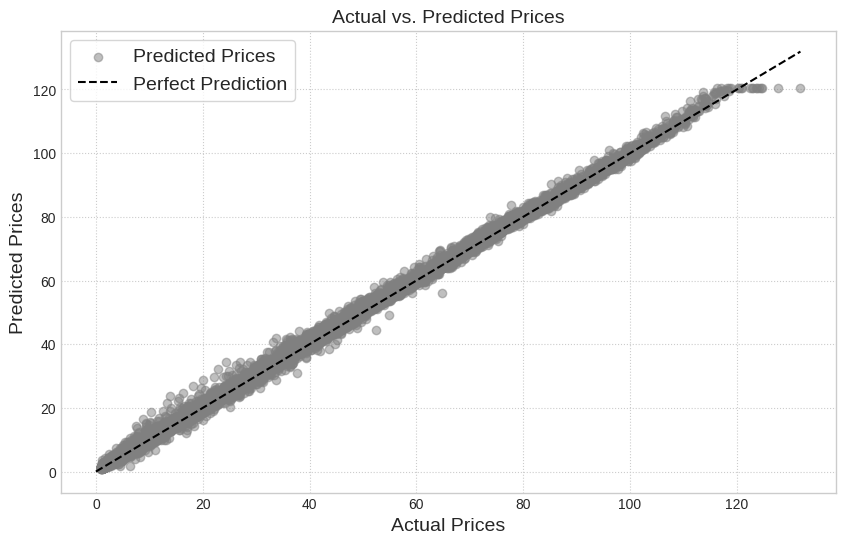

In [ ]:
# evaluate model
actual_prices, predicted_prices = evaluate_model_on_test_set(last_trained_performance_model2_final, test_dataset, batch_sizes[0], device)

# create df for plotting
df_MLP_performance_model2_test_predictions= pd.DataFrame({'Actual Prices': actual_prices, 'Predicted Prices': predicted_prices})

# plot
plot_actual_vs_predicted(df_MLP_performance_model2_test_predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print("Model 2 Last Trained Model")
print("----------------------------------------------")
print("----------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("----------------------------------------------")

Model 2 Last Trained Model
----------------------------------------------
----------------------------------------------
Mean Squared Error (MSE): 0.45
Root Mean Squared Error (RMSE): 0.67
Mean Absolute Error (MAE): 0.36
R-squared (R2): 1.00
----------------------------------------------


### Best Model

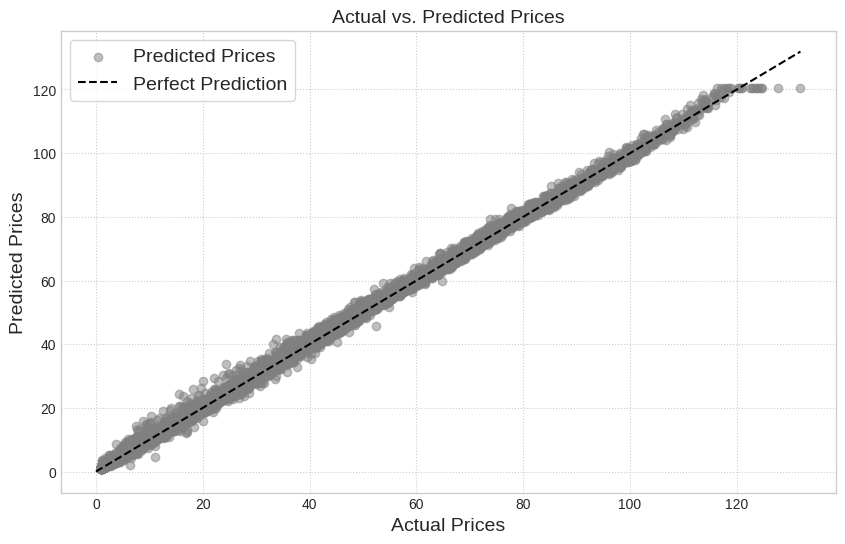

In [ ]:
# evaluate model
actual_prices, predicted_prices = evaluate_model_on_test_set(best_performance_model2_final, test_dataset, batch_sizes[0], device)

# create df for plotting
df_MLP_performance_model2_test_predictions= pd.DataFrame({'Actual Prices': actual_prices, 'Predicted Prices': predicted_prices})

# plot
plot_actual_vs_predicted(df_MLP_performance_model2_test_predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print("Model 2 Best Model")
print("----------------------------------------------")
print("----------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("----------------------------------------------")

Model 2 Best Model
----------------------------------------------
----------------------------------------------
Mean Squared Error (MSE): 0.39
Root Mean Squared Error (RMSE): 0.62
Mean Absolute Error (MAE): 0.34
R-squared (R2): 1.00
----------------------------------------------


## Save Final Model

In [ ]:
# path for google drive
path2 = path+"trained_models/MLP_final_models/"

In [ ]:
import torch

# save whole model
torch.save(best_performance_model2_final, path2+"Performance_MLP_model_2/Performance_MLP_model_2_best_whole.pth")
# save without class
torch.save(best_performance_model2_final.state_dict(), path2+"Performance_MLP_model_2/Performance_MLP_model_2_best_without.pth")


# save whole model
torch.save(last_trained_performance_model2_final, path2+"Performance_MLP_model_2/Performance_MLP_model_2_last_trained_whole.pth")
# save without class
torch.save(last_trained_performance_model2_final.state_dict(), path2+"Performance_MLP_model_2/Performance_MLP_model_2_last_trained_without.pth")

## Get Models

In [ ]:
# path for google drive
path2 = path+"trained_models/MLP_final_models/"

In [ ]:
# load models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

best_performance_model2_final = PerformanceMLP_2().to(device)
best_performance_model2_final.load_state_dict(torch.load(path2+"Performance_MLP_model_2/Performance_MLP_model_2_best_without.pth", map_location=device))


last_trained_performance_model2_final = PerformanceMLP_2().to(device)
last_trained_performance_model2_final.load_state_dict(torch.load(path2+"Performance_MLP_model_2/Performance_MLP_model_2_last_trained_without.pth", map_location=device))

<All keys matched successfully>

# Robustness Test

## Overview

### PER1

In [ ]:
# create dataset for tensors
datasets = {
    'Feb-Mar': feb_mar_dataset,
    'Apr-May': apr_mai_dataset,
    'Jun-Jul': jun_jul_dataset,
    'Aug-Sep': aug_sep_dataset,
    'Oct-Nov': oct_nov_dataset,
    '2020'   : test_2020_dataset,
}

In [ ]:
# create dataset for tensors
datasets2 = {
    'Feb-Mar OTM': feb_mar_otm_dataset,
    'Feb-Mar DOTM': feb_mar_dotm_dataset,
    'Feb-Mar ATM': feb_mar_atm_dataset,
    'Jun-Jul OTM': jun_jul_otm_dataset,
    'Jun-Jul DOTM': jun_jul_dotm_dataset,
    'Jun-Jul ATM': jun_jul_atm_dataset,
    'Oct-Nov OTM': oct_nov_otm_dataset,
    'Oct-Nov DOTM': oct_nov_dotm_dataset,
    'Oct-Nov ATM': oct_nov_atm_dataset
}

In [ ]:
results_df, metrics_results = evaluate_model_and_display_results(best_performance_model1_final, datasets, 128, device)
results_df_months_PER1 = results_df

results for Feb-Mar:
 mse = 232.95, rmse = 15.26, mae = 10.61, r2 = 0.80

results for Apr-May:
 mse = 45.68, rmse = 6.76, mae = 4.77, r2 = 0.93

results for Jun-Jul:
 mse = 16.93, rmse = 4.11, mae = 3.12, r2 = 0.96

results for Aug-Sep:
 mse = 23.14, rmse = 4.81, mae = 4.02, r2 = 0.93

results for Oct-Nov:
 mse = 44.80, rmse = 6.69, mae = 5.38, r2 = 0.91

results for 2020:
 mse = 83.56, rmse = 9.14, mae = 6.02, r2 = 0.87



In [ ]:
results_df, metrics_results = evaluate_model_and_display_results(best_performance_model1_final, datasets2, 128, device)
results_df_moneyness_PER1 = results_df

results for Feb-Mar OTM:
 mse = 421.48, rmse = 20.53, mae = 14.74, r2 = 0.61

results for Feb-Mar DOTM:
 mse = 140.67, rmse = 11.86, mae = 7.61, r2 = 0.57

results for Feb-Mar ATM:
 mse = 286.88, rmse = 16.94, mae = 11.03, r2 = 0.84

results for Jun-Jul OTM:
 mse = 8.69, rmse = 2.95, mae = 1.88, r2 = 0.90

results for Jun-Jul DOTM:
 mse = 2.21, rmse = 1.49, mae = 1.10, r2 = 0.77

results for Jun-Jul ATM:
 mse = 28.84, rmse = 5.37, mae = 4.03, r2 = 0.93

results for Oct-Nov OTM:
 mse = 9.07, rmse = 3.01, mae = 1.46, r2 = 0.94

results for Oct-Nov DOTM:
 mse = 1.80, rmse = 1.34, mae = 0.80, r2 = 0.91

results for Oct-Nov ATM:
 mse = 14.85, rmse = 3.85, mae = 2.18, r2 = 0.97



### PER2

In [ ]:
# create dataset for tensors
datasets = {
    'Feb-Mar': feb_mar_dataset,
    'Apr-May': apr_mai_dataset,
    'Jun-Jul': jun_jul_dataset,
    'Aug-Sep': aug_sep_dataset,
    'Oct-Nov': oct_nov_dataset,
    '2020'   : test_2020_dataset,
}

In [ ]:
# create dataset for tensors
datasets2 = {
    'Feb-Mar OTM': feb_mar_otm_dataset,
    'Feb-Mar DOTM': feb_mar_dotm_dataset,
    'Feb-Mar ATM': feb_mar_atm_dataset,
    'Jun-Jul OTM': jun_jul_otm_dataset,
    'Jun-Jul DOTM': jun_jul_dotm_dataset,
    'Jun-Jul ATM': jun_jul_atm_dataset,
    'Oct-Nov OTM': oct_nov_otm_dataset,
    'Oct-Nov DOTM': oct_nov_dotm_dataset,
    'Oct-Nov ATM': oct_nov_atm_dataset
}

In [ ]:
results_df, metrics_results = evaluate_model_and_display_results(best_performance_model2_final, datasets, 128, device)
results_df_months_PER2 = results_df

results for Feb-Mar:
 mse = 343.60, rmse = 18.54, mae = 13.01, r2 = 0.71

results for Apr-May:
 mse = 54.29, rmse = 7.37, mae = 5.70, r2 = 0.91

results for Jun-Jul:
 mse = 29.71, rmse = 5.45, mae = 4.30, r2 = 0.93

results for Aug-Sep:
 mse = 25.68, rmse = 5.07, mae = 4.30, r2 = 0.92

results for Oct-Nov:
 mse = 68.27, rmse = 8.26, mae = 6.34, r2 = 0.86

results for 2020:
 mse = 118.73, rmse = 10.90, mae = 7.17, r2 = 0.81



In [ ]:
results_df, metrics_results = evaluate_model_and_display_results(best_performance_model2_final, datasets2, 128, device)
results_df_moneyness_PER2 = results_df

results for Feb-Mar OTM:
 mse = 35.01, rmse = 5.92, mae = 3.59, r2 = 0.97

results for Feb-Mar DOTM:
 mse = 27.81, rmse = 5.27, mae = 3.33, r2 = 0.91

results for Feb-Mar ATM:
 mse = 81.57, rmse = 9.03, mae = 4.74, r2 = 0.96

results for Jun-Jul OTM:
 mse = 1.84, rmse = 1.36, mae = 0.92, r2 = 0.98

results for Jun-Jul DOTM:
 mse = 0.07, rmse = 0.26, mae = 0.20, r2 = 0.99

results for Jun-Jul ATM:
 mse = 5.39, rmse = 2.32, mae = 1.91, r2 = 0.99

results for Oct-Nov OTM:
 mse = 1.06, rmse = 1.03, mae = 0.63, r2 = 0.99

results for Oct-Nov DOTM:
 mse = 0.15, rmse = 0.39, mae = 0.23, r2 = 0.99

results for Oct-Nov ATM:
 mse = 1.89, rmse = 1.37, mae = 1.00, r2 = 1.00



## Feb-Mar

### Analysis Residuals

In [ ]:
# filter
months_filtered_PER1= results_df_months_PER1[results_df_months_PER1['period']== 'Feb-Mar']
months_filtered_PER2= results_df_months_PER2[results_df_months_PER2['period']== 'Feb-Mar']

In [ ]:
# reset index
df_model_test_feb_mar.reset_index(drop=True, inplace=True)

months_filtered_PER1.reset_index(drop=True, inplace=True)
months_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
# add predictions to df
df_model_test_feb_mar['PER1 PRED'] = months_filtered_PER1['predicted_prices']
df_model_test_feb_mar['PER2 PRED'] = months_filtered_PER2['predicted_prices']

In [ ]:
# drop and rename columns and
df_model_test_feb_mar.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_feb_mar.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# datetime
df_model_test_feb_mar['date'] = pd.to_datetime(df_model_test_feb_mar['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_feb_mar['Actual Prices'], df_model_test_feb_mar['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_feb_mar['Actual Prices'], df_model_test_feb_mar['PER2 PRED']))
total_rmse_BSM  = np.sqrt(mean_squared_error(df_model_test_feb_mar['Actual Prices'], df_model_test_feb_mar['BSM Prices']))
print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM}')

PER1: 15.262843053224199 
PER2: 18.536483446170553 
BSM: 24.199444476033566


In [ ]:
import numpy as np
import pandas as pd

# make a copy
df_model_test_feb_mar_residuals = df_model_test_feb_mar.copy()

# calculate residuals
df_model_test_feb_mar_residuals['Residuals_BSM'] = df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['BSM Prices']
df_model_test_feb_mar_residuals['Residuals_PER1'] = df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['PER1 PRED']
df_model_test_feb_mar_residuals['Residuals_PER2'] = df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['PER2 PRED']

# calculate absolute error
df_model_test_feb_mar_residuals['AE_BSM'] = np.abs(df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['BSM Prices'])
df_model_test_feb_mar_residuals['AE_PER1'] = np.abs(df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['PER1 PRED'])
df_model_test_feb_mar_residuals['AE_PER2'] = np.abs(df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['PER2 PRED'])

# calculate absolute percentage error
df_model_test_feb_mar_residuals['APE_BSM'] = np.abs((df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['BSM Prices']) / df_model_test_feb_mar['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER1'] = np.abs((df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['PER1 PRED']) / df_model_test_feb_mar['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER2'] = np.abs((df_model_test_feb_mar['Actual Prices'] - df_model_test_feb_mar['PER2 PRED']) / df_model_test_feb_mar['Actual Prices']) * 100


In [ ]:
# spearman correlation
df_model_test_feb_mar_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  Actual Prices  maturity       vix  \
strike_price         1.000000      -0.544108  0.250495 -0.790698   
Actual Prices       -0.544108       1.000000  0.084165  0.150194   
maturity             0.250495       0.084165  1.000000 -0.111710   
vix                 -0.790698       0.150194 -0.111710  1.000000   
interest rate       -0.613592       0.124851 -0.088492  0.609615   
S&P 500              0.836515      -0.126375  0.102227 -0.915699   
S&P 500 Return       0.131850      -0.033861  0.000336 -0.249648   
moneyness            0.121330       0.583755 -0.129904 -0.548796   
Vola_ATM            -0.773796       0.151662 -0.109954  0.961833   
BSM Prices          -0.445601       0.832572  0.400097  0.281259   
impl_volatility     -0.773796       0.151662 -0.109954  0.961833   
PER1 PRED           -0.240508       0.854972  0.390383 -0.025232   
PER2 PRED           -0.326720       0.846771  0.419064  0.082864   
Residuals_BSM       -0.027721      -0.029308 -0.623842 -0.227237   
Residuals_PER1      -0.712847       0.531184 -0.423195  0.424815   
Residuals_PER2      -0.250313      -0.031848 -0.634272  0.124816   
AE_BSM              -0.128300       0.177276  0.515402  0.301484   
AE_PER1             -0.352700       0.581977  0.072104  0.129045   
AE_PER2             -0.124278       0.341127  0.443626  0.093106   
APE_BSM              0.393778      -0.734363  0.296614  0.059950   
APE_PER1             0.272134      -0.473759 -0.002634 -0.110950   
APE_PER2             0.422420      -0.654992  0.269201 -0.096401   

                 interest rate   S&P 500  S&P 500 Return  moneyness  Vola_ATM  \
strike_price         -0.613592  0.836515        0.131850   0.121330 -0.773796   
Actual Prices         0.124851 -0.126375       -0.033861   0.583755  0.151662   
maturity             -0.088492  0.102227        0.000336  -0.129904 -0.109954   
vix                   0.609615 -0.915699       -0.249648  -0.548796  0.961833   
interest rate         1.000000 -0.625030       -0.029867  -0.423044  0.594891   
S&P 500              -0.625030  1.000000        0.226043   0.572297 -0.890594   
S&P 500 Return       -0.029867  0.226043        1.000000   0.172883 -0.320100   
moneyness            -0.423044  0.572297        0.172883   1.000000 -0.546052   
Vola_ATM              0.594891 -0.890594       -0.320100  -0.546052  1.000000   
BSM Prices            0.198873 -0.190927       -0.183392   0.293175  0.316617   
impl_volatility       0.594891 -0.890594       -0.320100  -0.546052  1.000000   
PER1 PRED            -0.029263  0.098344       -0.123025   0.560508  0.010032   
PER2 PRED             0.086617 -0.013434       -0.103174   0.452279  0.111598   
Residuals_BSM        -0.128277  0.114323        0.236185   0.370970 -0.295235   
Residuals_PER1        0.357756 -0.466092        0.090071   0.206012  0.369005   
Residuals_PER2        0.053568 -0.189705        0.086421   0.123759  0.071995   
AE_BSM                0.200227 -0.208447       -0.261393  -0.284936  0.365122   
AE_PER1               0.035545 -0.093690       -0.094037   0.353486  0.144828   
AE_PER2               0.088397 -0.042943       -0.166890   0.024244  0.146220   
APE_BSM               0.023834 -0.013923       -0.138462  -0.675836  0.098675   
APE_PER1             -0.151091  0.105203       -0.020613  -0.218001 -0.098753   
APE_PER2             -0.076764  0.107480       -0.075460  -0.484767 -0.059028   

                 BSM Prices  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price      -0.445601  ...  -0.326720      -0.027721       -0.712847   
Actual Prices      0.832572  ...   0.846771      -0.029308        0.531184   
maturity           0.400097  ...   0.419064      -0.623842       -0.423195   
vix                0.281259  ...   0.082864      -0.227237        0.424815   
interest rate      0.198873  ...   0.086617      -0.128277        0.357756   
S&P 500           -0.190927  ...  -0.013434       0.114323       -0.466092   
S&P 500 Return    -0.183392  ...  -0.10317

In [ ]:
plot_text_size = 14

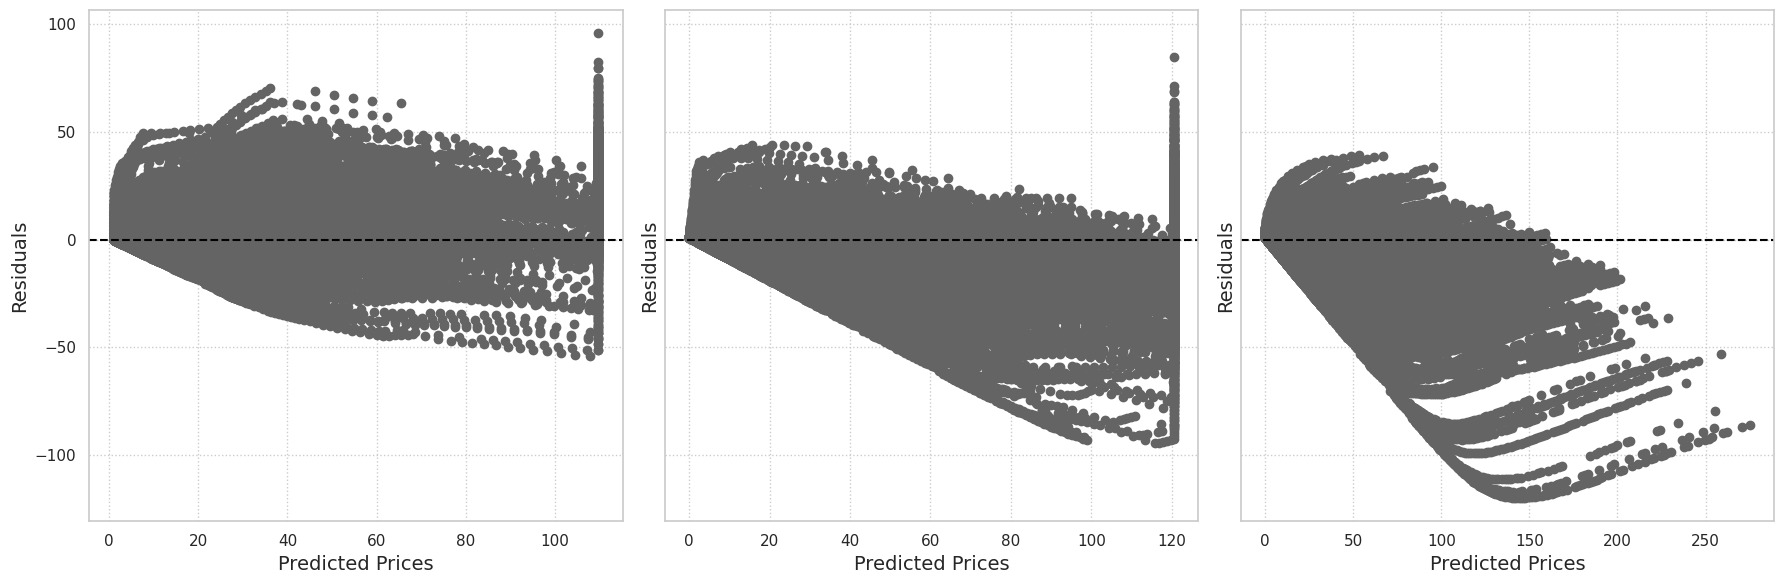

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme for plot
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals for PER1
axes[0].scatter(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals for PER2
axes[1].scatter(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals for BSM
axes[2].scatter(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

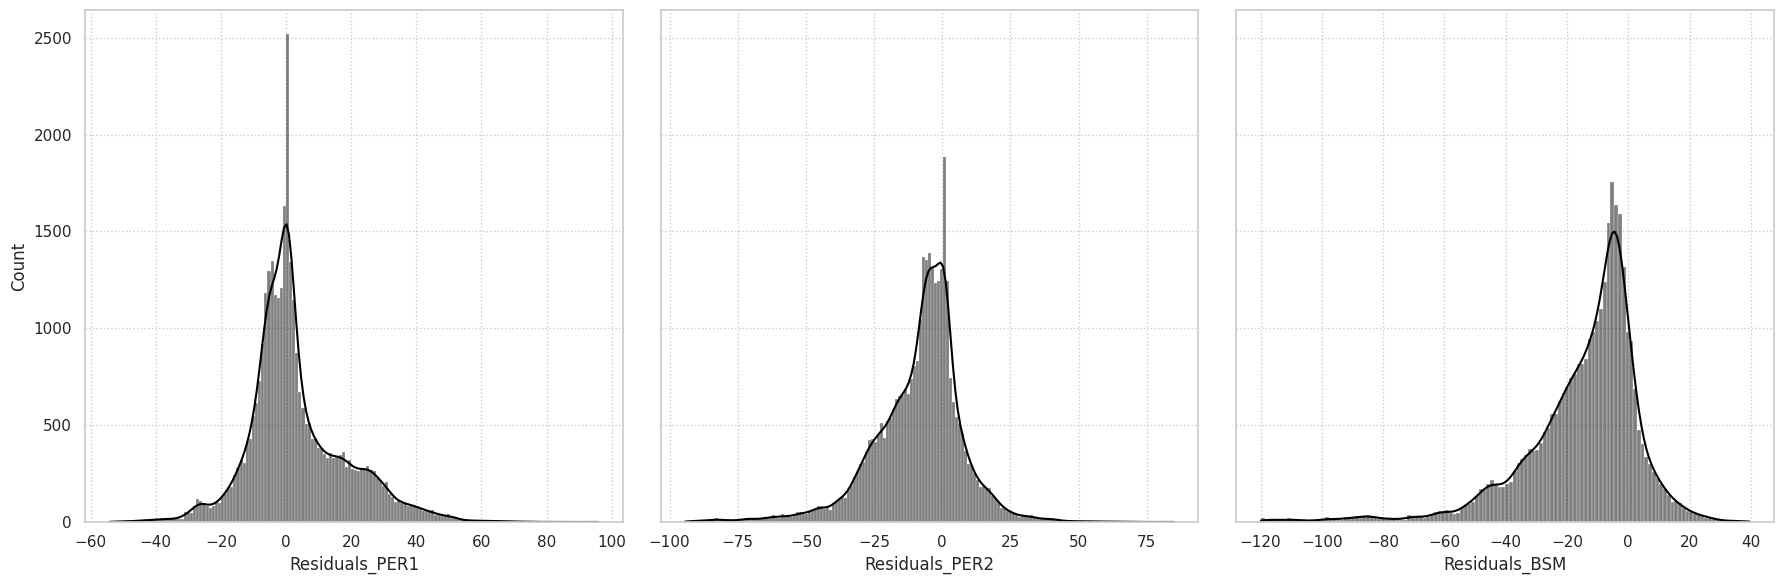

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation of residuals
std_dev_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))


BSM  : Standard Deviation of Residuals  19.2
PER1 : Standard Deviation of Residuals  14.93
PER2 : Standard Deviation of Residuals  16.43


In [ ]:
# mean of residuals
mean_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -14.74
PER1 : Mean of Residuals  3.16
PER2 : Mean of Residuals  -8.58


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['BSM Prices'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER1 PRED'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER2 PRED'])

print('Actual vs Predicted')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Predicted
BSM  : Spearman  SignificanceResult(statistic=0.8325720808444925, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.8549723238401643, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.8467706067810068, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Actual vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.029308195935194875, pvalue=9.514460608911918e-08)
PER1 : Spearman  SignificanceResult(statistic=0.5311839786933358, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.03184779534643144, pvalue=6.697529344946102e-09)


### Analysis AE

#### Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.027720943088365237, pvalue=4.4956185772187226e-07)
PER1 : Spearman  SignificanceResult(statistic=-0.7128474521186522, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.250312782131717, pvalue=0.0)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.12830029867398188, pvalue=1.3245449831472048e-121)
PER1 : Spearman  SignificanceResult(statistic=-0.35270045507110853, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.12427849856350405, pvalue=3.65135190365917e-114)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.6238417601352327, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.42319486010451596, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.6342718292432915, pvalue=0.0)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.5154023554542314, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.07210433558085855, pvalue=1.9070839126214826e-39)
PER2 : Spearman  SignificanceResult(statistic=0.443625827717952, pvalue=0.0)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.22723674724109097, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.4248152584045937, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.12481572118692504, pvalue=3.825456048735419e-115)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.3014839290055619, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.1290450655116501, pvalue=5.217601145032743e-123)
PER2 : Spearman  SignificanceResult(statistic=0.0931056281488608, pvalue=1.0826872637008366e-64)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.11432306916133855, pvalue=8.609159779575119e-97)
PER1 : Spearman  SignificanceResult(statistic=-0.46609232228770364, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.18970483706692828, pvalue=4.8040674957044734e-266)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.20844681066591084, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.09369027252113853, pvalue=1.7346217840969719e-65)
PER2 : Spearman  SignificanceResult(statistic=-0.0429425775420564, pvalue=5.2855671211964e-15)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 Return vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 Return vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 Return vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.23618526578534105, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.09007137486544202, pvalue=1.2057570688175314e-60)
PER2 : Spearman  SignificanceResult(statistic=0.08642058776341724, pvalue=5.902418806454519e-56)
--
S&P 500 Return vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.2613929570683859, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.09403710485072829, pvalue=5.821387764177735e-66)
PER2 : Spearman  SignificanceResult(statistic=-0.16688967944663632, pvalue=1.5796807001979217e-205)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.3709698059407811, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.20601203135152962, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.12375945031652051, pvalue=3.1985562625459587e-113)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.28493619471975423, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.35348605757742274, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.024244389892985933, pvalue=1.0168426104830243e-05)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.2952350899982831, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.36900492473259644, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.0719949920104519, pvalue=2.4829549785502273e-39)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.3651219826223997, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.14482825361401785, pvalue=9.39965477792077e-155)
PER2 : Spearman  SignificanceResult(statistic=0.14622049815170954, pvalue=9.787756729837206e-158)


## Oct-Nov

In [ ]:
# filter
months_filtered_PER1= results_df_months_PER1[results_df_months_PER1['period']== 'Oct-Nov']
months_filtered_PER2= results_df_months_PER2[results_df_months_PER2['period']== 'Oct-Nov']

In [ ]:
# drop index
df_model_test_oct_nov.reset_index(drop=True, inplace=True)
months_filtered_PER1.reset_index(drop=True, inplace=True)
months_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
months_filtered_PER1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21769 entries, 0 to 21768
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   period            21769 non-null  object 
 1   actual_prices     21769 non-null  float32
 2   predicted_prices  21769 non-null  float32
dtypes: float32(2), object(1)
memory usage: 340.3+ KB


In [ ]:
# add predictions
df_model_test_oct_nov['PER1 PRED'] = months_filtered_PER1['predicted_prices']
df_model_test_oct_nov['PER2 PRED'] = months_filtered_PER2['predicted_prices']

In [ ]:
# drop columns and rename
df_model_test_oct_nov.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_oct_nov.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# datetime
df_model_test_oct_nov['date'] = pd.to_datetime(df_model_test_oct_nov['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_oct_nov['Actual Prices'], df_model_test_oct_nov['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_oct_nov['Actual Prices'], df_model_test_oct_nov['PER2 PRED']))
total_rmse_BSM  = np.sqrt(mean_squared_error(df_model_test_oct_nov['Actual Prices'], df_model_test_oct_nov['BSM Prices']))
print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM}')

PER1: 6.693539343676349 
PER2: 8.262408109340711 
BSM: 9.822312293276067


In [ ]:
df_model_test_oct_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21769 entries, 0 to 21768
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             21769 non-null  datetime64[ns]
 1   strike_price     21769 non-null  float64       
 2   best_bid         21769 non-null  float64       
 3   best_offer       21769 non-null  float64       
 4   Actual Prices    21769 non-null  float64       
 5   maturity         21769 non-null  float64       
 6   vix              21769 non-null  float64       
 7   interest rate    21769 non-null  float64       
 8   S&P 500          21769 non-null  float64       
 9   S&P 500 Return   21769 non-null  float64       
 10  moneyness        21769 non-null  float64       
 11  Vola_ATM         21769 non-null  float64       
 12  BSM Prices       21769 non-null  float64       
 13  impl_volatility  21769 non-null  float64       
 14  PER1 PRED        21769 non-null  float

### Maturity

In [ ]:
# filter
df_model_test_oct_nov_30 = df_model_test_oct_nov[df_model_test_oct_nov['maturity']*365 >15]

In [ ]:
df_model_test_oct_nov_15 = df_model_test_oct_nov[(df_model_test_oct_nov['maturity']*365 <=15) & (df_model_test_oct_nov['maturity']*365 >5)]

In [ ]:
df_model_test_oct_nov_5 = df_model_test_oct_nov[df_model_test_oct_nov['maturity']*365 <=5]

In [ ]:
# check if same result
total_rmse_PER1_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_30['Actual Prices'], df_model_test_oct_nov_30['PER1 PRED']))
total_rmse_PER1_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_15['Actual Prices'], df_model_test_oct_nov_15['PER1 PRED']))
total_rmse_PER1_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_5['Actual Prices'], df_model_test_oct_nov_5['PER1 PRED']))

total_rmse_PER2_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_30['Actual Prices'], df_model_test_oct_nov_30['PER2 PRED']))
total_rmse_PER2_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_15['Actual Prices'], df_model_test_oct_nov_15['PER2 PRED']))
total_rmse_PER2_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_5['Actual Prices'], df_model_test_oct_nov_5['PER2 PRED']))

total_rmse_BSM_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_30['Actual Prices'], df_model_test_oct_nov_30['BSM Prices']))
total_rmse_BSM_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_15['Actual Prices'], df_model_test_oct_nov_15['BSM Prices']))
total_rmse_BSM_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_5['Actual Prices'], df_model_test_oct_nov_5['BSM Prices']))


print(f'30 Days PER1: {total_rmse_PER1_30.round(2)} PER2: {total_rmse_PER2_30.round(2)} BSM: {total_rmse_BSM_30.round(2)}')
print(f'15 Days PER1: {total_rmse_PER1_15.round(2)} PER2: {total_rmse_PER2_15.round(2)} BSM: {total_rmse_BSM_15.round(2)}')
print(f' 5 Days PER1: {total_rmse_PER1_5.round(2)}  PER2: {total_rmse_PER2_5.round(2)}  BSM: {total_rmse_BSM_5.round(2)}')

30 Days PER1: 7.07 PER2: 9.72 BSM: 11.67
15 Days PER1: 6.31 PER2: 5.82 BSM: 6.85
 5 Days PER1: 5.59  PER2: 5.94  BSM: 5.96


### Analysis Residuals

In [ ]:
import pandas as pd
# copy
df_model_test_oct_nov_residuals = df_model_test_oct_nov.copy()

# calculate residuals
df_model_test_oct_nov_residuals['Residuals_BSM'] = df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['BSM Prices']
df_model_test_oct_nov_residuals['Residuals_PER1'] = df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['PER1 PRED']
df_model_test_oct_nov_residuals['Residuals_PER2'] = df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['PER2 PRED']

# calculate absolute error
df_model_test_oct_nov_residuals['AE_BSM'] = np.abs(df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['BSM Prices'])
df_model_test_oct_nov_residuals['AE_PER1'] = np.abs(df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['PER1 PRED'])
df_model_test_oct_nov_residuals['AE_PER2'] = np.abs(df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['PER2 PRED'])

# calculate absolute percentage error
df_model_test_oct_nov_residuals['APE_BSM'] = np.abs((df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['BSM Prices']) / df_model_test_oct_nov['Actual Prices']) * 100
df_model_test_oct_nov_residuals['APE_PER1'] = np.abs((df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['PER1 PRED']) / df_model_test_oct_nov['Actual Prices']) * 100
df_model_test_oct_nov_residuals['APE_PER2'] = np.abs((df_model_test_oct_nov['Actual Prices'] - df_model_test_oct_nov['PER2 PRED']) / df_model_test_oct_nov['Actual Prices']) * 100

In [ ]:
df_model_test_oct_nov_residuals

date  strike_price  best_bid  best_offer  Actual Prices  maturity  \
0     2020-10-01        3385.0     57.30       58.00         57.650  0.041096   
1     2020-10-01        3390.0     54.60       55.30         54.950  0.041096   
2     2020-10-01        3395.0     51.90       52.60         52.250  0.041096   
3     2020-10-01        3400.0     49.40       49.70         49.550  0.041096   
4     2020-10-01        3405.0     46.90       47.50         47.200  0.041096   
...          ...           ...       ...         ...            ...       ...   
21764 2020-11-30        3825.0      4.40        4.80          4.600  0.076712   
21765 2020-11-30        3850.0      3.10        3.50          3.300  0.076712   
21766 2020-11-30        3875.0      2.20        2.55          2.375  0.076712   
21767 2020-11-30        3900.0      1.65        1.95          1.800  0.076712   
21768 2020-11-30        3925.0      1.25        1.50          1.375  0.076712   

         vix  interest rate  S&P 500  S&P 500 Return  ...  PER2 PRED  \
0      26.70       0.000076  3380.80        0.005293  ...  56.716190   
1      26.70       0.000076  3380.80        0.005293  ...  54.475784   
2      26.70       0.000076  3380.80        0.005293  ...  52.189022   
3      26.70       0.000076  3380.80        0.005293  ...  49.793900   
4      26.70       0.000076  3380.80        0.005293  ...  47.678040   
...      ...            ...      ...             ...  ...        ...   
21764  20.57       0.000066  3621.63       -0.004595  ...   9.595684   
21765  20.57       0.000066  3621.63       -0.004595  ...   7.263215   
21766  20.57       0.000066  3621.63       -0.004595  ...   5.491601   
21767  20.57       0.000066  3621.63       -0.004595  ...   3.945546   
21768  20.57       0.000066  3621.63       -0.004595  ...   2.836385   

       Residuals_BSM  Residuals_PER1  Residuals_PER2    AE_BSM   AE_PER1  \
0          -3.040722       -2.770467        0.933810  3.040722  2.770467   
1          -3.371789       -2.013078        0.474216  3.371789  2.013078   
2          -3.765896       -1.443390        0.060978  3.765896  1.443390   
3          -4.222757       -1.297748       -0.243900  4.222757  1.297748   
4          -4.392025       -0.960656       -0.478040  4.392025  0.960656   
...              ...             ...             ...       ...       ...   
21764      -5.675827       -5.028605       -4.995684  5.675827  5.028605   
21765      -4.403345       -3.989709       -3.963215  4.403345  3.989709   
21766      -3.326314       -2.939990       -3.116601  3.326314  2.939990   
21767      -2.365783       -2.154144       -2.145546  2.365783  2.154144   
21768      -1.630017       -1.395250       -1.461385  1.630017  1.395250   

        AE_PER2     APE_BSM    APE_PER1    APE_PER2  
0      0.933810    5.274453    4.805668    1.619791  
1      0.474216    6.136103    3.663471    0.862995  
2      0.060978    7.207457    2.762469    0.116704  
3      0.243900    8.522215    2.619067    0.492229  
4      0.478040    9.305138    2.035288    1.012796  
...         ...         ...         ...         ...  
21764  4.995684  123.387552  109.317498  108.601827  
21765  3.963215  133.434688  120.900261  120.097426  
21766  3.116601  140.055330  123.789034  131.225285  
21767  2.145546  131.432404  119.674693  119.197008  
21768  1.461385  118.546660  101.472733  106.282546  

[21769 rows x 25 columns]

In [ ]:
# MAPE
MAPE_BSM  = df_model_test_oct_nov_residuals['APE_BSM'].mean()
MAPE_PER1 = df_model_test_oct_nov_residuals['APE_PER1'].mean()
MAPE_PER2 = df_model_test_oct_nov_residuals['APE_PER2'].mean()

print(MAPE_BSM)
print(MAPE_PER1)
print(MAPE_PER2)

90.83993812577924
62.323449022901436
77.14535628021635


In [ ]:
# spearman correlation
df_model_test_oct_nov_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  Actual Prices  maturity       vix  \
strike_price         1.000000      -0.647153  0.239208 -0.621678   
Actual Prices       -0.647153       1.000000  0.254315  0.146354   
maturity             0.239208       0.254315  1.000000 -0.017542   
vix                 -0.621678       0.146354 -0.017542  1.000000   
interest rate       -0.384946       0.060453  0.018126  0.454658   
S&P 500              0.663608      -0.126403  0.014425 -0.944414   
S&P 500 Return       0.078957      -0.019874 -0.033162 -0.101174   
moneyness           -0.522462       0.716107 -0.277982 -0.232599   
Vola_ATM            -0.596162       0.141966 -0.011967  0.951214   
BSM Prices          -0.623765       0.953505  0.361266  0.243728   
impl_volatility     -0.596162       0.141966 -0.011967  0.951214   
PER1 PRED           -0.577040       0.965915  0.349659  0.114716   
PER2 PRED           -0.618283       0.957637  0.357913  0.223456   
Residuals_BSM        0.109261      -0.160728 -0.358922 -0.256941   
Residuals_PER1      -0.211584       0.037347 -0.312112  0.157454   
Residuals_PER2       0.020212      -0.028488 -0.331880 -0.228241   
AE_BSM              -0.209651       0.260619  0.344461  0.330302   
AE_PER1             -0.097080       0.248242  0.243255  0.094216   
AE_PER2             -0.181668       0.190061  0.307225  0.345797   
APE_BSM              0.483467      -0.781121 -0.001021  0.071703   
APE_PER1             0.542395      -0.756440 -0.058558 -0.095986   
APE_PER2             0.471172      -0.773023 -0.008416  0.079995   

                 interest rate   S&P 500  S&P 500 Return  moneyness  Vola_ATM  \
strike_price         -0.384946  0.663608        0.078957  -0.522462 -0.596162   
Actual Prices         0.060453 -0.126403       -0.019874   0.716107  0.141966   
maturity              0.018126  0.014425       -0.033162  -0.277982 -0.011967   
vix                   0.454658 -0.944414       -0.101174  -0.232599  0.951214   
interest rate         1.000000 -0.506277       -0.181871  -0.069499  0.422867   
S&P 500              -0.506277  1.000000        0.138446   0.230445 -0.911038   
S&P 500 Return       -0.181871  0.138446        1.000000   0.044281 -0.196777   
moneyness            -0.069499  0.230445        0.044281   1.000000 -0.230941   
Vola_ATM              0.422867 -0.911038       -0.196777  -0.230941  1.000000   
BSM Prices            0.111237 -0.216022       -0.114039   0.594104  0.270748   
impl_volatility       0.422867 -0.911038       -0.196777  -0.230941  1.000000   
PER1 PRED             0.081782 -0.092686       -0.094220   0.672829  0.140975   
PER2 PRED             0.110192 -0.195775       -0.104755   0.609746  0.251150   
Residuals_BSM        -0.115405  0.231550        0.284933   0.162280 -0.377325   
Residuals_PER1       -0.002499 -0.173951        0.247607   0.114579  0.032685   
Residuals_PER2       -0.115494  0.198419        0.270336   0.247579 -0.353093   
AE_BSM                0.138809 -0.293655       -0.246547  -0.089103  0.429590   
AE_PER1               0.055051 -0.049410       -0.189512   0.057544  0.178053   
AE_PER2               0.164530 -0.297155       -0.222572  -0.132766  0.437504   
APE_BSM               0.031267 -0.069851       -0.152455  -0.737818  0.143756   
APE_PER1             -0.023136  0.105087       -0.125056  -0.602510 -0.030753   
APE_PER2              0.045768 -0.071959       -0.141341  -0.721370  0.148843   

                 BSM Prices  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price      -0.623765  ...  -0.618283       0.109261       -0.211584   
Actual Prices      0.953505  ...   0.957637      -0.160728        0.037347   
maturity           0.361266  ...   0.357913      -0.358922       -0.312112   
vix                0.243728  ...   0.223456      -0.256941        0.157454   
interest rate      0.111237  ...   0.110192      -0.115405       -0.002499   
S&P 500           -0.216022  ...  -0.195775       0.231550       -0.173951   
S&P 500 Return    -0.114039  ...  -0.10475

In [ ]:
plot_text_size = 14

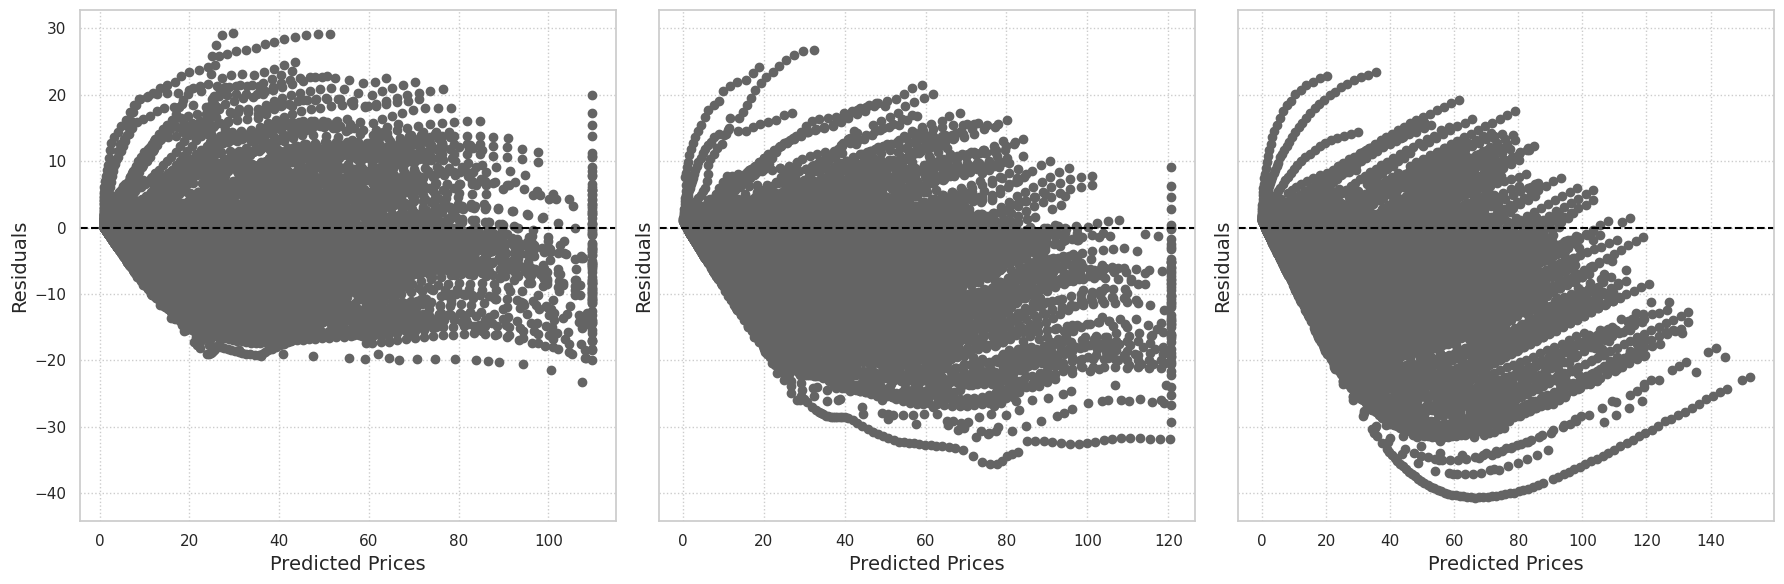

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals PER1
axes[0].scatter(df_model_test_oct_nov_residuals['PER1 PRED'], df_model_test_oct_nov_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals PER2
axes[1].scatter(df_model_test_oct_nov_residuals['PER2 PRED'], df_model_test_oct_nov_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals BSM
axes[2].scatter(df_model_test_oct_nov_residuals['BSM Prices'], df_model_test_oct_nov_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

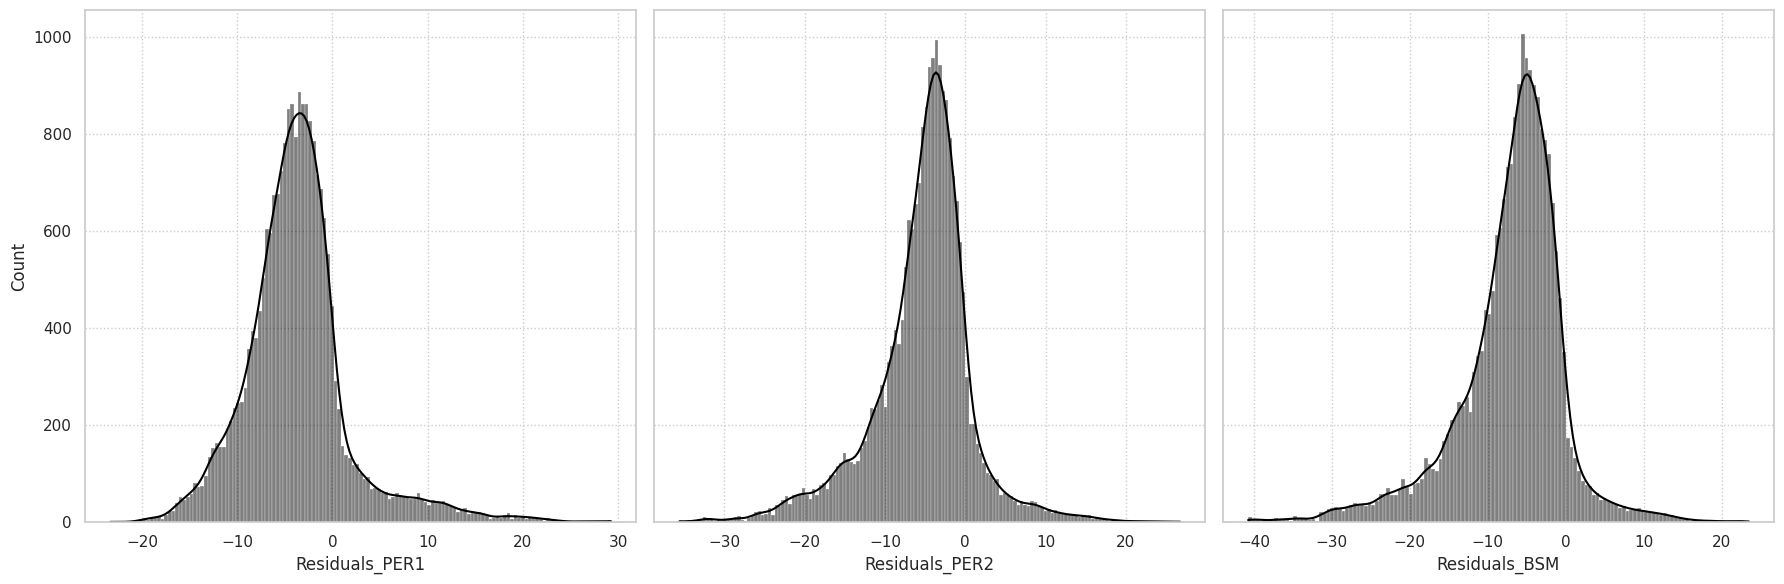

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation residuals
std_dev_bsm = df_model_test_oct_nov_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_oct_nov_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_oct_nov_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))

BSM  : Standard Deviation of Residuals  6.86
PER1 : Standard Deviation of Residuals  5.6
PER2 : Standard Deviation of Residuals  6.27


In [ ]:
# mean of residuals
mean_bsm = df_model_test_oct_nov_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_oct_nov_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_oct_nov_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -7.03
PER1 : Mean of Residuals  -3.67
PER2 : Mean of Residuals  -5.38


### Analysis AE

####Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.10926128427022767, pvalue=8.445142456373138e-59)
PER1 : Spearman  SignificanceResult(statistic=-0.211583512401822, pvalue=8.394639350340837e-219)
PER2 : Spearman  SignificanceResult(statistic=0.02021150803981518, pvalue=0.0028618103317711685)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.20965092826941076, pvalue=9.003635792117891e-215)
PER1 : Spearman  SignificanceResult(statistic=-0.0970795889053696, pvalue=9.696006083765955e-47)
PER2 : Spearman  SignificanceResult(statistic=-0.1816684729289776, pvalue=7.0051720514905455e-161)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.35892235872365513, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.31211232740405953, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.3318802880108494, pvalue=0.0)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.3444609903837174, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.24325506111770717, pvalue=1.096832693865283e-290)
PER2 : Spearman  SignificanceResult(statistic=0.30722470109476646, pvalue=0.0)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)


VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.2569411827113039, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.15745416590384054, pvalue=7.515852988017607e-121)
PER2 : Spearman  SignificanceResult(statistic=-0.22824141721641727, pvalue=3.1506407291139983e-255)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.33030161676048503, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.0942161883075879, pvalue=4.096638326886395e-44)
PER2 : Spearman  SignificanceResult(statistic=0.34579694603650607, pvalue=0.0)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.231549738430192, pvalue=7.962705783002628e-263)
PER1 : Spearman  SignificanceResult(statistic=-0.17395050944458862, pvalue=1.8238341114700716e-147)
PER2 : Spearman  SignificanceResult(statistic=0.19841897619699334, pvalue=3.840000753168708e-192)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.2936552781273277, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.04941020760244077, pvalue=3.0048940430860425e-13)
PER2 : Spearman  SignificanceResult(statistic=-0.29715494288420735, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('S&P 500 Return vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_PER2'])

print('S&P 500 Return vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 Return vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.28493279883842904, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.24760654455453804, pvalue=1.9465628679986608e-301)
PER2 : Spearman  SignificanceResult(statistic=0.27033604408318473, pvalue=0.0)
--
S&P 500 Return vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.2465473395181485, pvalue=8.432384296133005e-299)
PER1 : Spearman  SignificanceResult(statistic=-0.18951186666780429, pvalue=3.760550280813429e-175)
PER2 : Spearman  SignificanceResult(statistic=-0.22257181662868195, pvalue=1.7260869800012455e-242)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.1622798230577604, pvalue=2.3918171782579763e-128)
PER1 : Spearman  SignificanceResult(statistic=0.11457917879856315, pvalue=1.615459037084055e-64)
PER2 : Spearman  SignificanceResult(statistic=0.24757904107176654, pvalue=2.2797870555764292e-301)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.08910310435676001, pvalue=1.2716858530245277e-39)
PER1 : Spearman  SignificanceResult(statistic=0.05754429536919023, pvalue=1.9484925951502576e-17)
PER2 : Spearman  SignificanceResult(statistic=-0.1327663630016755, pvalue=3.545526287624683e-86)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.37732451912444104, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.032685032279542794, pvalue=1.4108451312398569e-06)
PER2 : Spearman  SignificanceResult(statistic=-0.3530928949099922, pvalue=0.0)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.4295903416989738, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.17805275887061728, pvalue=1.6120510872559842e-154)
PER2 : Spearman  SignificanceResult(statistic=0.43750414480079364, pvalue=0.0)


## ATM Feb-Mar

In [ ]:
# filter
moneyness_filtered_PER1= results_df_moneyness_PER1[results_df_moneyness_PER1['period']== 'Feb-Mar ATM']
moneyness_filtered_PER2= results_df_moneyness_PER2[results_df_moneyness_PER2['period']== 'Feb-Mar ATM']

In [ ]:
# drop index
df_model_test_feb_mar_atm.reset_index(drop=True, inplace=True)
moneyness_filtered_PER1.reset_index(drop=True, inplace=True)
moneyness_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
moneyness_filtered_PER1

period  actual_prices  predicted_prices
0     Feb-Mar ATM      42.649994         43.197849
1     Feb-Mar ATM      39.649998         39.877968
2     Feb-Mar ATM      36.749996         36.825760
3     Feb-Mar ATM      33.850002         33.260227
4     Feb-Mar ATM      31.149998         29.657171
...           ...            ...               ...
8952  Feb-Mar ATM     103.850014         89.336975
8953  Feb-Mar ATM     101.199997         85.420448
8954  Feb-Mar ATM      98.349991         81.465599
8955  Feb-Mar ATM      93.150002         74.476028
8956  Feb-Mar ATM      90.350021         71.014740

[8957 rows x 3 columns]

In [ ]:
# add prediction
df_model_test_feb_mar_atm['PER1 PRED'] = moneyness_filtered_PER1['predicted_prices']
df_model_test_feb_mar_atm['PER2 PRED'] = moneyness_filtered_PER2['predicted_prices']

In [ ]:
# rename columns
df_model_test_feb_mar_atm.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_feb_mar_atm.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# datetime
df_model_test_feb_mar_atm['date'] = pd.to_datetime(df_model_test_feb_mar_atm['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm['Actual Prices'], df_model_test_feb_mar_atm['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm['Actual Prices'], df_model_test_feb_mar_atm['PER2 PRED']))
total_rmse_BSM  = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm['Actual Prices'], df_model_test_feb_mar_atm['BSM Prices']))
print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM}')

PER1: 16.93747252763004 
PER2: 9.031564705867718 
BSM: 14.131622318719772


In [ ]:
df_model_test_feb_mar_atm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8957 entries, 0 to 8956
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8957 non-null   datetime64[ns]
 1   strike_price     8957 non-null   float64       
 2   best_bid         8957 non-null   float64       
 3   best_offer       8957 non-null   float64       
 4   impl_volatility  8957 non-null   float64       
 5   Actual Prices    8957 non-null   float64       
 6   maturity         8957 non-null   float64       
 7   vix              8957 non-null   float64       
 8   interest rate    8957 non-null   float64       
 9   S&P 500          8957 non-null   float64       
 10  S&P 500 Return   8957 non-null   float64       
 11  moneyness        8957 non-null   float64       
 12  Vola_ATM         8957 non-null   float64       
 13  BSM Prices       8957 non-null   float64       
 14  PER1 PRED        8957 non-null   float32

### Maturity

In [ ]:
# filter
df_model_test_feb_mar_atm_30 = df_model_test_feb_mar_atm[df_model_test_feb_mar_atm['maturity']*365 >15]

In [ ]:
df_model_test_feb_mar_atm_15 = df_model_test_feb_mar_atm[(df_model_test_feb_mar_atm['maturity']*365 <=15) & (df_model_test_feb_mar_atm['maturity']*365 >5)]

In [ ]:
df_model_test_feb_mar_atm_5 = df_model_test_feb_mar_atm[df_model_test_feb_mar_atm['maturity']*365 <=5]

In [ ]:
# check if same result
total_rmse_PER1_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_30['Actual Prices'], df_model_test_feb_mar_atm_30['PER1 PRED']))
total_rmse_PER1_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_15['Actual Prices'], df_model_test_feb_mar_atm_15['PER1 PRED']))
total_rmse_PER1_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_5['Actual Prices'], df_model_test_feb_mar_atm_5['PER1 PRED']))

total_rmse_PER2_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_30['Actual Prices'], df_model_test_feb_mar_atm_30['PER2 PRED']))
total_rmse_PER2_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_15['Actual Prices'], df_model_test_feb_mar_atm_15['PER2 PRED']))
total_rmse_PER2_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_5['Actual Prices'], df_model_test_feb_mar_atm_5['PER2 PRED']))

total_rmse_BSM_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_30['Actual Prices'], df_model_test_feb_mar_atm_30['BSM Prices']))
total_rmse_BSM_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_15['Actual Prices'], df_model_test_feb_mar_atm_15['BSM Prices']))
total_rmse_BSM_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_atm_5['Actual Prices'], df_model_test_feb_mar_atm_5['BSM Prices']))


print(f'30 Days PER1: {total_rmse_PER1_30.round(2)} PER2: {total_rmse_PER2_30.round(2)} BSM: {total_rmse_BSM_30.round(2)}')
print(f'15 Days PER1: {total_rmse_PER1_15.round(2)} PER2: {total_rmse_PER2_15.round(2)} BSM: {total_rmse_BSM_15.round(2)}')
print(f' 5 Days PER1: {total_rmse_PER1_5.round(2)}  PER2: {total_rmse_PER2_5.round(2)}  BSM: {total_rmse_BSM_5.round(2)}')

30 Days PER1: 15.88 PER2: 9.98 BSM: 16.82
15 Days PER1: 17.86 PER2: 6.81 BSM: 10.22
 5 Days PER1: 18.22  PER2: 10.44  BSM: 11.87


### Analysis Residuals

In [ ]:
import pandas as pd
# copy
df_model_test_feb_mar_residuals = df_model_test_feb_mar_atm.copy()

# calculate residuals
df_model_test_feb_mar_residuals['Residuals_BSM'] = df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['BSM Prices']
df_model_test_feb_mar_residuals['Residuals_PER1'] = df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['PER1 PRED']
df_model_test_feb_mar_residuals['Residuals_PER2'] = df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['PER2 PRED']

# calculate AE
df_model_test_feb_mar_residuals['AE_BSM'] = np.abs(df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['BSM Prices'])
df_model_test_feb_mar_residuals['AE_PER1'] = np.abs(df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['PER1 PRED'])
df_model_test_feb_mar_residuals['AE_PER2'] = np.abs(df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['PER2 PRED'])

# calculate APE
df_model_test_feb_mar_residuals['APE_BSM'] = np.abs((df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['BSM Prices']) / df_model_test_feb_mar_atm['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER1'] = np.abs((df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['PER1 PRED']) / df_model_test_feb_mar_atm['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER2'] = np.abs((df_model_test_feb_mar_atm['Actual Prices'] - df_model_test_feb_mar_atm['PER2 PRED']) / df_model_test_feb_mar_atm['Actual Prices']) * 100

In [ ]:
df_model_test_feb_mar_residuals

date  strike_price  best_bid  best_offer  impl_volatility  \
0    2020-02-03        3250.0      42.4        42.9         0.155033   
1    2020-02-03        3255.0      39.4        39.9         0.152861   
2    2020-02-03        3260.0      36.5        37.0         0.150708   
3    2020-02-03        3265.0      33.6        34.1         0.148199   
4    2020-02-03        3270.0      30.9        31.4         0.146040   
...         ...           ...       ...         ...              ...   
8952 2020-03-31        2630.0     102.9       104.8         0.417736   
8953 2020-03-31        2635.0     100.1       102.3         0.415824   
8954 2020-03-31        2640.0      97.4        99.3         0.413120   
8955 2020-03-31        2650.0      92.1        94.2         0.409070   
8956 2020-03-31        2655.0      89.4        91.3         0.406185   

      Actual Prices  maturity    vix  interest rate  S&P 500  ...   PER2 PRED  \
0             42.65  0.049315  17.97       0.001164  3248.92  ...   42.727329   
1             39.65  0.049315  17.97       0.001164  3248.92  ...   39.672878   
2             36.75  0.049315  17.97       0.001164  3248.92  ...   36.772659   
3             33.85  0.049315  17.97       0.001164  3248.92  ...   33.257858   
4             31.15  0.049315  17.97       0.001164  3248.92  ...   30.059877   
...             ...       ...    ...            ...      ...  ...         ...   
8952         103.85  0.082192  53.54       0.001268  2584.59  ...  110.860588   
8953         101.20  0.082192  53.54       0.001268  2584.59  ...  107.608345   
8954          98.35  0.082192  53.54       0.001268  2584.59  ...  104.036911   
8955          93.15  0.082192  53.54       0.001268  2584.59  ...   97.962730   
8956          90.35  0.082192  53.54       0.001268  2584.59  ...   94.537033   

      Residuals_BSM  Residuals_PER1  Residuals_PER2     AE_BSM    AE_PER1  \
0         -4.697485       -0.547849       -0.077329   4.697485   0.547849   
1         -5.290826       -0.227968       -0.022878   5.290826   0.227968   
2         -5.867063       -0.075760       -0.022659   5.867063   0.075760   
3         -6.525768        0.589773        0.592142   6.525768   0.589773   
4         -7.066369        1.492829        1.090123   7.066369   1.492829   
...             ...             ...             ...        ...        ...   
8952     -19.076341       14.513025       -7.010588  19.076341  14.513025   
8953     -19.624658       15.779552       -6.408345  19.624658  15.779552   
8954     -20.399635       16.884401       -5.686911  20.399635  16.884401   
8955     -21.529056       18.673972       -4.812730  21.529056  18.673972   
8956     -22.333230       19.335260       -4.187033  22.333230  19.335260   

       AE_PER2    APE_BSM   APE_PER1  APE_PER2  
0     0.077329  11.014033   1.284524  0.181311  
1     0.022878  13.343823   0.574950  0.057701  
2     0.022659  15.964799   0.206149  0.061658  
3     0.592142  19.278487   1.742313  1.749311  
4     1.090123  22.684972   4.792388  3.499591  
...        ...        ...        ...       ...  
8952  7.010588  18.369130  13.974988  6.750687  
8953  6.408345  19.391954  15.592442  6.332357  
8954  5.686911  20.741876  17.167667  5.782319  
8955  4.812730  23.112244  20.047205  5.166646  
8956  4.187033  24.718573  21.400398  4.634237  

[8957 rows x 25 columns]

In [ ]:
# MAPE
MAPE_BSM  = df_model_test_feb_mar_residuals['APE_BSM'].mean()
MAPE_PER1 = df_model_test_feb_mar_residuals['APE_PER1'].mean()
MAPE_PER2 = df_model_test_feb_mar_residuals['APE_PER2'].mean()

print(MAPE_BSM)
print(MAPE_PER1)
print(MAPE_PER2)

39.948404272205316
17.8311244434691
11.164007697435164


In [ ]:
# spearman correlation
df_model_test_feb_mar_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  impl_volatility  Actual Prices  maturity  \
strike_price         1.000000        -0.963700      -0.867928  0.197980   
impl_volatility     -0.963700         1.000000       0.829268 -0.251619   
Actual Prices       -0.867928         0.829268       1.000000  0.185334   
maturity             0.197980        -0.251619       0.185334  1.000000   
vix                 -0.967235         0.962145       0.836500 -0.179207   
interest rate       -0.827679         0.804571       0.728244 -0.149658   
S&P 500              0.983167        -0.953012      -0.830816  0.178585   
S&P 500 Return       0.141650        -0.187913      -0.199831  0.026933   
moneyness           -0.038823        -0.007798       0.183222 -0.071116   
Vola_ATM            -0.951732         0.954199       0.833261 -0.178253   
BSM Prices          -0.781887         0.723066       0.968406  0.322163   
PER1 PRED           -0.785466         0.738716       0.981875  0.286256   
PER2 PRED           -0.868232         0.829855       0.994509  0.176989   
Residuals_BSM       -0.184822         0.267195      -0.012291 -0.582104   
Residuals_PER1      -0.892476         0.888068       0.817128 -0.134822   
Residuals_PER2       0.069257        -0.050481      -0.076582 -0.013102   
AE_BSM              -0.304611         0.306159       0.330336  0.163755   
AE_PER1             -0.902902         0.894236       0.828423 -0.139186   
AE_PER2             -0.596388         0.585655       0.582318  0.026374   
APE_BSM              0.559286        -0.539828      -0.646121 -0.015354   
APE_PER1            -0.569801         0.587677       0.298385 -0.450425   
APE_PER2             0.175169        -0.161512      -0.311733 -0.114261   

                      vix  interest rate   S&P 500  S&P 500 Return  moneyness  \
strike_price    -0.967235      -0.827679  0.983167        0.141650  -0.038823   
impl_volatility  0.962145       0.804571 -0.953012       -0.187913  -0.007798   
Actual Prices    0.836500       0.728244 -0.830816       -0.199831   0.183222   
maturity        -0.179207      -0.149658  0.178585        0.026933  -0.071116   
vix              1.000000       0.834940 -0.979999       -0.148488  -0.097113   
interest rate    0.834940       1.000000 -0.826543       -0.015216  -0.081219   
S&P 500         -0.979999      -0.826543  1.000000        0.143361   0.093524   
S&P 500 Return  -0.148488      -0.015216  0.143361        1.000000   0.028999   
moneyness       -0.097113      -0.081219  0.093524        0.028999   1.000000   
Vola_ATM         0.978936       0.803921 -0.960122       -0.227304  -0.095861   
BSM Prices       0.761862       0.648065 -0.750918       -0.215312   0.136046   
PER1 PRED        0.746421       0.647274 -0.740919       -0.226980   0.254932   
PER2 PRED        0.835947       0.725031 -0.830399       -0.181074   0.194652   
Residuals_BSM    0.131959       0.161003 -0.154204        0.077661   0.222328   
Residuals_PER1   0.892004       0.806314 -0.884876       -0.081053  -0.080859   
Residuals_PER2  -0.048848      -0.089858  0.059935       -0.144042  -0.092751   
AE_BSM           0.331873       0.242172 -0.332611       -0.196468  -0.176456   
AE_PER1          0.900753       0.809098 -0.898433       -0.083453  -0.080567   
AE_PER2          0.584072       0.502140 -0.579784       -0.046330   0.140008   
APE_BSM         -0.497628      -0.485051  0.492354        0.004056  -0.331151   
APE_PER1         0.617560       0.600241 -0.620316        0.047869  -0.375565   
APE_PER2        -0.137346      -0.154637  0.138408        0.120958  -0.060586   

                 Vola_ATM  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price    -0.951732  ...  -0.868232      -0.184822       -0.892476   
impl_volatility  0.954199  ...   0.829855       0.267195        0.888068   
Actual Prices    0.833261  ...   0.994509      -0.012291        0.817128   
maturity        -0.178253  ...   0.176989      -0.582104       -0.134822   
vix              0.978936  ...   0.835947      

In [ ]:
plot_text_size = 14

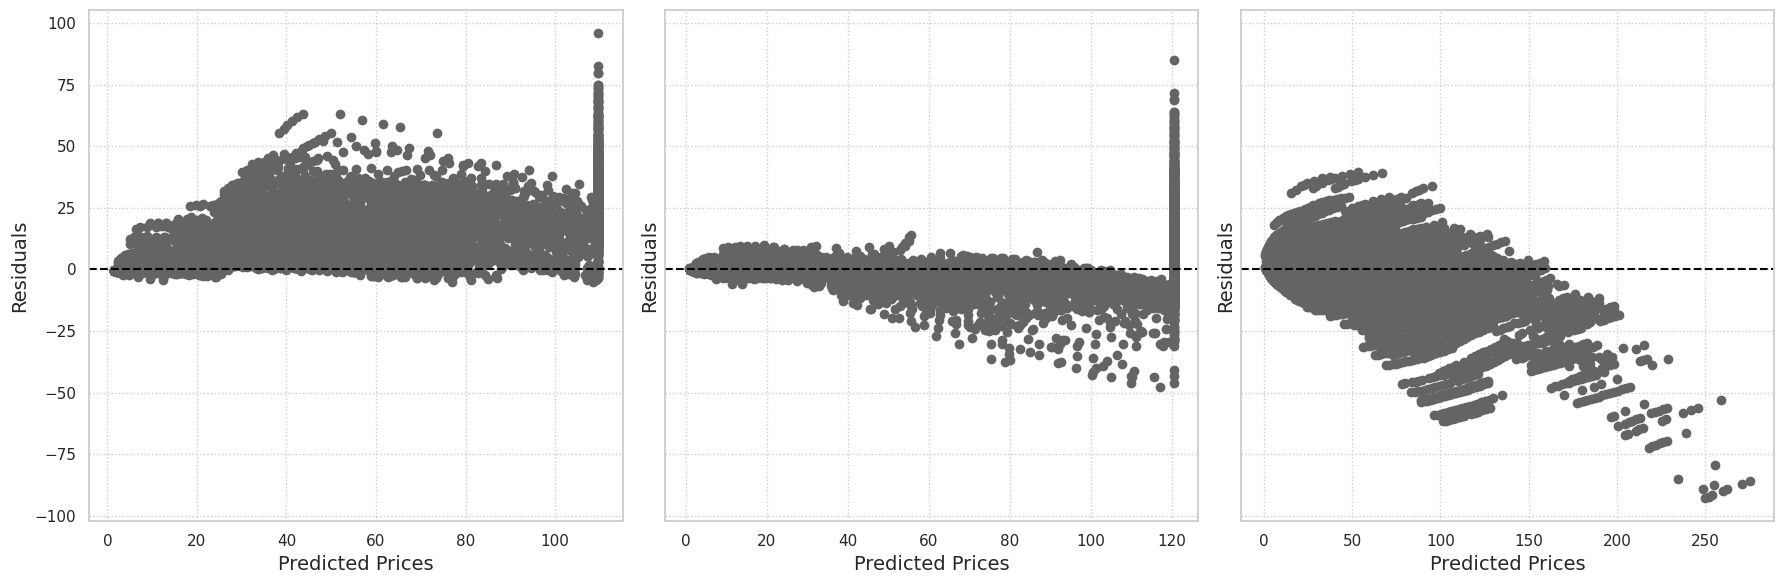

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals PER1
axes[0].scatter(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals PER2
axes[1].scatter(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals BSM
axes[2].scatter(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

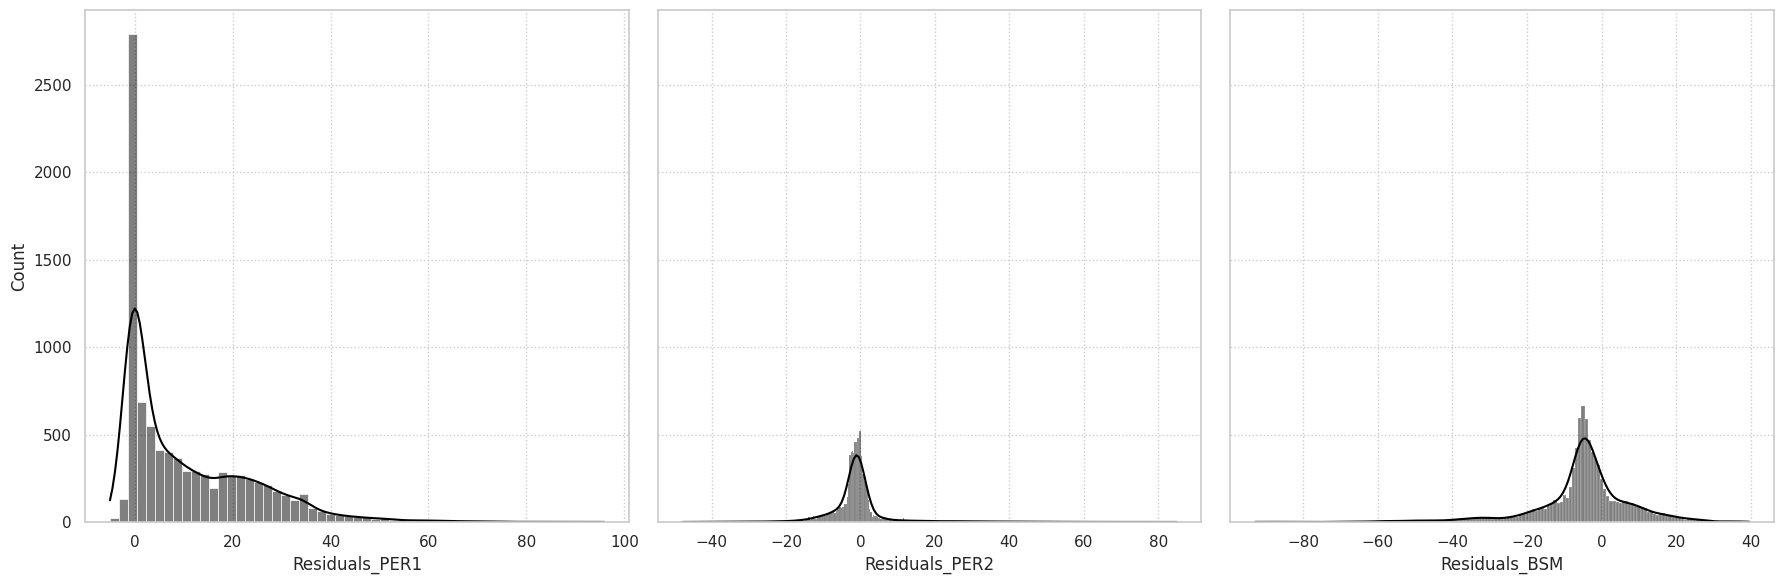

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation residuals
std_dev_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))

BSM  : Standard Deviation of Residuals  13.25
PER1 : Standard Deviation of Residuals  13.16
PER2 : Standard Deviation of Residuals  9.0


In [ ]:
# mean
mean_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -4.91
PER1 : Mean of Residuals  10.66
PER2 : Mean of Residuals  -0.78


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['BSM Prices'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER1 PRED'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER2 PRED'])

print('Actual vs Predicted')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Predicted
BSM  : Spearman  SignificanceResult(statistic=0.9684060815277636, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.981874948842668, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.9945087956234754, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Actual vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.012290896073717954, pvalue=0.2447850594501128)
PER1 : Spearman  SignificanceResult(statistic=0.8171283620576755, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.0765819313897418, pvalue=3.9439422082959816e-13)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Predicted vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Predicted vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.22264323149794477, pvalue=5.1850546694967425e-101)
PER1 : Spearman  SignificanceResult(statistic=0.7157966071005337, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.1456437964779734, pvalue=1.1709364287898986e-43)


### Analysis AE

####Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.18482187572832834, pvalue=1.1817326028723775e-69)
PER1 : Spearman  SignificanceResult(statistic=-0.8924758095153319, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.06925650973750992, pvalue=5.3269409312357205e-11)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.30461074220184775, pvalue=1.2117164642739611e-191)
PER1 : Spearman  SignificanceResult(statistic=-0.902901524452597, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.596388411116426, pvalue=0.0)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.5821035037720307, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.13482232721429163, pvalue=1.3246285754041361e-37)
PER2 : Spearman  SignificanceResult(statistic=-0.013102335084788716, pvalue=0.2150109546868595)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.16375475348247542, pvalue=7.139269155021811e-55)
PER1 : Spearman  SignificanceResult(statistic=-0.1391862014891353, pvalue=5.479628023189511e-40)
PER2 : Spearman  SignificanceResult(statistic=0.02637371474944098, pvalue=0.0125555928892365)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)


VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.13195891601045417, pvalue=4.402196524697594e-36)
PER1 : Spearman  SignificanceResult(statistic=0.8920043247854349, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.04884781803877538, pvalue=3.7433996862327057e-06)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.33187326612137247, pvalue=3.109377084896155e-229)
PER1 : Spearman  SignificanceResult(statistic=0.9007527430775061, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.58407188475464, pvalue=0.0)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.1542035420545426, pvalue=8.673376660716095e-49)
PER1 : Spearman  SignificanceResult(statistic=-0.8848762010998062, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.05993537866480141, pvalue=1.3733274279568188e-08)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.33261078006177, pvalue=2.6333364815641793e-230)
PER1 : Spearman  SignificanceResult(statistic=-0.8984330324932297, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.5797842151865715, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# Spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 Return vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# Spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 Return vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 Return vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.07766135033202042, pvalue=1.8381008753407584e-13)
PER1 : Spearman  SignificanceResult(statistic=-0.081052956013114, pvalue=1.5596591962156007e-14)
PER2 : Spearman  SignificanceResult(statistic=-0.14404174912412224, pvalue=9.88721613103063e-43)
--
S&P 500 Return vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.19646846413608213, pvalue=1.215846552262426e-78)
PER1 : Spearman  SignificanceResult(statistic=-0.0834534266552318, pvalue=2.556350223918714e-15)
PER2 : Spearman  SignificanceResult(statistic=-0.04632956739125605, pvalue=1.1522104208342274e-05)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.22232819527958278, pvalue=1.0049701012964015e-100)
PER1 : Spearman  SignificanceResult(statistic=-0.08085946667063362, pvalue=1.8003481955494983e-14)
PER2 : Spearman  SignificanceResult(statistic=-0.09275095662902147, pvalue=1.4200349696493168e-18)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.17645643987575696, pvalue=1.471560323709988e-63)
PER1 : Spearman  SignificanceResult(statistic=-0.08056743328660662, pvalue=2.23434085297062e-14)
PER2 : Spearman  SignificanceResult(statistic=0.1400080374928974, pvalue=1.910616622955193e-40)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.056519221387237785, pvalue=8.670321808606183e-08)
PER1 : Spearman  SignificanceResult(statistic=0.8747049224546816, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.038147028683319505, pvalue=0.0003049014074563742)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.38707078385697175, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.882926459797434, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.5730562574343606, pvalue=0.0)


## OTM Feb-Mar

In [ ]:
# filter
moneyness_filtered_PER1= results_df_moneyness_PER1[results_df_moneyness_PER1['period']== 'Feb-Mar OTM']
moneyness_filtered_PER2= results_df_moneyness_PER2[results_df_moneyness_PER2['period']== 'Feb-Mar OTM']

In [ ]:
# drop index
df_model_test_feb_mar_otm.reset_index(drop=True, inplace=True)
moneyness_filtered_PER1.reset_index(drop=True, inplace=True)
moneyness_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
moneyness_filtered_PER1

period  actual_prices  predicted_prices
0     Feb-Mar OTM       3.900001          4.894789
1     Feb-Mar OTM       3.250000          4.190909
2     Feb-Mar OTM       2.725000          3.544929
3     Feb-Mar OTM       2.275000          2.932373
4     Feb-Mar OTM       1.875000          2.388821
...           ...            ...               ...
6702  Feb-Mar OTM      59.099995         39.163567
6703  Feb-Mar OTM      57.050003         37.721409
6704  Feb-Mar OTM      52.900002         34.703857
6705  Feb-Mar OTM      50.849991         32.779610
6706  Feb-Mar OTM      48.849998         30.972736

[6707 rows x 3 columns]

In [ ]:
# add prediction
df_model_test_feb_mar_otm['PER1 PRED'] = moneyness_filtered_PER1['predicted_prices']
df_model_test_feb_mar_otm['PER2 PRED'] = moneyness_filtered_PER2['predicted_prices']

In [ ]:
# drop columns rename
df_model_test_feb_mar_otm.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_feb_mar_otm.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# datetime
df_model_test_feb_mar_otm['date'] = pd.to_datetime(df_model_test_feb_mar_otm['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm['Actual Prices'], df_model_test_feb_mar_otm['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm['Actual Prices'], df_model_test_feb_mar_otm['PER2 PRED']))
total_rmse_BSM = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm['Actual Prices'], df_model_test_feb_mar_otm['BSM Prices']))

print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM} ')

PER1: 20.529918199808982 
PER2: 5.916902471062179 
BSM: 20.844868807179324 


### Maturity

In [ ]:
# filter
df_model_test_feb_mar_otm_30 = df_model_test_feb_mar_otm[df_model_test_feb_mar_otm['maturity']*365 >15]

In [ ]:
df_model_test_feb_mar_otm_15 = df_model_test_feb_mar_otm[(df_model_test_feb_mar_otm['maturity']*365 <=15) & (df_model_test_feb_mar_otm['maturity']*365 >5)]

In [ ]:
df_model_test_feb_mar_otm_5 = df_model_test_feb_mar_otm[df_model_test_feb_mar_otm['maturity']*365 <=5]

In [ ]:
# check if same result
total_rmse_PER1_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_30['Actual Prices'], df_model_test_feb_mar_otm_30['PER1 PRED']))
total_rmse_PER1_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_15['Actual Prices'], df_model_test_feb_mar_otm_15['PER1 PRED']))
total_rmse_PER1_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_5['Actual Prices'], df_model_test_feb_mar_otm_5['PER1 PRED']))

total_rmse_PER2_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_30['Actual Prices'], df_model_test_feb_mar_otm_30['PER2 PRED']))
total_rmse_PER2_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_15['Actual Prices'], df_model_test_feb_mar_otm_15['PER2 PRED']))
total_rmse_PER2_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_5['Actual Prices'], df_model_test_feb_mar_otm_5['PER2 PRED']))

total_rmse_BSM_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_30['Actual Prices'], df_model_test_feb_mar_otm_30['BSM Prices']))
total_rmse_BSM_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_15['Actual Prices'], df_model_test_feb_mar_otm_15['BSM Prices']))
total_rmse_BSM_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_otm_5['Actual Prices'], df_model_test_feb_mar_otm_5['BSM Prices']))

print(f'30 Days PER1: {total_rmse_PER1_30.round(2)} PER2: {total_rmse_PER2_30.round(2)} BSM: {total_rmse_BSM_30.round(2)} ')
print(f'15 Days PER1: {total_rmse_PER1_15.round(2)} PER2: {total_rmse_PER2_15.round(2)} BSM: {total_rmse_BSM_15.round(2)} ')
print(f' 5 Days PER1: {total_rmse_PER1_5.round(2)}  PER2: {total_rmse_PER2_5.round(2)}  BSM: {total_rmse_BSM_5.round(2)} ')

30 Days PER1: 20.18 PER2: 4.56 BSM: 26.29 
15 Days PER1: 22.65 PER2: 5.96 BSM: 13.61 
 5 Days PER1: 15.55  PER2: 9.43  BSM: 8.99 


### Analysis Residuals

In [ ]:
import numpy as np
import pandas as pd
# copy
df_model_test_feb_mar_residuals = df_model_test_feb_mar_otm.copy()

# residuals
df_model_test_feb_mar_residuals['Residuals_BSM'] = df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['BSM Prices']
df_model_test_feb_mar_residuals['Residuals_PER1'] = df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['PER1 PRED']
df_model_test_feb_mar_residuals['Residuals_PER2'] = df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['PER2 PRED']

# absolute error
df_model_test_feb_mar_residuals['AE_BSM'] = np.abs(df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['BSM Prices'])
df_model_test_feb_mar_residuals['AE_PER1'] = np.abs(df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['PER1 PRED'])
df_model_test_feb_mar_residuals['AE_PER2'] = np.abs(df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['PER2 PRED'])

# absolute percentage error
df_model_test_feb_mar_residuals['APE_BSM'] = np.abs((df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['BSM Prices']) / df_model_test_feb_mar_otm['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER1'] = np.abs((df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['PER1 PRED']) / df_model_test_feb_mar_otm['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER2'] = np.abs((df_model_test_feb_mar_otm['Actual Prices'] - df_model_test_feb_mar_otm['PER2 PRED']) / df_model_test_feb_mar_otm['Actual Prices']) * 100


In [ ]:
df_model_test_feb_mar_residuals

date  strike_price  best_bid  best_offer  impl_volatility  \
0    2020-02-03        3350.0      3.80        4.00         0.112363   
1    2020-02-03        3355.0      3.10        3.40         0.110857   
2    2020-02-03        3360.0      2.65        2.80         0.109767   
3    2020-02-03        3365.0      2.20        2.35         0.108763   
4    2020-02-03        3370.0      1.80        1.95         0.107642   
...         ...           ...       ...         ...              ...   
6702 2020-03-31        2720.0     58.20       60.00         0.374918   
6703 2020-03-31        2725.0     56.20       57.90         0.372827   
6704 2020-03-31        2735.0     52.10       53.70         0.368015   
6705 2020-03-31        2740.0     50.00       51.70         0.365471   
6706 2020-03-31        2745.0     48.00       49.70         0.362959   

      Actual Prices  maturity    vix  interest rate  S&P 500  ...  PER2 PRED  \
0             3.900  0.049315  17.97       0.001164  3248.92  ...   5.109108   
1             3.250  0.049315  17.97       0.001164  3248.92  ...   4.239734   
2             2.725  0.049315  17.97       0.001164  3248.92  ...   3.565085   
3             2.275  0.049315  17.97       0.001164  3248.92  ...   2.940345   
4             1.875  0.049315  17.97       0.001164  3248.92  ...   2.432569   
...             ...       ...    ...            ...      ...  ...        ...   
6702         59.100  0.082192  53.54       0.001268  2584.59  ...  54.349892   
6703         57.050  0.082192  53.54       0.001268  2584.59  ...  51.775894   
6704         52.900  0.082192  53.54       0.001268  2584.59  ...  47.555519   
6705         50.850  0.082192  53.54       0.001268  2584.59  ...  46.103470   
6706         48.850  0.082192  53.54       0.001268  2584.59  ...  44.600929   

      Residuals_BSM  Residuals_PER1  Residuals_PER2     AE_BSM    AE_PER1  \
0         -9.977550       -0.994789       -1.209108   9.977550   0.994789   
1         -9.664125       -0.940909       -0.989734   9.664125   0.940909   
2         -9.280038       -0.819929       -0.840085   9.280038   0.819929   
3         -8.873255       -0.657373       -0.665345   8.873255   0.657373   
4         -8.466737       -0.513821       -0.557569   8.466737   0.513821   
...             ...             ...             ...        ...        ...   
6702     -29.958934       19.936433        4.750108  29.958934  19.936433   
6703     -30.364514       19.328591        5.274106  30.364514  19.328591   
6704     -31.296923       18.196143        5.344481  31.296923  18.196143   
6705     -31.773377       18.070390        4.746530  31.773377  18.070390   
6706     -32.223077       17.877264        4.249071  32.223077  17.877264   

       AE_PER2     APE_BSM   APE_PER1   APE_PER2  
0     1.209108  255.834604  25.507416  31.002781  
1     0.989734  297.357679  28.951058  30.453359  
2     0.840085  340.551858  30.089121  30.828822  
3     0.665345  390.033188  28.895529  29.245915  
4     0.557569  451.559328  27.403793  29.737015  
...        ...         ...        ...        ...  
6702  4.750108   50.691936  33.733390   8.037408  
6703  5.274106   53.224390  33.880090   9.244708  
6704  5.344481   59.162425  34.397245  10.102988  
6705  4.746530   62.484516  35.536657   9.334376  
6706  4.249071   65.963309  36.596241   8.698200  

[6707 rows x 25 columns]

In [ ]:
# correlation
df_model_test_feb_mar_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  impl_volatility  Actual Prices  maturity  \
strike_price         1.000000        -0.945408      -0.809037  0.287313   
impl_volatility     -0.945408         1.000000       0.715142 -0.466519   
Actual Prices       -0.809037         0.715142       1.000000  0.163658   
maturity             0.287313        -0.466519       0.163658  1.000000   
vix                 -0.960814         0.947885       0.789176 -0.295930   
interest rate       -0.649472         0.591673       0.508247 -0.248106   
S&P 500              0.992751        -0.938775      -0.785426  0.284007   
S&P 500 Return       0.116451        -0.177828      -0.203367  0.022736   
moneyness            0.057844        -0.086015       0.078482  0.043196   
Vola_ATM            -0.927148         0.931283       0.784472 -0.288335   
BSM Prices          -0.585674         0.451888       0.911066  0.419117   
PER1 PRED           -0.654996         0.536034       0.960549  0.338343   
PER2 PRED           -0.746035         0.631711       0.986954  0.242387   
Residuals_BSM       -0.123630         0.253276      -0.254760 -0.659170   
Residuals_PER1      -0.906494         0.856092       0.917047 -0.107554   
Residuals_PER2      -0.307749         0.391038       0.138588 -0.399574   
AE_BSM              -0.074515        -0.032008       0.368409  0.525966   
AE_PER1             -0.906623         0.852359       0.924903 -0.095039   
AE_PER2             -0.694137         0.709648       0.587210 -0.187856   
APE_BSM              0.722573        -0.726876      -0.644146  0.336873   
APE_PER1            -0.751628         0.792837       0.448408 -0.551955   
APE_PER2             0.048539         0.059203      -0.356664 -0.300616   

                      vix  interest rate   S&P 500  S&P 500 Return  moneyness  \
strike_price    -0.960814      -0.649472  0.992751        0.116451   0.057844   
impl_volatility  0.947885       0.591673 -0.938775       -0.177828  -0.086015   
Actual Prices    0.789176       0.508247 -0.785426       -0.203367   0.078482   
maturity        -0.295930      -0.248106  0.284007        0.022736   0.043196   
vix              1.000000       0.652594 -0.963846       -0.114188  -0.152773   
interest rate    0.652594       1.000000 -0.647429        0.089636  -0.151476   
S&P 500         -0.963846      -0.647429  1.000000        0.109476   0.154061   
S&P 500 Return  -0.114188       0.089636  0.109476        1.000000   0.042761   
moneyness       -0.152773      -0.151476  0.154061        0.042761   1.000000   
Vola_ATM         0.959369       0.591663 -0.928482       -0.234688  -0.152667   
BSM Prices       0.591507       0.362942 -0.571289       -0.229593   0.015548   
PER1 PRED        0.627629       0.406798 -0.624126       -0.250620   0.150516   
PER2 PRED        0.721252       0.473333 -0.720111       -0.191802   0.116000   
Residuals_BSM    0.067515       0.029935 -0.111280        0.137181   0.151698   
Residuals_PER1   0.901606       0.615356 -0.897831       -0.102907  -0.059490   
Residuals_PER2   0.315435       0.298539 -0.310304       -0.098820  -0.197169   
AE_BSM           0.094299       0.056421 -0.084130       -0.178597  -0.137102   
AE_PER1          0.900021       0.608121 -0.895750       -0.104704  -0.027027   
AE_PER2          0.699760       0.434242 -0.690682       -0.110527  -0.082419   
APE_BSM         -0.687863      -0.499887  0.696081        0.046904  -0.113314   
APE_PER1         0.758052       0.593186 -0.761973        0.112960  -0.181654   
APE_PER2        -0.021505      -0.112960  0.028364        0.065084  -0.115797   

                 Vola_ATM  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price    -0.927148  ...  -0.746035      -0.123630       -0.906494   
impl_volatility  0.931283  ...   0.631711       0.253276        0.856092   
Actual Prices    0.784472  ...   0.986954      -0.254760        0.917047   
maturity        -0.288335  ...   0.242387      -0.659170       -0.107554   
vix              0.959369  ...   0.721252      

In [ ]:
plot_text_size = 14

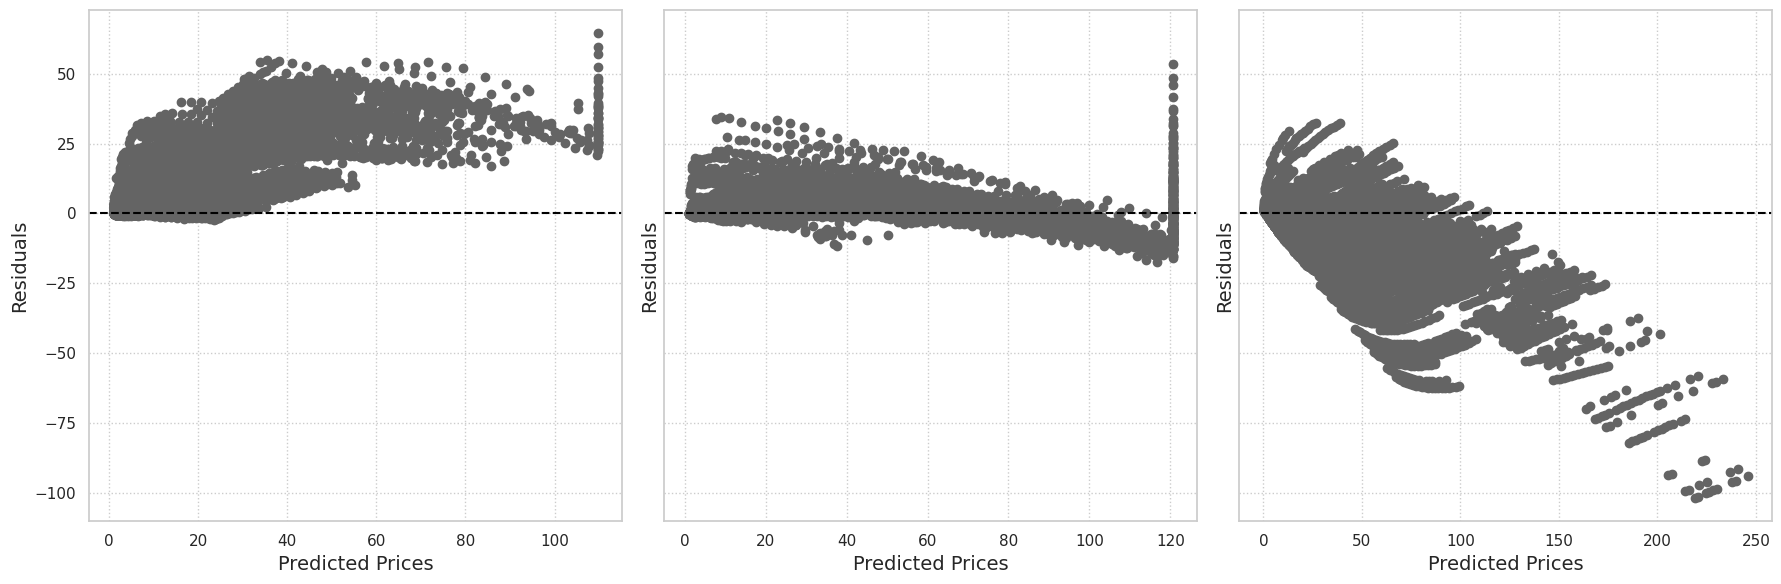

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals PER1
axes[0].scatter(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals PER2
axes[1].scatter(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals BSM
axes[2].scatter(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

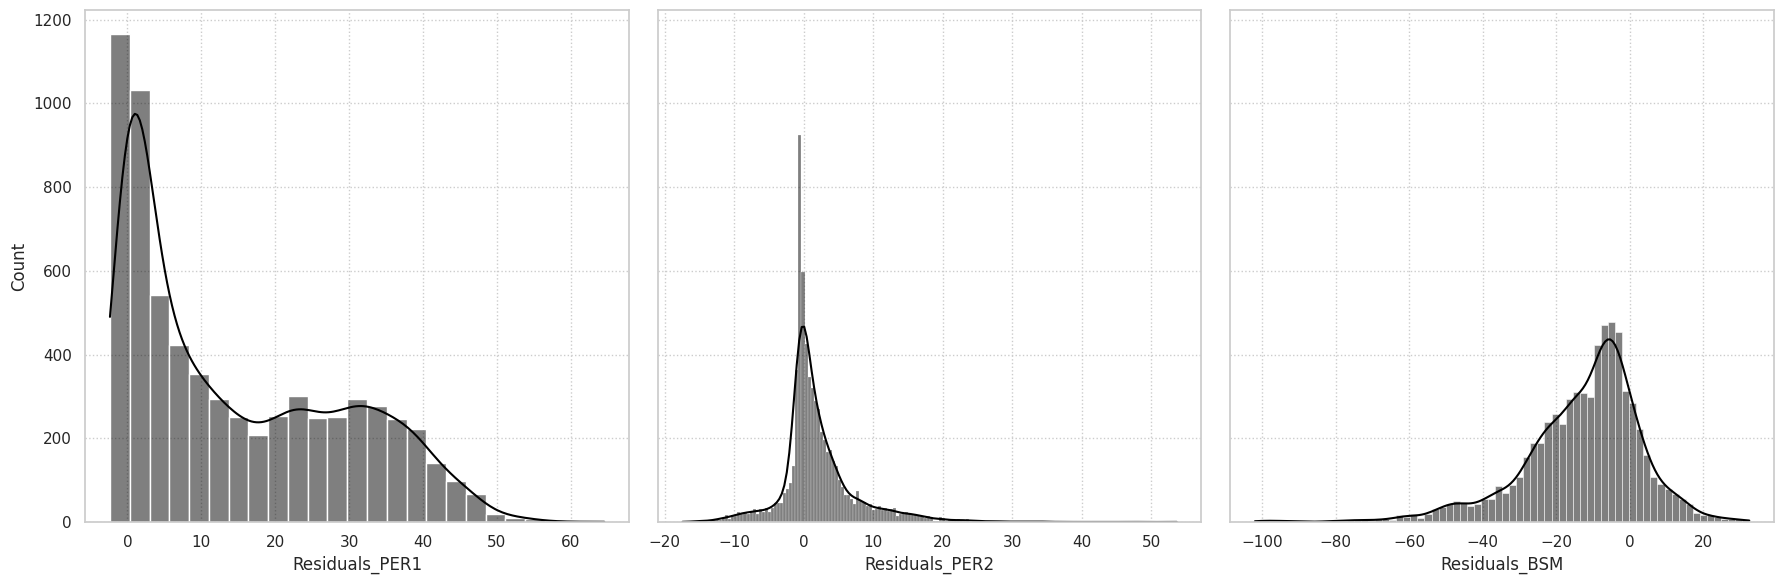

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuas
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation
std_dev_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))

BSM  : Standard Deviation of Residuals  16.39
PER1 : Standard Deviation of Residuals  14.39
PER2 : Standard Deviation of Residuals  5.58


In [ ]:
# mean
mean_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -12.88
PER1 : Mean of Residuals  14.65
PER2 : Mean of Residuals  1.98


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['BSM Prices'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER1 PRED'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER2 PRED'])

print('Actual vs Predicted')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Predicted
BSM  : Spearman  SignificanceResult(statistic=0.9110657248292912, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.9605492228089738, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.9869536799029214, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Actual vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.25476020644092817, pvalue=7.568316116316718e-100)
PER1 : Spearman  SignificanceResult(statistic=0.9170469462081603, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.13858833323580533, pvalue=4.0480866448946615e-30)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Predicted vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Predicted vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.5963591826978677, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.7841505191506591, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.04487133977578939, pvalue=0.00023695468216534344)


### Analysis AE

#### Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.12363027184465271, pvalue=2.9307323511646816e-24)
PER1 : Spearman  SignificanceResult(statistic=-0.9064936225229306, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.3077489349940042, pvalue=4.282590921487263e-147)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.0745147809497461, pvalue=9.97306634712298e-10)
PER1 : Spearman  SignificanceResult(statistic=-0.906622812067236, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.6941365294718795, pvalue=0.0)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.6591696567228902, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.10755409939955334, pvalue=1.0257419612776051e-18)
PER2 : Spearman  SignificanceResult(statistic=-0.39957432018484657, pvalue=1.3271636384995667e-255)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.5259658144562632, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.09503936924012142, pvalue=6.211409261180413e-15)
PER2 : Spearman  SignificanceResult(statistic=-0.18785560639399287, pvalue=2.5337470272203353e-54)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.06751510884788582, pvalue=3.120802804593203e-08)
PER1 : Spearman  SignificanceResult(statistic=0.9016062294573576, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.3154345671799793, pvalue=7.898860257031653e-155)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.0942992683875367, pvalue=1.0054274819354782e-14)
PER1 : Spearman  SignificanceResult(statistic=0.9000212509688539, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.6997597006056187, pvalue=0.0)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.11127962786239676, pvalue=6.240182765183633e-20)
PER1 : Spearman  SignificanceResult(statistic=-0.897830988141455, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.31030359695080306, pvalue=1.2205414084614552e-149)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.08412980702218459, pvalue=5.168504278637419e-12)
PER1 : Spearman  SignificanceResult(statistic=-0.8957495251942389, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.6906818173948558, pvalue=0.0)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.15169816523764776, pvalue=8.094355950712932e-36)
PER1 : Spearman  SignificanceResult(statistic=-0.05949044551490289, pvalue=1.085573612172953e-06)
PER2 : Spearman  SignificanceResult(statistic=-0.19716879466808074, pvalue=9.141529672442569e-60)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.1371015097273488, pvalue=1.6604644451435724e-29)
PER1 : Spearman  SignificanceResult(statistic=-0.02702676931675366, pvalue=0.026871218234512335)
PER2 : Spearman  SignificanceResult(statistic=-0.08241891609664777, pvalue=1.3794677538007363e-11)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.03128224878492805, pvalue=0.010405659254986939)
PER1 : Spearman  SignificanceResult(statistic=0.8679879571669054, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.30205449938563456, pvalue=1.6363751315020407e-141)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.19790207421863157, pvalue=3.3151309905416224e-60)
PER1 : Spearman  SignificanceResult(statistic=0.867789106067046, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.6830126986326658, pvalue=0.0)


## DOTM Feb-Mar

In [ ]:
# filter
moneyness_filtered_PER1= results_df_moneyness_PER1[results_df_moneyness_PER1['period']== 'Feb-Mar DOTM']
moneyness_filtered_PER2= results_df_moneyness_PER2[results_df_moneyness_PER2['period']== 'Feb-Mar DOTM']

In [ ]:
# drop
df_model_test_feb_mar_dotm.reset_index(drop=True, inplace=True)
moneyness_filtered_PER1.reset_index(drop=True, inplace=True)
moneyness_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
moneyness_filtered_PER1

period  actual_prices  predicted_prices
0      Feb-Mar DOTM          1.825          2.015828
1      Feb-Mar DOTM          1.600          1.767633
2      Feb-Mar DOTM          1.425          1.554555
3      Feb-Mar DOTM          1.250          1.360917
4      Feb-Mar DOTM          1.100          1.156599
...             ...            ...               ...
17464  Feb-Mar DOTM          1.250          1.033515
17465  Feb-Mar DOTM          1.200          1.033515
17466  Feb-Mar DOTM          1.150          1.033515
17467  Feb-Mar DOTM          1.150          1.033515
17468  Feb-Mar DOTM          1.050          1.033515

[17469 rows x 3 columns]

In [ ]:
# add predictions
df_model_test_feb_mar_dotm['PER1 PRED'] = moneyness_filtered_PER1['predicted_prices']
df_model_test_feb_mar_dotm['PER2 PRED'] = moneyness_filtered_PER2['predicted_prices']

In [ ]:
# rename drop columns
df_model_test_feb_mar_dotm.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_feb_mar_dotm.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# dattime
df_model_test_feb_mar_dotm['date'] = pd.to_datetime(df_model_test_feb_mar_dotm['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm['Actual Prices'], df_model_test_feb_mar_dotm['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm['Actual Prices'], df_model_test_feb_mar_dotm['PER2 PRED']))
total_rmse_BSM = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm['Actual Prices'], df_model_test_feb_mar_dotm['BSM Prices']))

print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM} ')

PER1: 11.860433252755824 
PER2: 5.273527624372959 
BSM: 29.008589179875884 


### Maturity

In [ ]:
# filter
df_model_test_feb_mar_dotm_30 = df_model_test_feb_mar_dotm[df_model_test_feb_mar_dotm['maturity']*365 >15]

In [ ]:
df_model_test_feb_mar_dotm_15 = df_model_test_feb_mar_dotm[(df_model_test_feb_mar_dotm['maturity']*365 <=15) & (df_model_test_feb_mar_dotm['maturity']*365 >5)]

In [ ]:
df_model_test_feb_mar_dotm_5 = df_model_test_feb_mar_dotm[df_model_test_feb_mar_dotm['maturity']*365 <=5]

In [ ]:
# check if same result
total_rmse_PER1_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_30['Actual Prices'], df_model_test_feb_mar_dotm_30['PER1 PRED']))
total_rmse_PER1_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_15['Actual Prices'], df_model_test_feb_mar_dotm_15['PER1 PRED']))
total_rmse_PER1_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_5['Actual Prices'], df_model_test_feb_mar_dotm_5['PER1 PRED']))

total_rmse_PER2_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_30['Actual Prices'], df_model_test_feb_mar_dotm_30['PER2 PRED']))
total_rmse_PER2_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_15['Actual Prices'], df_model_test_feb_mar_dotm_15['PER2 PRED']))
total_rmse_PER2_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_5['Actual Prices'], df_model_test_feb_mar_dotm_5['PER2 PRED']))


total_rmse_BSM_30 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_30['Actual Prices'], df_model_test_feb_mar_dotm_30['BSM Prices']))
total_rmse_BSM_15 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_15['Actual Prices'], df_model_test_feb_mar_dotm_15['BSM Prices']))
total_rmse_BSM_5 = np.sqrt(mean_squared_error(df_model_test_feb_mar_dotm_5['Actual Prices'], df_model_test_feb_mar_dotm_5['BSM Prices']))


print(f'30 Days PER1: {total_rmse_PER1_30.round(2)} PER2: {total_rmse_PER2_30.round(2)} BSM: {total_rmse_BSM_30.round(2)} ')
print(f'15 Days PER1: {total_rmse_PER1_15.round(2)} PER2: {total_rmse_PER2_15.round(2)} BSM: {total_rmse_BSM_15.round(2)} ')
print(f' 5 Days PER1: {total_rmse_PER1_5.round(2)}  PER2: {total_rmse_PER2_5.round(2)}  BSM: {total_rmse_BSM_5.round(2)} ')

30 Days PER1: 12.88 PER2: 3.26 BSM: 35.67 
15 Days PER1: 10.72 PER2: 6.76 BSM: 17.69 
 5 Days PER1: 8.36  PER2: 8.62  BSM: 4.99 


### Analysis Residuals

In [ ]:
import numpy as np
import pandas as pd

df_model_test_feb_mar_residuals = df_model_test_feb_mar_dotm.copy()


# residuals
df_model_test_feb_mar_residuals['Residuals_BSM'] = df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['BSM Prices']
df_model_test_feb_mar_residuals['Residuals_PER1'] = df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['PER1 PRED']
df_model_test_feb_mar_residuals['Residuals_PER2'] = df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['PER2 PRED']

# AE
df_model_test_feb_mar_residuals['AE_BSM'] = np.abs(df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['BSM Prices'])
df_model_test_feb_mar_residuals['AE_PER1'] = np.abs(df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['PER1 PRED'])
df_model_test_feb_mar_residuals['AE_PER2'] = np.abs(df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['PER2 PRED'])

# APE
df_model_test_feb_mar_residuals['APE_BSM'] = np.abs((df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['BSM Prices']) / df_model_test_feb_mar_dotm['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER1'] = np.abs((df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['PER1 PRED']) / df_model_test_feb_mar_dotm['Actual Prices']) * 100
df_model_test_feb_mar_residuals['APE_PER2'] = np.abs((df_model_test_feb_mar_dotm['Actual Prices'] - df_model_test_feb_mar_dotm['PER2 PRED']) / df_model_test_feb_mar_dotm['Actual Prices']) * 100


In [ ]:
df_model_test_feb_mar_residuals

date  strike_price  best_bid  best_offer  impl_volatility  \
0     2020-02-24        3435.0      1.70        1.95         0.138828   
1     2020-02-24        3440.0      1.50        1.70         0.138089   
2     2020-02-24        3445.0      1.30        1.55         0.137803   
3     2020-02-24        3450.0      1.15        1.35         0.137214   
4     2020-02-24        3455.0      1.00        1.20         0.136760   
...          ...           ...       ...         ...              ...   
17464 2020-03-31        3145.0      1.10        1.40         0.310516   
17465 2020-03-31        3150.0      1.05        1.35         0.310909   
17466 2020-03-31        3160.0      1.00        1.30         0.313338   
17467 2020-03-31        3170.0      0.90        1.40         0.317542   
17468 2020-03-31        3175.0      0.90        1.20         0.315783   

       Actual Prices  maturity    vix  interest rate  S&P 500  ...  PER2 PRED  \
0              1.825  0.068493  25.03       0.001164  3225.89  ...   2.320516   
1              1.600  0.068493  25.03       0.001164  3225.89  ...   2.153441   
2              1.425  0.068493  25.03       0.001164  3225.89  ...   1.918209   
3              1.250  0.068493  25.03       0.001164  3225.89  ...   1.704813   
4              1.100  0.068493  25.03       0.001164  3225.89  ...   1.521677   
...              ...       ...    ...            ...      ...  ...        ...   
17464          1.250  0.082192  53.54       0.001268  2584.59  ...   0.943900   
17465          1.200  0.082192  53.54       0.001268  2584.59  ...   0.922094   
17466          1.150  0.082192  53.54       0.001268  2584.59  ...   0.889374   
17467          1.150  0.082192  53.54       0.001268  2584.59  ...   0.869356   
17468          1.050  0.082192  53.54       0.001268  2584.59  ...   0.846737   

       Residuals_BSM  Residuals_PER1  Residuals_PER2     AE_BSM   AE_PER1  \
0         -12.797760       -0.190828       -0.495516  12.797760  0.190828   
1         -12.346343       -0.167633       -0.553441  12.346343  0.167633   
2         -11.871262       -0.129555       -0.493209  11.871262  0.129555   
3         -11.421763       -0.110917       -0.454813  11.421763  0.110917   
4         -10.972099       -0.056599       -0.421677  10.972099  0.056599   
...              ...             ...             ...        ...       ...   
17464     -12.871806        0.216485        0.306100  12.871806  0.216485   
17465     -12.579352        0.166485        0.277906  12.579352  0.166485   
17466     -11.966743        0.116485        0.260626  11.966743  0.116485   
17467     -11.332951        0.116485        0.280644  11.332951  0.116485   
17468     -11.126525        0.016485        0.203263  11.126525  0.016485   

        AE_PER2      APE_BSM   APE_PER1   APE_PER2  
0      0.495516   701.247108  10.456310  27.151581  
1      0.553441   771.646418  10.477090  34.590074  
2      0.493209   833.071034   9.091583  34.611146  
3      0.454813   913.741063   8.873339  36.385078  
4      0.421677   997.463505   5.145368  38.334274  
...         ...          ...        ...        ...  
17464  0.306100  1029.744440  17.318764  24.488006  
17465  0.277906  1048.279343  13.873712  23.158864  
17466  0.260626  1040.586382  10.129091  22.663155  
17467  0.280644   985.474019  10.129091  24.403849  
17468  0.203263  1059.669086   1.569957  19.358356  

[17469 rows x 25 columns]

In [ ]:
# spearman correlaiton
df_model_test_feb_mar_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  impl_volatility  Actual Prices  maturity  \
strike_price         1.000000        -0.824219      -0.644286  0.316604   
impl_volatility     -0.824219         1.000000       0.333655 -0.498622   
Actual Prices       -0.644286         0.333655       1.000000  0.134545   
maturity             0.316604        -0.498622       0.134545  1.000000   
vix                 -0.637637         0.749558       0.271877 -0.119140   
interest rate       -0.263951         0.152016       0.077948 -0.055930   
S&P 500              0.762225        -0.789239      -0.236330  0.113875   
S&P 500 Return       0.117353        -0.188960      -0.076777  0.007371   
moneyness           -0.089960        -0.161518       0.474221 -0.189328   
Vola_ATM            -0.616201         0.740698       0.274908 -0.118118   
BSM Prices          -0.269344        -0.014518       0.731474  0.540864   
PER1 PRED           -0.411393         0.129363       0.859181  0.166897   
PER2 PRED           -0.364508        -0.028498       0.899128  0.322635   
Residuals_BSM       -0.051878         0.248414      -0.382149 -0.668134   
Residuals_PER1      -0.744144         0.458998       0.965805  0.062022   
Residuals_PER2      -0.685287         0.742224       0.449745 -0.339564   
AE_BSM               0.009114        -0.215113       0.422143  0.651896   
AE_PER1             -0.744911         0.460136       0.966087  0.061168   
AE_PER2             -0.760366         0.752095       0.633344 -0.232823   
APE_BSM              0.668296        -0.581672      -0.580283  0.442841   
APE_PER1            -0.496525         0.402979       0.331382 -0.181114   
APE_PER2            -0.235017         0.600629      -0.337458 -0.462892   

                      vix  interest rate   S&P 500  S&P 500 Return  moneyness  \
strike_price    -0.637637      -0.263951  0.762225        0.117353  -0.089960   
impl_volatility  0.749558       0.152016 -0.789239       -0.188960  -0.161518   
Actual Prices    0.271877       0.077948 -0.236330       -0.076777   0.474221   
maturity        -0.119140      -0.055930  0.113875        0.007371  -0.189328   
vix              1.000000       0.161372 -0.770043       -0.316309  -0.411924   
interest rate    0.161372       1.000000 -0.218649        0.079073  -0.140130   
S&P 500         -0.770043      -0.218649  1.000000        0.225507   0.480963   
S&P 500 Return  -0.316309       0.079073  0.225507        1.000000   0.126082   
moneyness       -0.411924      -0.140130  0.480963        0.126082   1.000000   
Vola_ATM         0.920735       0.169921 -0.729820       -0.380703  -0.404730   
BSM Prices       0.296384       0.006288 -0.080504       -0.256935   0.222939   
PER1 PRED        0.026844      -0.045198  0.030596       -0.096102   0.649415   
PER2 PRED       -0.003769       0.015002  0.075237       -0.018313   0.601059   
Residuals_BSM   -0.215360       0.027688 -0.055564        0.291817   0.027541   
Residuals_PER1   0.406239       0.161468 -0.377054       -0.063121   0.338161   
Residuals_PER2   0.618456       0.124713 -0.599825       -0.123850  -0.113661   
AE_BSM           0.224996      -0.026203  0.026637       -0.290947  -0.001880   
AE_PER1          0.406720       0.160666 -0.377769       -0.063429   0.338293   
AE_PER2          0.633994       0.101971 -0.615747       -0.146159  -0.007219   
APE_BSM         -0.122806      -0.091720  0.294316       -0.144911  -0.444021   
APE_PER1         0.431105       0.207843 -0.469439        0.038562  -0.249289   
APE_PER2         0.494016       0.059440 -0.551641       -0.114575  -0.573103   

                 Vola_ATM  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price    -0.616201  ...  -0.364508      -0.051878       -0.744144   
impl_volatility  0.740698  ...  -0.028498       0.248414        0.458998   
Actual Prices    0.274908  ...   0.899128      -0.382149        0.965805   
maturity        -0.118118  ...   0.322635      -0.668134        0.062022   
vix              0.920735  ...  -0.003769      

In [ ]:
plot_text_size = 14

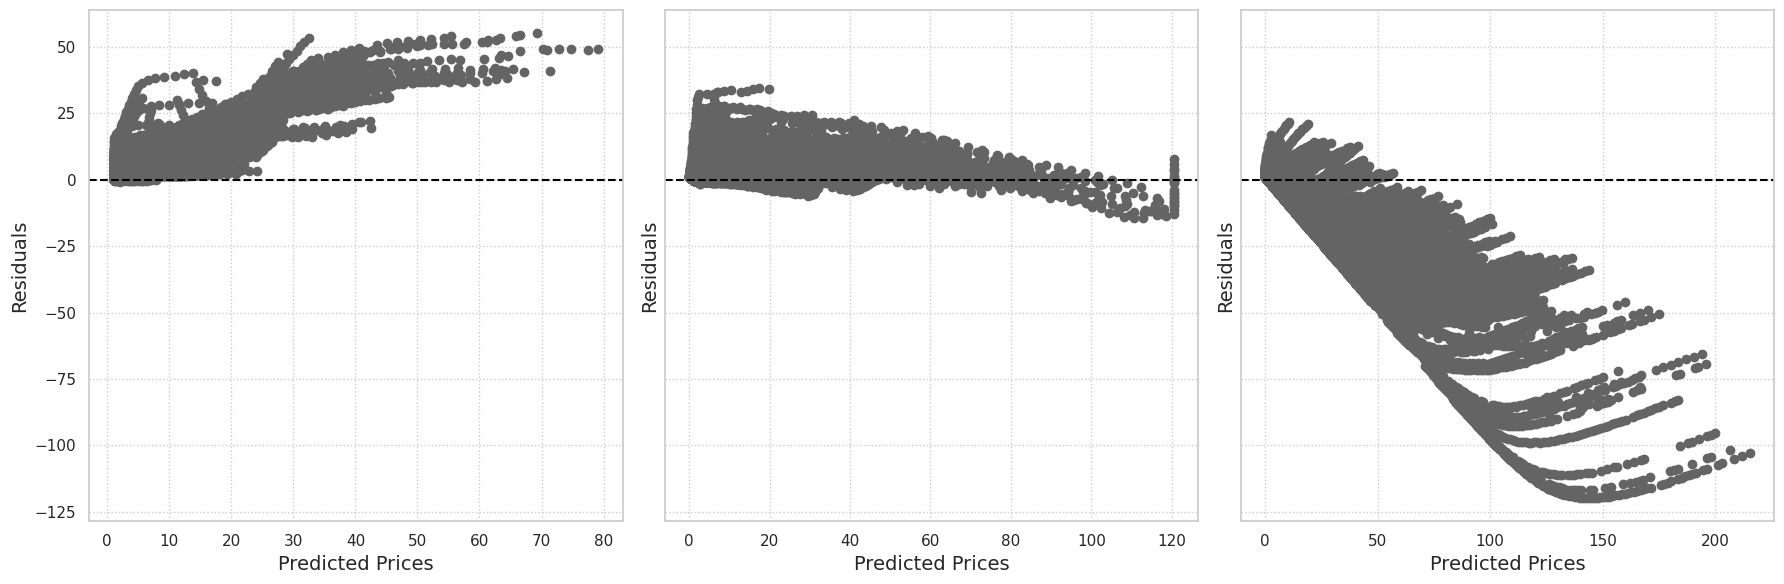

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals PER1
axes[0].scatter(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals PER2
axes[1].scatter(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals BSM
axes[2].scatter(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

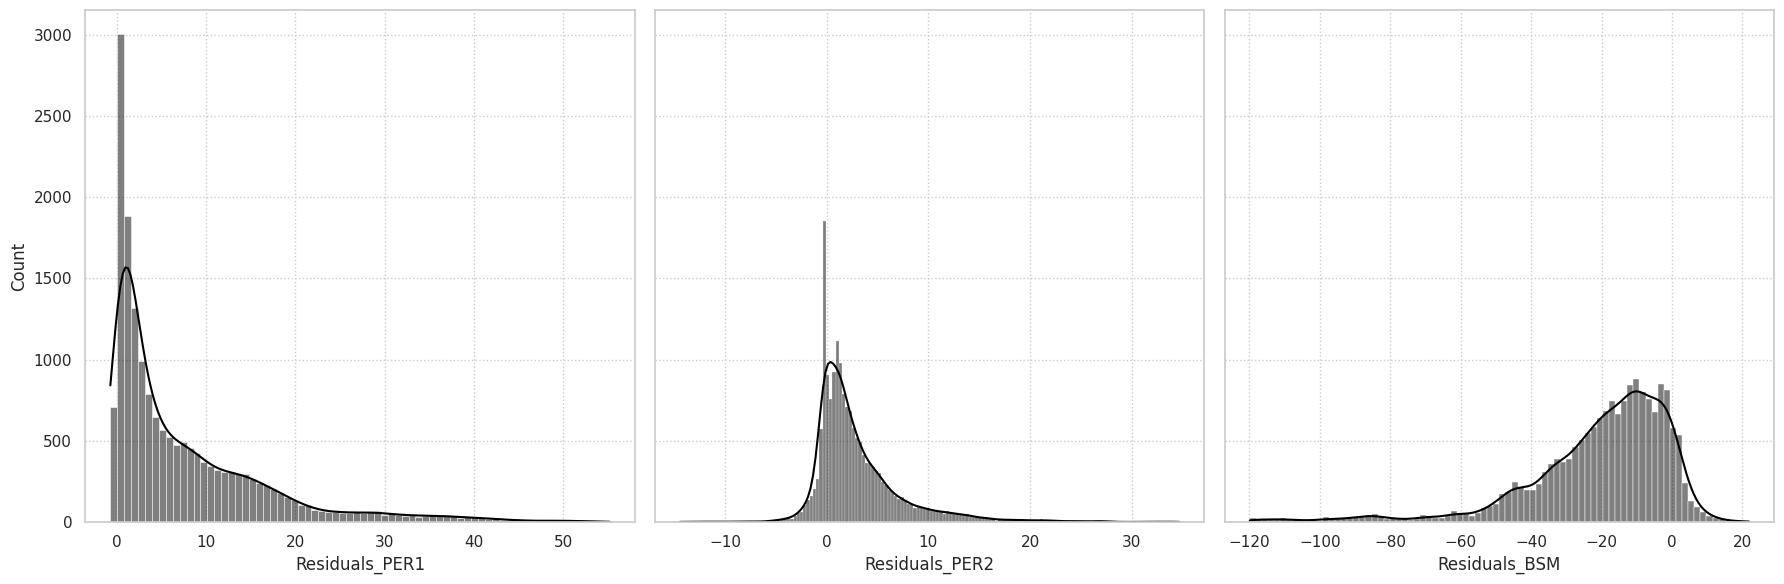

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_feb_mar_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation
std_dev_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))


BSM  : Standard Deviation of Residuals  20.54
PER1 : Standard Deviation of Residuals  9.1
PER2 : Standard Deviation of Residuals  4.37


In [ ]:
# mean
mean_bsm = df_model_test_feb_mar_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_feb_mar_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_feb_mar_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -20.49
PER1 : Mean of Residuals  7.61
PER2 : Mean of Residuals  2.95


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['BSM Prices'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER1 PRED'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['PER2 PRED'])

print('Actual vs Predicted')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Predicted
BSM  : Spearman  SignificanceResult(statistic=0.7314742475616239, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.8591810430520967, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.8991282574414254, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Actual Prices'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Actual vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Actual vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.3821490500942328, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.965805437178488, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.4497447885713187, pvalue=0.0)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['BSM Prices'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['PER1 PRED'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['PER2 PRED'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Predicted vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Predicted vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.8691740521555257, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.7469519511342536, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.14272209889237525, pvalue=3.6927388295300935e-80)


### Analysis AE

#### Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['strike_price'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.05187784790239738, pvalue=6.8455748677322965e-12)
PER1 : Spearman  SignificanceResult(statistic=-0.7441438520709353, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.6852871697922828, pvalue=0.0)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=0.009113756800986934, pvalue=0.22839360333908745)
PER1 : Spearman  SignificanceResult(statistic=-0.744911170948444, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.7603657137755646, pvalue=0.0)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['maturity'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.6681337744557004, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.06202175490395452, pvalue=2.3107248365853816e-16)
PER2 : Spearman  SignificanceResult(statistic=-0.3395642505223211, pvalue=0.0)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.6518955089641217, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.061168307174886256, pvalue=5.88691579092054e-16)
PER2 : Spearman  SignificanceResult(statistic=-0.2328225684635479, pvalue=1.0744326291968558e-213)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['vix'], df_model_test_feb_mar_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.21536019490040162, pvalue=2.0975973920054366e-182)
PER1 : Spearman  SignificanceResult(statistic=0.406238561162544, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.6184564274390808, pvalue=0.0)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.22499586713904177, pvalue=2.4466099779136737e-199)
PER1 : Spearman  SignificanceResult(statistic=0.406719976005984, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.6339935534791002, pvalue=0.0)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 Return vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500 Return'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 Return vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 Return vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.2918166494647545, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.0631205799610448, pvalue=6.803275828370928e-17)
PER2 : Spearman  SignificanceResult(statistic=-0.12385033908786505, pvalue=1.1387361102912711e-60)
--
S&P 500 Return vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.29094684566876194, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.06342880531142314, pvalue=4.809712925595008e-17)
PER2 : Spearman  SignificanceResult(statistic=-0.14615902653381355, pvalue=5.140131566210631e-84)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')


spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['S&P 500'], df_model_test_feb_mar_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.055563775039708906, pvalue=1.9964267586392767e-13)
PER1 : Spearman  SignificanceResult(statistic=-0.3770536123180928, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.5998245721247025, pvalue=0.0)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=0.026637096212605016, pvalue=0.00042991133302270235)
PER1 : Spearman  SignificanceResult(statistic=-0.3777691148402447, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.615746612784422, pvalue=0.0)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['moneyness'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.027540844903334808, pvalue=0.0002720953967394971)
PER1 : Spearman  SignificanceResult(statistic=0.33816120609868855, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.11366075956950393, pvalue=2.5371010488375647e-51)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.0018798768397412316, pvalue=0.8037890291196716)
PER1 : Spearman  SignificanceResult(statistic=0.3382932361684362, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.007219101110886505, pvalue=0.3400354373910456)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_feb_mar_residuals['Vola_ATM'], df_model_test_feb_mar_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.29650019780750103, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.39942635118495823, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.6162309766980433, pvalue=0.0)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.3066634961346334, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.39997193572302653, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.6333568921862155, pvalue=0.0)


## ATM Oct-Nov

In [ ]:
# filter
moneyness_filtered_PER1= results_df_moneyness_PER1[results_df_moneyness_PER1['period']== 'Oct-Nov ATM']
moneyness_filtered_PER2= results_df_moneyness_PER2[results_df_moneyness_PER2['period']== 'Oct-Nov ATM']

In [ ]:
# drop index
df_model_test_oct_nov_atm.reset_index(drop=True, inplace=True)
moneyness_filtered_PER1.reset_index(drop=True, inplace=True)
moneyness_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
moneyness_filtered_PER1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10548 entries, 0 to 10547
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   period            10548 non-null  object 
 1   actual_prices     10548 non-null  float32
 2   predicted_prices  10548 non-null  float32
dtypes: float32(2), object(1)
memory usage: 164.9+ KB


In [ ]:
# add prediction
df_model_test_oct_nov_atm['PER1 PRED'] = moneyness_filtered_PER1['predicted_prices']
df_model_test_oct_nov_atm['PER2 PRED'] = moneyness_filtered_PER2['predicted_prices']

In [ ]:
# drop rename columns
df_model_test_oct_nov_atm.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_oct_nov_atm.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# datetime
df_model_test_oct_nov_atm['date'] = pd.to_datetime(df_model_test_oct_nov_atm['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm['Actual Prices'], df_model_test_oct_nov_atm['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm['Actual Prices'], df_model_test_oct_nov_atm['PER2 PRED']))
total_rmse_BSM  = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm['Actual Prices'], df_model_test_oct_nov_atm['BSM Prices']))
print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM}')

PER1: 3.853693398345251 
PER2: 1.3746589243463934 
BSM: 8.348577454211988


In [ ]:
df_model_test_oct_nov_atm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10548 entries, 0 to 10547
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             10548 non-null  datetime64[ns]
 1   strike_price     10548 non-null  float64       
 2   best_bid         10548 non-null  float64       
 3   best_offer       10548 non-null  float64       
 4   impl_volatility  10548 non-null  float64       
 5   Actual Prices    10548 non-null  float64       
 6   maturity         10548 non-null  float64       
 7   vix              10548 non-null  float64       
 8   interest rate    10548 non-null  float64       
 9   S&P 500          10548 non-null  float64       
 10  S&P 500 Return   10548 non-null  float64       
 11  moneyness        10548 non-null  float64       
 12  Vola_ATM         10548 non-null  float64       
 13  BSM Prices       10548 non-null  float64       
 14  PER1 PRED        10548 non-null  float

### Maturity

In [ ]:
# filter
df_model_test_oct_nov_atm_30 = df_model_test_oct_nov_atm[df_model_test_oct_nov_atm['maturity']*365 >15]

In [ ]:
df_model_test_oct_nov_atm_15 = df_model_test_oct_nov_atm[(df_model_test_oct_nov_atm['maturity']*365 <=15) & (df_model_test_oct_nov_atm['maturity']*365 >5)]

In [ ]:
df_model_test_oct_nov_atm_5 = df_model_test_oct_nov_atm[df_model_test_oct_nov_atm['maturity']*365 <=5]

In [ ]:
# check if same result
total_rmse_PER1_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_30['Actual Prices'], df_model_test_oct_nov_atm_30['PER1 PRED']))
total_rmse_PER1_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_15['Actual Prices'], df_model_test_oct_nov_atm_15['PER1 PRED']))
total_rmse_PER1_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_5['Actual Prices'], df_model_test_oct_nov_atm_5['PER1 PRED']))

total_rmse_PER2_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_30['Actual Prices'], df_model_test_oct_nov_atm_30['PER2 PRED']))
total_rmse_PER2_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_15['Actual Prices'], df_model_test_oct_nov_atm_15['PER2 PRED']))
total_rmse_PER2_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_5['Actual Prices'], df_model_test_oct_nov_atm_5['PER2 PRED']))

total_rmse_BSM_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_30['Actual Prices'], df_model_test_oct_nov_atm_30['BSM Prices']))
total_rmse_BSM_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_15['Actual Prices'], df_model_test_oct_nov_atm_15['BSM Prices']))
total_rmse_BSM_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_atm_5['Actual Prices'], df_model_test_oct_nov_atm_5['BSM Prices']))


print(f'30 Days PER1: {total_rmse_PER1_30.round(2)} PER2: {total_rmse_PER2_30.round(2)} BSM: {total_rmse_BSM_30.round(2)}')
print(f'15 Days PER1: {total_rmse_PER1_15.round(2)} PER2: {total_rmse_PER2_15.round(2)} BSM: {total_rmse_BSM_15.round(2)}')
print(f' 5 Days PER1: {total_rmse_PER1_5.round(2)}  PER2: {total_rmse_PER2_5.round(2)}  BSM: {total_rmse_BSM_5.round(2)}')

30 Days PER1: 3.66 PER2: 1.26 BSM: 9.59
15 Days PER1: 4.29 PER2: 1.3 BSM: 7.38
 5 Days PER1: 3.21  PER2: 1.83  BSM: 6.2


### Analysis Residuals

In [ ]:
import pandas as pd

df_model_test_oct_nov_residuals = df_model_test_oct_nov_atm.copy()

# residuals
df_model_test_oct_nov_residuals['Residuals_BSM'] = df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['BSM Prices']
df_model_test_oct_nov_residuals['Residuals_PER1'] = df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['PER1 PRED']
df_model_test_oct_nov_residuals['Residuals_PER2'] = df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['PER2 PRED']

# AE
df_model_test_oct_nov_residuals['AE_BSM'] = np.abs(df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['BSM Prices'])
df_model_test_oct_nov_residuals['AE_PER1'] = np.abs(df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['PER1 PRED'])
df_model_test_oct_nov_residuals['AE_PER2'] = np.abs(df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['PER2 PRED'])

# APE
df_model_test_oct_nov_residuals['APE_BSM'] = np.abs((df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['BSM Prices']) / df_model_test_oct_nov_atm['Actual Prices']) * 100
df_model_test_oct_nov_residuals['APE_PER1'] = np.abs((df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['PER1 PRED']) / df_model_test_oct_nov_atm['Actual Prices']) * 100
df_model_test_oct_nov_residuals['APE_PER2'] = np.abs((df_model_test_oct_nov_atm['Actual Prices'] - df_model_test_oct_nov_atm['PER2 PRED']) / df_model_test_oct_nov_atm['Actual Prices']) * 100

In [ ]:
df_model_test_oct_nov_residuals

date  strike_price  best_bid  best_offer  impl_volatility  \
0     2020-10-01        3385.0      57.3        58.0         0.229719   
1     2020-10-01        3390.0      54.6        55.3         0.228359   
2     2020-10-01        3395.0      51.9        52.6         0.226745   
3     2020-10-01        3400.0      49.4        49.7         0.224872   
4     2020-10-01        3405.0      46.9        47.5         0.224073   
...          ...           ...       ...         ...              ...   
10543 2020-11-30        3705.0      24.7        25.6         0.145347   
10544 2020-11-30        3710.0      23.2        24.0         0.144662   
10545 2020-11-30        3720.0      20.3        21.1         0.143318   
10546 2020-11-30        3725.0      19.0        19.7         0.142666   
10547 2020-11-30        3730.0      17.7        18.5         0.142144   

       Actual Prices  maturity    vix  interest rate  S&P 500  ...  PER2 PRED  \
0              57.65  0.041096  26.70       0.000076  3380.80  ...  56.790092   
1              54.95  0.041096  26.70       0.000076  3380.80  ...  54.215839   
2              52.25  0.041096  26.70       0.000076  3380.80  ...  51.402931   
3              49.55  0.041096  26.70       0.000076  3380.80  ...  48.493790   
4              47.20  0.041096  26.70       0.000076  3380.80  ...  46.218262   
...              ...       ...    ...            ...      ...  ...        ...   
10543          25.15  0.076712  20.57       0.000066  3621.63  ...  24.466717   
10544          23.60  0.076712  20.57       0.000066  3621.63  ...  23.045238   
10545          20.70  0.076712  20.57       0.000066  3621.63  ...  20.031115   
10546          19.35  0.076712  20.57       0.000066  3621.63  ...  18.621254   
10547          18.10  0.076712  20.57       0.000066  3621.63  ...  17.389071   

       Residuals_BSM  Residuals_PER1  Residuals_PER2    AE_BSM   AE_PER1  \
0          -3.040722       -2.818655        0.859908  3.040722  2.818655   
1          -3.371789       -1.758214        0.734161  3.371789  1.758214   
2          -3.765896       -0.799404        0.847069  3.765896  0.799404   
3          -4.222757       -0.266483        1.056210  4.222757  0.266483   
4          -4.392025        0.185359        0.981738  4.392025  0.185359   
...              ...             ...             ...       ...       ...   
10543      -9.197731        0.633370        0.683283  9.197731  0.633370   
10544      -9.251032       -0.020300        0.554762  9.251032  0.020300   
10545      -9.306368       -0.002257        0.668885  9.306368  0.002257   
10546      -9.306660       -0.089056        0.728746  9.306660  0.089056   
10547      -9.254165       -0.161381        0.710929  9.254165  0.161381   

        AE_PER2    APE_BSM  APE_PER1  APE_PER2  
0      0.859908   5.274453  4.889253  1.491600  
1      0.734161   6.136103  3.199661  1.336052  
2      0.847069   7.207457  1.529960  1.621184  
3      1.056210   8.522215  0.537805  2.131605  
4      0.981738   9.305138  0.392710  2.079954  
...         ...        ...       ...       ...  
10543  0.683283  36.571496  2.518369  2.716832  
10544  0.554762  39.199287  0.086018  2.350684  
10545  0.668885  44.958302  0.010904  3.231331  
10546  0.728746  48.096433  0.460240  3.766129  
10547  0.710929  51.127985  0.891609  3.927787  

[10548 rows x 25 columns]

In [ ]:
# MAPE
MAPE_BSM  = df_model_test_oct_nov_residuals['APE_BSM'].mean()
MAPE_PER1 = df_model_test_oct_nov_residuals['APE_PER1'].mean()
MAPE_PER2 = df_model_test_oct_nov_residuals['APE_PER2'].mean()

print(MAPE_BSM)
print(MAPE_PER1)
print(MAPE_PER2)

35.92811079092471
6.431337241981186
3.978432993721626


In [ ]:
# spearman correlation
df_model_test_oct_nov_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  impl_volatility  Actual Prices  maturity  \
strike_price         1.000000        -0.827147      -0.495695  0.034083   
impl_volatility     -0.827147         1.000000       0.597915  0.110998   
Actual Prices       -0.495695         0.597915       1.000000  0.693050   
maturity             0.034083         0.110998       0.693050  1.000000   
vix                 -0.905895         0.877149       0.410007 -0.021903   
interest rate       -0.589235         0.396905       0.136564 -0.021275   
S&P 500              0.956681        -0.819368      -0.380689  0.021944   
S&P 500 Return       0.081992        -0.073613      -0.039492 -0.012386   
moneyness           -0.249476         0.120320       0.439651 -0.050663   
Vola_ATM            -0.869887         0.852022       0.401756 -0.016559   
BSM Prices          -0.468208         0.528724       0.973617  0.739592   
PER1 PRED           -0.445001         0.542662       0.992227  0.717883   
PER2 PRED           -0.489361         0.595270       0.999002  0.697485   
Residuals_BSM       -0.062530         0.218376       0.020381 -0.283809   
Residuals_PER1      -0.448076         0.516293       0.413108  0.178015   
Residuals_PER2      -0.095139         0.093503       0.221282  0.083830   
AE_BSM              -0.077480        -0.028883       0.112962  0.288724   
AE_PER1             -0.515043         0.651962       0.613932  0.333142   
AE_PER2             -0.298798         0.352493       0.437608  0.199440   
APE_BSM              0.337146        -0.492589      -0.704095 -0.348369   
APE_PER1            -0.346968         0.431123       0.078546 -0.105016   
APE_PER2             0.016877        -0.048326      -0.298526 -0.337153   

                      vix  interest rate   S&P 500  S&P 500 Return  moneyness  \
strike_price    -0.905895      -0.589235  0.956681        0.081992  -0.249476   
impl_volatility  0.877149       0.396905 -0.819368       -0.073613   0.120320   
Actual Prices    0.410007       0.136564 -0.380689       -0.039492   0.439651   
maturity        -0.021903      -0.021275  0.021944       -0.012386  -0.050663   
vix              1.000000       0.560207 -0.945375       -0.065073  -0.030403   
interest rate    0.560207       1.000000 -0.612513       -0.133157  -0.013340   
S&P 500         -0.945375      -0.612513  1.000000        0.101196   0.026689   
S&P 500 Return  -0.065073      -0.133157  0.101196        1.000000   0.020930   
moneyness       -0.030403      -0.013340  0.026689        0.020930   1.000000   
Vola_ATM         0.942976       0.511775 -0.907621       -0.159895  -0.033655   
BSM Prices       0.392218       0.158244 -0.367179       -0.092369   0.384769   
PER1 PRED        0.345313       0.133097 -0.319810       -0.044750   0.477816   
PER2 PRED        0.405266       0.132872 -0.374663       -0.037443   0.437801   
Residuals_BSM   -0.001537      -0.050485  0.005654        0.248589   0.270411   
Residuals_PER1   0.526423       0.108751 -0.490304       -0.009866  -0.115885   
Residuals_PER2   0.025617       0.065953 -0.052920       -0.059572   0.161345   
AE_BSM           0.153178       0.106786 -0.137172       -0.168426  -0.221965   
AE_PER1          0.537729       0.128841 -0.505553       -0.005797   0.062552   
AE_PER2          0.210332       0.124229 -0.222993       -0.055643   0.304624   
APE_BSM         -0.211548      -0.036572  0.200077       -0.094140  -0.518773   
APE_PER1         0.437926       0.092518 -0.415190        0.016535  -0.223013   
APE_PER2        -0.046130       0.055999  0.006953       -0.033518  -0.014849   

                 Vola_ATM  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price    -0.869887  ...  -0.489361      -0.062530       -0.448076   
impl_volatility  0.852022  ...   0.595270       0.218376        0.516293   
Actual Prices    0.401756  ...   0.999002       0.020381        0.413108   
maturity        -0.016559  ...   0.697485      -0.283809        0.178015   
vix              0.942976  ...   0.405266      

In [ ]:
plot_text_size = 14

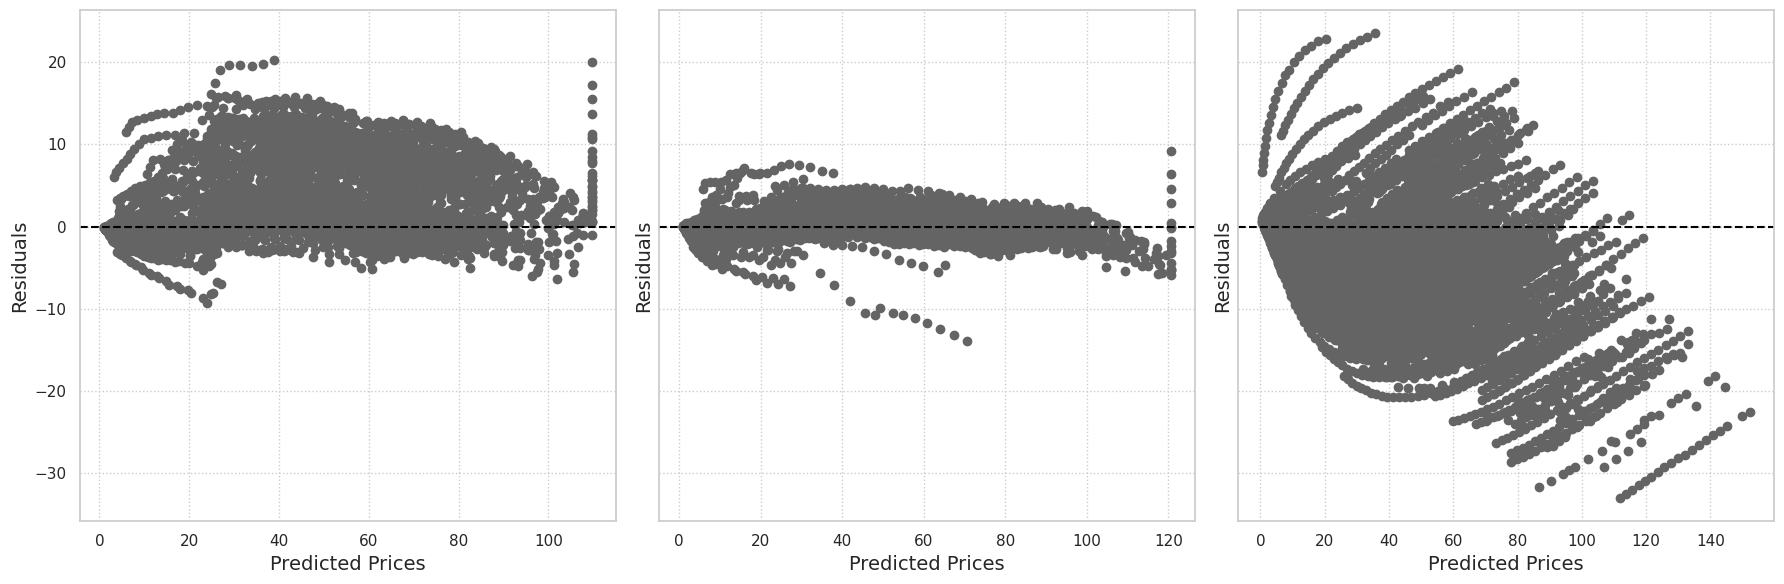

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals PER1
axes[0].scatter(df_model_test_oct_nov_residuals['PER1 PRED'], df_model_test_oct_nov_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals PER2
axes[1].scatter(df_model_test_oct_nov_residuals['PER2 PRED'], df_model_test_oct_nov_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals BSM
axes[2].scatter(df_model_test_oct_nov_residuals['BSM Prices'], df_model_test_oct_nov_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

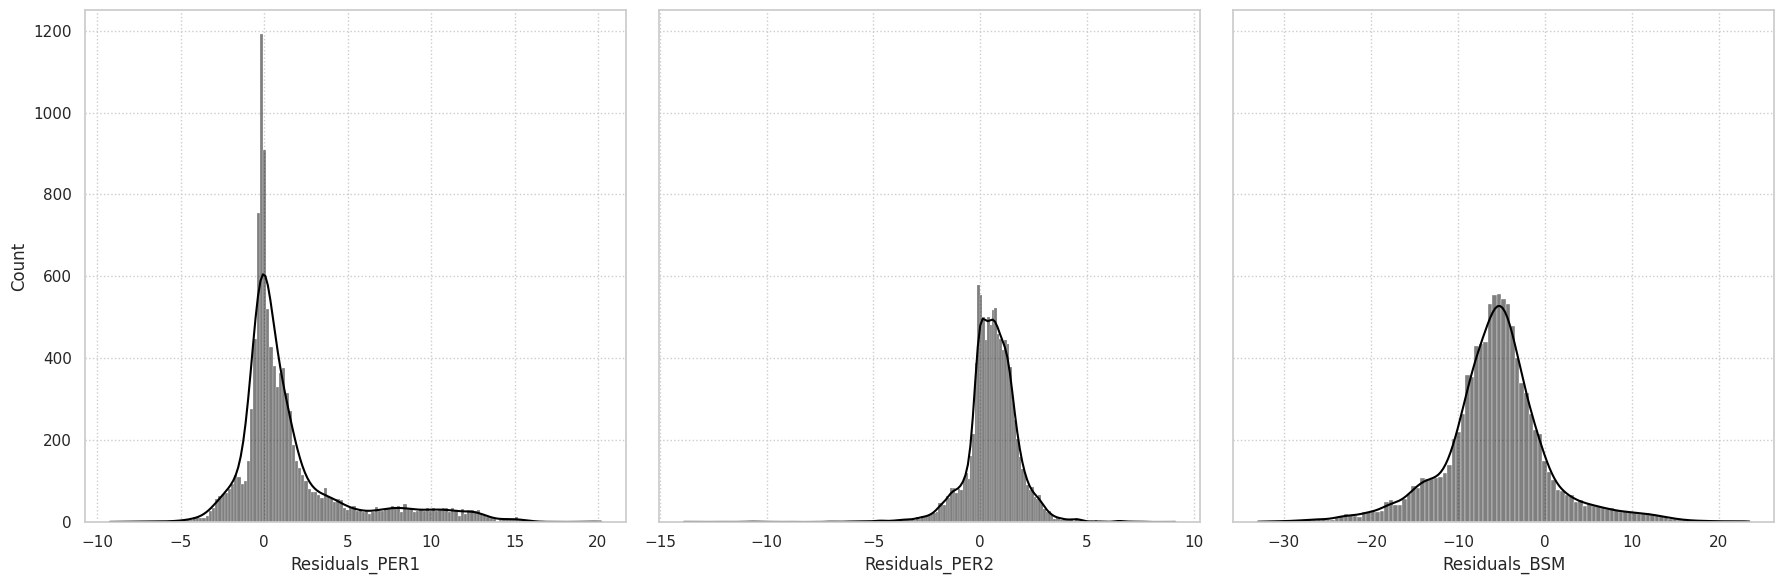

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation
std_dev_bsm = df_model_test_oct_nov_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_oct_nov_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_oct_nov_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))

BSM  : Standard Deviation of Residuals  6.14
PER1 : Standard Deviation of Residuals  3.53
PER2 : Standard Deviation of Residuals  1.25


In [ ]:
# mean
mean_bsm = df_model_test_oct_nov_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_oct_nov_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_oct_nov_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -5.66
PER1 : Mean of Residuals  1.55
PER2 : Mean of Residuals  0.58


### Analysis AE

####Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.06252963229025758, pvalue=1.2968687126453758e-10)
PER1 : Spearman  SignificanceResult(statistic=-0.4480763393570631, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.09513905774984341, pvalue=1.2165721175675552e-22)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.07748024359732103, pvalue=1.6057806352186165e-15)
PER1 : Spearman  SignificanceResult(statistic=-0.515043250713485, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.29879784017617517, pvalue=1.780963427597678e-216)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.28380915427103404, pvalue=1.3382590902256141e-194)
PER1 : Spearman  SignificanceResult(statistic=0.17801491438277622, pvalue=7.840313196995932e-76)
PER2 : Spearman  SignificanceResult(statistic=0.08382986063963674, pvalue=6.478054182580912e-18)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.28872393612888086, pvalue=1.2588504481863247e-201)
PER1 : Spearman  SignificanceResult(statistic=0.33314163696764787, pvalue=9.31755792991472e-272)
PER2 : Spearman  SignificanceResult(statistic=0.199440117826911, pvalue=4.357285236218999e-95)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.0015374511099204649, pvalue=0.874549054454567)
PER1 : Spearman  SignificanceResult(statistic=0.5264229123837585, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.025616780353073087, pvalue=0.008512105721625227)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.15317767787951678, pvalue=2.1433025049006087e-56)
PER1 : Spearman  SignificanceResult(statistic=0.5377285920184375, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.2103318310137996, pvalue=8.857956421997429e-106)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.005654144376857346, pvalue=0.5614858092448072)
PER1 : Spearman  SignificanceResult(statistic=-0.49030396147182576, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.052919649616712056, pvalue=5.382233431557578e-08)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.13717165804802847, pvalue=1.782438700317533e-45)
PER1 : Spearman  SignificanceResult(statistic=-0.5055528109354335, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.22299320610629714, pvalue=5.47460801259521e-119)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('S&P 500 Return vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_PER2'])

print('S&P 500 Return vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 Return vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.24858943578256534, pvalue=2.6068245633206495e-148)
PER1 : Spearman  SignificanceResult(statistic=-0.009866488275485379, pvalue=0.310951737646375)
PER2 : Spearman  SignificanceResult(statistic=-0.059572381204984974, pvalue=9.182826202852714e-10)
--
S&P 500 Return vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.16842585988423572, pvalue=5.7721781204898106e-68)
PER1 : Spearman  SignificanceResult(statistic=-0.0057972004917789255, pvalue=0.5516249315264821)
PER2 : Spearman  SignificanceResult(statistic=-0.055642740851612665, pvalue=1.0749707449734279e-08)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.2704105307154528, pvalue=3.700264926666232e-176)
PER1 : Spearman  SignificanceResult(statistic=-0.11588453304166264, pvalue=7.271588308092824e-33)
PER2 : Spearman  SignificanceResult(statistic=0.16134533513084923, pvalue=1.8901567037460061e-62)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.22196527754122775, pvalue=6.955454333292857e-118)
PER1 : Spearman  SignificanceResult(statistic=0.06255186916897167, pvalue=1.2774789281696532e-10)
PER2 : Spearman  SignificanceResult(statistic=0.304624325327629, pvalue=2.4238540780284162e-225)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.14301184241906822, pvalue=2.5750890390143342e-49)
PER1 : Spearman  SignificanceResult(statistic=0.5085681663100912, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.0020936900231128294, pvalue=0.8297642354504082)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.2488711076752785, pvalue=1.1846205719874141e-148)
PER1 : Spearman  SignificanceResult(statistic=0.524678347694254, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.18854926021643492, pvalue=5.23414475545874e-85)


## DOTM Oct-Nov

In [ ]:
# filter
moneyness_filtered_PER1= results_df_moneyness_PER1[results_df_moneyness_PER1['period']== 'Oct-Nov DOTM']
moneyness_filtered_PER2= results_df_moneyness_PER2[results_df_moneyness_PER2['period']== 'Oct-Nov DOTM']

In [ ]:
# drop index
df_model_test_oct_nov_dotm.reset_index(drop=True, inplace=True)
moneyness_filtered_PER1.reset_index(drop=True, inplace=True)
moneyness_filtered_PER2.reset_index(drop=True, inplace=True)

In [ ]:
moneyness_filtered_PER1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   period            4041 non-null   object 
 1   actual_prices     4041 non-null   float32
 2   predicted_prices  4041 non-null   float32
dtypes: float32(2), object(1)
memory usage: 63.3+ KB


In [ ]:
# add prediciton
df_model_test_oct_nov_dotm['PER1 PRED'] = moneyness_filtered_PER1['predicted_prices']
df_model_test_oct_nov_dotm['PER2 PRED'] = moneyness_filtered_PER2['predicted_prices']

In [ ]:
# rename column
df_model_test_oct_nov_dotm.drop(['delta', 'gamma','vega','theta','BSM','log_price','log_strike_price','log_spindx','log_BSM_Vola_ATM'], axis=1, inplace=True)
df_model_test_oct_nov_dotm.rename(columns={'price': 'Actual Prices', 'BSM_Vola_ATM':'BSM Prices','spindx':'S&P 500','sprtrn':'S&P 500 Return', 't30ret':'interest rate'}, inplace=True)

# dateto,e
df_model_test_oct_nov_dotm['date'] = pd.to_datetime(df_model_test_oct_nov_dotm['date'])

In [ ]:
# check if same result
total_rmse_PER1 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm['Actual Prices'], df_model_test_oct_nov_dotm['PER1 PRED']))
total_rmse_PER2 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm['Actual Prices'], df_model_test_oct_nov_dotm['PER2 PRED']))
total_rmse_BSM  = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm['Actual Prices'], df_model_test_oct_nov_dotm['BSM Prices']))
print(f'PER1: {total_rmse_PER1} \nPER2: {total_rmse_PER2} \nBSM: {total_rmse_BSM}')

PER1: 1.3425665159078033 
PER2: 0.3862821330905826 
BSM: 11.876841210408015


In [ ]:
df_model_test_oct_nov_dotm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4041 non-null   datetime64[ns]
 1   strike_price     4041 non-null   float64       
 2   best_bid         4041 non-null   float64       
 3   best_offer       4041 non-null   float64       
 4   impl_volatility  4041 non-null   float64       
 5   Actual Prices    4041 non-null   float64       
 6   maturity         4041 non-null   float64       
 7   vix              4041 non-null   float64       
 8   interest rate    4041 non-null   float64       
 9   S&P 500          4041 non-null   float64       
 10  S&P 500 Return   4041 non-null   float64       
 11  moneyness        4041 non-null   float64       
 12  Vola_ATM         4041 non-null   float64       
 13  BSM Prices       4041 non-null   float64       
 14  PER1 PRED        4041 non-null   float32

### Maturity

In [ ]:
# filter
df_model_test_oct_nov_dotm_30 = df_model_test_oct_nov_dotm[df_model_test_oct_nov_dotm['maturity']*365 >15]

In [ ]:
df_model_test_oct_nov_dotm_15 = df_model_test_oct_nov_dotm[(df_model_test_oct_nov_dotm['maturity']*365 <=15) & (df_model_test_oct_nov_dotm['maturity']*365 >5)]

In [ ]:
df_model_test_oct_nov_dotm_5 = df_model_test_oct_nov_dotm[df_model_test_oct_nov_dotm['maturity']*365 <=5]

In [ ]:
# check if same result
total_rmse_PER1_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_30['Actual Prices'], df_model_test_oct_nov_dotm_30['PER1 PRED']))
total_rmse_PER1_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_15['Actual Prices'], df_model_test_oct_nov_dotm_15['PER1 PRED']))
total_rmse_PER1_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_5['Actual Prices'], df_model_test_oct_nov_dotm_5['PER1 PRED']))

total_rmse_PER2_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_30['Actual Prices'], df_model_test_oct_nov_dotm_30['PER2 PRED']))
total_rmse_PER2_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_15['Actual Prices'], df_model_test_oct_nov_dotm_15['PER2 PRED']))
total_rmse_PER2_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_5['Actual Prices'], df_model_test_oct_nov_dotm_5['PER2 PRED']))

total_rmse_BSM_30 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_30['Actual Prices'], df_model_test_oct_nov_dotm_30['BSM Prices']))
total_rmse_BSM_15 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_15['Actual Prices'], df_model_test_oct_nov_dotm_15['BSM Prices']))
total_rmse_BSM_5 = np.sqrt(mean_squared_error(df_model_test_oct_nov_dotm_5['Actual Prices'], df_model_test_oct_nov_dotm_5['BSM Prices']))


print(f'30 Days PER1: {total_rmse_PER1_30.round(2)} PER2: {total_rmse_PER2_30.round(2)} BSM: {total_rmse_BSM_30.round(2)}')
print(f'15 Days PER1: {total_rmse_PER1_15.round(2)} PER2: {total_rmse_PER2_15.round(2)} BSM: {total_rmse_BSM_15.round(2)}')
print(f' 5 Days PER1: {total_rmse_PER1_5.round(2)}  PER2: {total_rmse_PER2_5.round(2)}  BSM: {total_rmse_BSM_5.round(2)}')

30 Days PER1: 1.31 PER2: 0.39 BSM: 12.91
15 Days PER1: 1.49 PER2: 0.35 BSM: 6.48
 5 Days PER1: 0.67  PER2: 0.32  BSM: 2.09


### Analysis Residuals

In [ ]:
import pandas as pd

df_model_test_oct_nov_residuals = df_model_test_oct_nov_dotm.copy()

# residuals
df_model_test_oct_nov_residuals['Residuals_BSM'] = df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['BSM Prices']
df_model_test_oct_nov_residuals['Residuals_PER1'] = df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['PER1 PRED']
df_model_test_oct_nov_residuals['Residuals_PER2'] = df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['PER2 PRED']

# AE
df_model_test_oct_nov_residuals['AE_BSM'] = np.abs(df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['BSM Prices'])
df_model_test_oct_nov_residuals['AE_PER1'] = np.abs(df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['PER1 PRED'])
df_model_test_oct_nov_residuals['AE_PER2'] = np.abs(df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['PER2 PRED'])

# APE
df_model_test_oct_nov_residuals['APE_BSM'] = np.abs((df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['BSM Prices']) / df_model_test_oct_nov_dotm['Actual Prices']) * 100
df_model_test_oct_nov_residuals['APE_PER1'] = np.abs((df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['PER1 PRED']) / df_model_test_oct_nov_dotm['Actual Prices']) * 100
df_model_test_oct_nov_residuals['APE_PER2'] = np.abs((df_model_test_oct_nov_dotm['Actual Prices'] - df_model_test_oct_nov_dotm['PER2 PRED']) / df_model_test_oct_nov_dotm['Actual Prices']) * 100

In [ ]:
df_model_test_oct_nov_residuals

date  strike_price  best_bid  best_offer  impl_volatility  \
0    2020-10-01        3600.0      3.70        4.00         0.210374   
1    2020-10-01        3605.0      3.50        3.70         0.210845   
2    2020-10-01        3610.0      3.30        3.50         0.211772   
3    2020-10-01        3615.0      3.10        3.30         0.212543   
4    2020-10-01        3620.0      2.90        3.10         0.213147   
...         ...           ...       ...         ...              ...   
4036 2020-11-30        3900.0      1.40        1.55         0.151270   
4037 2020-11-30        3925.0      1.05        1.20         0.155160   
4038 2020-11-30        3875.0      2.20        2.55         0.141757   
4039 2020-11-30        3900.0      1.65        1.95         0.145063   
4040 2020-11-30        3925.0      1.25        1.50         0.148444   

      Actual Prices  maturity    vix  interest rate  S&P 500  ...  PER2 PRED  \
0             3.850  0.041096  26.70       0.000076  3380.80  ...   4.678493   
1             3.600  0.041096  26.70       0.000076  3380.80  ...   4.397245   
2             3.400  0.041096  26.70       0.000076  3380.80  ...   4.170754   
3             3.200  0.041096  26.70       0.000076  3380.80  ...   3.954281   
4             3.000  0.041096  26.70       0.000076  3380.80  ...   3.731730   
...             ...       ...    ...            ...      ...  ...        ...   
4036          1.475  0.065753  20.57       0.000066  3621.63  ...   1.485085   
4037          1.125  0.065753  20.57       0.000066  3621.63  ...   1.161840   
4038          2.375  0.076712  20.57       0.000066  3621.63  ...   2.443152   
4039          1.800  0.076712  20.57       0.000066  3621.63  ...   1.837067   
4040          1.375  0.076712  20.57       0.000066  3621.63  ...   1.375785   

      Residuals_BSM  Residuals_PER1  Residuals_PER2    AE_BSM   AE_PER1  \
0         -2.775451       -0.059046       -0.828493  2.775451  0.059046   
1         -2.613197        0.049837       -0.797245  2.613197  0.049837   
2         -2.423153        0.082987       -0.770754  2.423153  0.082987   
3         -2.254370        0.107299       -0.754281  2.254370  0.107299   
4         -2.105924        0.119395       -0.731730  2.105924  0.119395   
...             ...             ...             ...       ...       ...   
4036      -1.365782        0.099602       -0.010085  1.365782  0.099602   
4037      -0.839659        0.068751       -0.036840  0.839659  0.068751   
4038      -3.326314        0.039892       -0.068152  3.326314  0.039892   
4039      -2.365783        0.078864       -0.037067  2.365783  0.078864   
4040      -1.630017        0.096567       -0.000785  1.630017  0.096567   

       AE_PER2     APE_BSM  APE_PER1   APE_PER2  
0     0.828493   72.089637  1.533673  21.519312  
1     0.797245   72.588802  1.384374  22.145706  
2     0.770754   71.269201  2.440800  22.669234  
3     0.754281   70.449065  3.353095  23.571277  
4     0.731730   70.197455  3.979842  24.390984  
...        ...         ...       ...        ...  
4036  0.010085   92.595360  6.752683   0.683738  
4037  0.036840   74.636339  6.111240   3.274642  
4038  0.068152  140.055330  1.679661   2.869556  
4039  0.037067  131.432404  4.381335   2.059305  
4040  0.000785  118.546660  7.023031   0.057082  

[4041 rows x 25 columns]

In [ ]:
# MAPE
MAPE_BSM  = df_model_test_oct_nov_residuals['APE_BSM'].mean()
MAPE_PER1 = df_model_test_oct_nov_residuals['APE_PER1'].mean()
MAPE_PER2 = df_model_test_oct_nov_residuals['APE_PER2'].mean()

print(MAPE_BSM)
print(MAPE_PER1)
print(MAPE_PER2)

229.71225236767933
15.155072362891142
5.8052507315353585


In [ ]:
# spearman correlation
df_model_test_oct_nov_residuals.drop(['date', 'best_bid', 'best_offer'], axis=1).corr(method='spearman')

strike_price  impl_volatility  Actual Prices  maturity  \
strike_price         1.000000        -0.759250      -0.581368  0.391831   
impl_volatility     -0.759250         1.000000       0.281582 -0.444429   
Actual Prices       -0.581368         0.281582       1.000000  0.229153   
maturity             0.391831        -0.444429       0.229153  1.000000   
vix                 -0.772790         0.909421       0.351594 -0.265382   
interest rate       -0.185740         0.076010       0.107707  0.056590   
S&P 500              0.820959        -0.874370      -0.311111  0.246016   
S&P 500 Return       0.186353        -0.142252      -0.113857 -0.022799   
moneyness           -0.249081        -0.198013       0.433286 -0.251598   
Vola_ATM            -0.742880         0.878219       0.343368 -0.253104   
BSM Prices          -0.599956         0.406847       0.803404  0.249778   
PER1 PRED           -0.428660         0.075355       0.962874  0.346065   
PER2 PRED           -0.576563         0.269282       0.995034  0.234552   
Residuals_BSM        0.546991        -0.402698      -0.650025 -0.233081   
Residuals_PER1      -0.758571         0.749591       0.624943 -0.149206   
Residuals_PER2       0.077257         0.058989      -0.185152 -0.135679   
AE_BSM              -0.551970         0.409200       0.650859  0.228659   
AE_PER1             -0.746313         0.725059       0.665187 -0.110543   
AE_PER2             -0.411719         0.362666       0.417454 -0.030032   
APE_BSM             -0.124681         0.193186      -0.109858  0.059993   
APE_PER1            -0.622632         0.774693       0.285708 -0.319742   
APE_PER2            -0.049861         0.200082      -0.221410 -0.201875   

                      vix  interest rate   S&P 500  S&P 500 Return  moneyness  \
strike_price    -0.772790      -0.185740  0.820959        0.186353  -0.249081   
impl_volatility  0.909421       0.076010 -0.874370       -0.142252  -0.198013   
Actual Prices    0.351594       0.107707 -0.311111       -0.113857   0.433286   
maturity        -0.265382       0.056590  0.246016       -0.022799  -0.251598   
vix              1.000000       0.110434 -0.924911       -0.233871  -0.254145   
interest rate    0.110434       1.000000 -0.130833       -0.275905  -0.044979   
S&P 500         -0.924911      -0.130833  1.000000        0.253597   0.274783   
S&P 500 Return  -0.233871      -0.275905  0.253597        1.000000   0.041916   
moneyness       -0.254145      -0.044979  0.274783        0.041916   1.000000   
Vola_ATM         0.952031       0.119698 -0.884497       -0.356579  -0.245267   
BSM Prices       0.614368       0.165496 -0.528212       -0.336586   0.110310   
PER1 PRED        0.166296       0.140216 -0.129000       -0.133935   0.493076   
PER2 PRED        0.343558       0.115805 -0.305334       -0.120493   0.429724   
Residuals_BSM   -0.641119      -0.155380  0.548217        0.394533   0.019502   
Residuals_PER1   0.753344       0.044888 -0.740803       -0.065446  -0.032820   
Residuals_PER2   0.018155      -0.053156 -0.027914        0.044784  -0.129848   
AE_BSM           0.645355       0.152280 -0.551555       -0.391578  -0.017068   
AE_PER1          0.725412       0.011602 -0.710709       -0.064515   0.007074   
AE_PER2          0.340565       0.062251 -0.294050       -0.091777   0.195810   
APE_BSM          0.442324       0.098875 -0.354147       -0.357270  -0.438572   
APE_PER1         0.732904      -0.088623 -0.735102        0.013549  -0.245942   
APE_PER2         0.132436       0.000507 -0.105734       -0.010653  -0.093476   

                 Vola_ATM  ...  PER2 PRED  Residuals_BSM  Residuals_PER1  \
strike_price    -0.742880  ...  -0.576563       0.546991       -0.758571   
impl_volatility  0.878219  ...   0.269282      -0.402698        0.749591   
Actual Prices    0.343368  ...   0.995034      -0.650025        0.624943   
maturity        -0.253104  ...   0.234552      -0.233081       -0.149206   
vix              0.952031  ...   0.343558      

In [ ]:
plot_text_size = 14

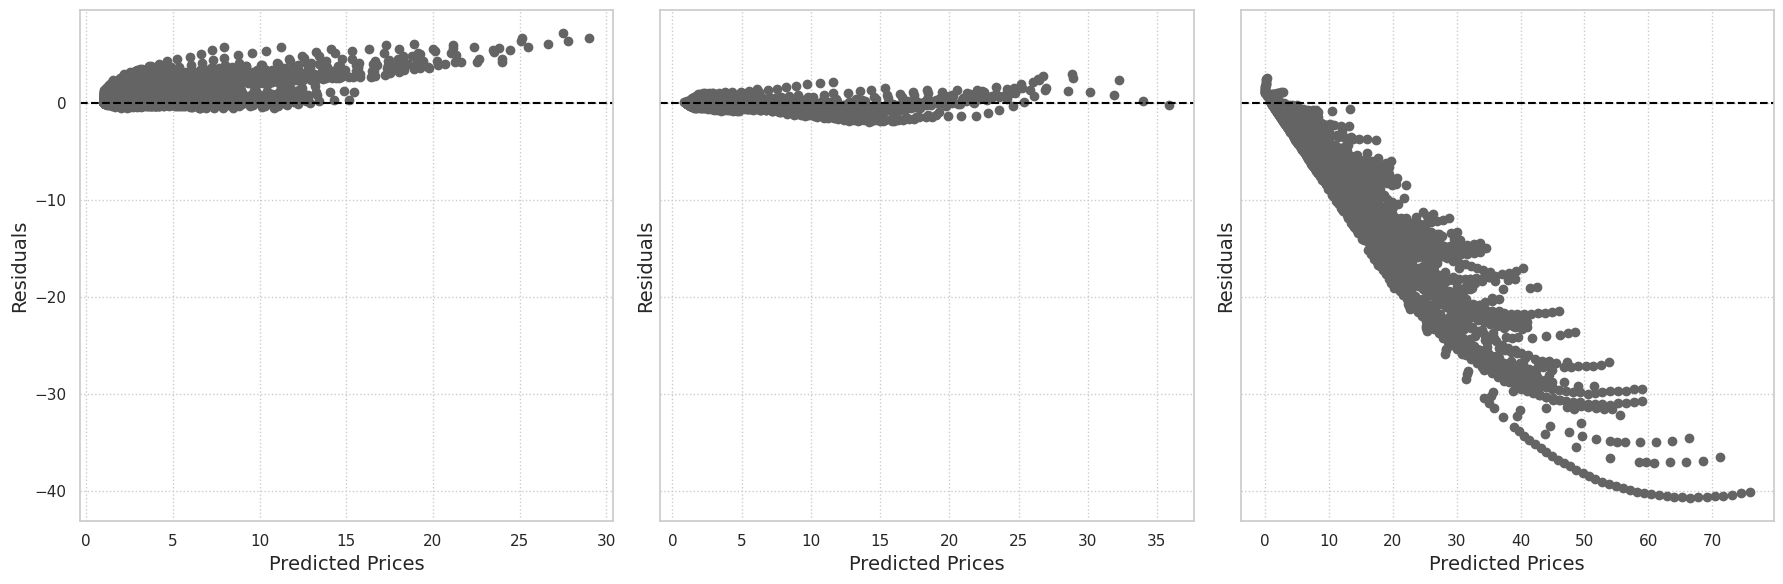

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# plot residuals PER1
axes[0].scatter(df_model_test_oct_nov_residuals['PER1 PRED'], df_model_test_oct_nov_residuals['Residuals_PER1'], color='#646464')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[0].set_ylabel('Residuals', fontsize=plot_text_size)
axes[0].grid(True, linestyle='dotted')

# plot residuals PER2
axes[1].scatter(df_model_test_oct_nov_residuals['PER2 PRED'], df_model_test_oct_nov_residuals['Residuals_PER2'], color='#646464')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[1].set_ylabel('Residuals', fontsize=plot_text_size)
axes[1].grid(True, linestyle='dotted')

# plot residuals BSM
axes[2].scatter(df_model_test_oct_nov_residuals['BSM Prices'], df_model_test_oct_nov_residuals['Residuals_BSM'], color='#646464')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_xlabel('Predicted Prices', fontsize=plot_text_size)
axes[2].set_ylabel('Residuals', fontsize=plot_text_size)
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

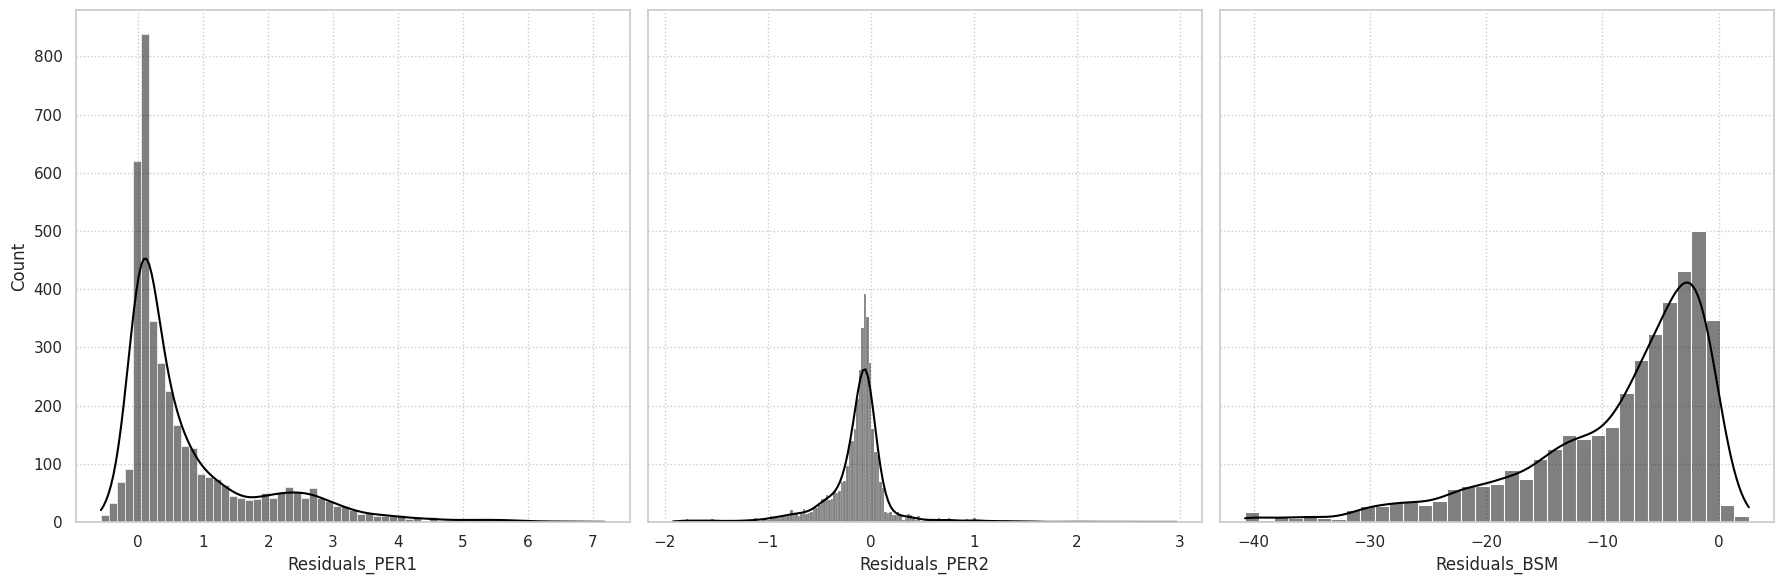

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# histogram PER1 residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_PER1'], kde=True, color='black', ax=axes[0])
axes[0].grid(True, linestyle='dotted')

# histogram PER2 residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_PER2'], kde=True, color='black', ax=axes[1])
axes[1].grid(True, linestyle='dotted')

# histogram BSM residuals
sns.histplot(df_model_test_oct_nov_residuals['Residuals_BSM'], kde=True, color='black', ax=axes[2])
axes[2].grid(True, linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
# standard deviation
std_dev_bsm = df_model_test_oct_nov_residuals['Residuals_BSM'].std()
std_dev_per1 = df_model_test_oct_nov_residuals['Residuals_PER1'].std()
std_dev_per2 = df_model_test_oct_nov_residuals['Residuals_PER2'].std()

print("BSM  : Standard Deviation of Residuals ", std_dev_bsm.round(2))
print("PER1 : Standard Deviation of Residuals ", std_dev_per1.round(2))
print("PER2 : Standard Deviation of Residuals ", std_dev_per2.round(2))

BSM  : Standard Deviation of Residuals  8.06
PER1 : Standard Deviation of Residuals  1.1
PER2 : Standard Deviation of Residuals  0.36


In [ ]:
# mean
mean_bsm = df_model_test_oct_nov_residuals['Residuals_BSM'].mean()
mean_per1 = df_model_test_oct_nov_residuals['Residuals_PER1'].mean()
mean_per2 = df_model_test_oct_nov_residuals['Residuals_PER2'].mean()

print("BSM  : Mean of Residuals ", mean_bsm.round(2))
print("PER1 : Mean of Residuals ", mean_per1.round(2))
print("PER2 : Mean of Residuals ", mean_per2.round(2))

BSM  : Mean of Residuals  -8.73
PER1 : Mean of Residuals  0.77
PER2 : Mean of Residuals  -0.13


### Analysis AE

####Strike Price

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Strike Price vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['strike_price'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Strike Price vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Strike Price vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.5469909887837752, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=-0.7585712280066444, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.07725667977758123, pvalue=8.790321633764993e-07)
--
Strike Price vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.5519704566469965, pvalue=4.565e-321)
PER1 : Spearman  SignificanceResult(statistic=-0.7463128972830272, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.4117185116195056, pvalue=3.7777597403123536e-165)


#### Maturity

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Maturity vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['maturity'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Maturity vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Maturity vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.23308105891868827, pvalue=5.477101412131625e-51)
PER1 : Spearman  SignificanceResult(statistic=-0.1492056434496655, pvalue=1.4942719174305142e-21)
PER2 : Spearman  SignificanceResult(statistic=-0.13567864452604825, pvalue=4.621323064408217e-18)
--
Maturity vs AE
BSM  : Spearman  SignificanceResult(statistic=0.22865907672907662, pvalue=4.349216063032071e-49)
PER1 : Spearman  SignificanceResult(statistic=-0.11054285184984193, pvalue=1.8345646966020007e-12)
PER2 : Spearman  SignificanceResult(statistic=-0.030032372850924735, pvalue=0.05626678120424005)


#### VIX

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('VIX vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['vix'], df_model_test_oct_nov_residuals['AE_PER2'])

print('VIX vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)


VIX vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.6411193245658753, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.7533437121551956, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.01815481700341512, pvalue=0.2485743545995329)
--
VIX vs AE
BSM  : Spearman  SignificanceResult(statistic=0.645355003213566, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.7254121685283793, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.34056488927474365, pvalue=2.764038928724655e-110)


#### S&P 500

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('S&P 500 vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500'], df_model_test_oct_nov_residuals['AE_PER2'])

print('S&P 500 vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.5482172568554153, pvalue=7.16981227e-316)
PER1 : Spearman  SignificanceResult(statistic=-0.7408025968058616, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.02791423816316861, pvalue=0.07601799666437466)
--
S&P 500 vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.5515553055402405, pvalue=1.7273e-320)
PER1 : Spearman  SignificanceResult(statistic=-0.7107087103358435, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.29404954642295245, pvalue=2.058829996024508e-81)


In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('S&P 500 Return vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['S&P 500 Return'], df_model_test_oct_nov_residuals['AE_PER2'])

print('S&P 500 Return vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

S&P 500 Return vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.39453331982357326, pvalue=1.2809200812522335e-150)
PER1 : Spearman  SignificanceResult(statistic=-0.06544644918488661, pvalue=3.133605644143419e-05)
PER2 : Spearman  SignificanceResult(statistic=0.044783522695131056, pvalue=0.004407997823624595)
--
S&P 500 Return vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.39157847064229234, pvalue=3.3136328417000906e-148)
PER1 : Spearman  SignificanceResult(statistic=-0.06451522125707479, pvalue=4.057757076877859e-05)
PER2 : Spearman  SignificanceResult(statistic=-0.0917773903925974, pvalue=5.074288353911076e-09)


#### Moneyness

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Moneyness vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['moneyness'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Moneyness vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Moneyness vs Residuals
BSM  : Spearman  SignificanceResult(statistic=0.01950184430115273, pvalue=0.21518098754628984)
PER1 : Spearman  SignificanceResult(statistic=-0.03281994361865746, pvalue=0.03695662207683048)
PER2 : Spearman  SignificanceResult(statistic=-0.12984837276393246, pvalue=1.1627361004348604e-16)
--
Moneyness vs AE
BSM  : Spearman  SignificanceResult(statistic=-0.017068126063297835, pvalue=0.27803476127199644)
PER1 : Spearman  SignificanceResult(statistic=0.007074220353975842, pvalue=0.6530229578132469)
PER2 : Spearman  SignificanceResult(statistic=0.19580961376103478, pvalue=3.2736359941005314e-36)


#### Vola

In [ ]:
from scipy.stats import spearmanr

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['Residuals_PER2'])

print('Vola ATM vs Residuals')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)
print('--')

# spearman correlation
spearman_bsm = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_BSM'])
spearman_per1 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_PER1'])
spearman_per2 = spearmanr(df_model_test_oct_nov_residuals['Vola_ATM'], df_model_test_oct_nov_residuals['AE_PER2'])

print('Vola ATM vs AE')
print('BSM  : Spearman ', spearman_bsm)
print('PER1 : Spearman ', spearman_per1)
print('PER2 : Spearman ', spearman_per2)

Vola ATM vs Residuals
BSM  : Spearman  SignificanceResult(statistic=-0.7291495234976274, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.7021205424383506, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=-0.04257267261590883, pvalue=0.006795847720000459)
--
Vola ATM vs AE
BSM  : Spearman  SignificanceResult(statistic=0.7331247581743323, pvalue=0.0)
PER1 : Spearman  SignificanceResult(statistic=0.6754061532747179, pvalue=0.0)
PER2 : Spearman  SignificanceResult(statistic=0.36686154387459435, pvalue=5.699991377013539e-129)
